In [1]:
import os
import re

import pathlib
from pathlib import Path

import sqlite3

import pandas as pd
import numpy as np

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from IPython.display import display

In [2]:
# Helper (support)
from support import input_helper

In [3]:
# Define size of figure:
mpl.rcParams['figure.figsize'] = (16, 10)

In [4]:
# Directory with datasets:
ROOT_DIR = "RawData"

# Define path to save figures:
path_img = os.path.abspath(os.path.join('outputs', 'IMG'))
if not os.path.exists(path_img):
    os.makedirs(path_img)
print(f'Images will be saved in {path_img}')

Images will be saved in C:\Users\souvi\Documents\These\80_Calculations\02_MFA_IGU\outputs\IMG


In [5]:
# Define seaborn main parameters:
sns.set_style("ticks")
sns.color_palette("colorblind")
sns.set_context("paper", font_scale=1.5,
                rc={"axes.titlesize": 15, "lines.linewidth": 1.2,
                    "legend.fontsize": 10, "legend.title_fontsize": 10})

In [6]:
pd.set_option('precision', 2)

In [7]:
# A custom formatter function which divide by 1000 an axis:
import matplotlib.ticker as tkr

def yfmt1000(x, pos):
    s = f'{x/1000:,.0f}'
    return s

# W/ classes for tick-locating and -formatting:

# A formatter function:
y_1000 = tkr.FuncFormatter(yfmt1000)

# To divide the y-axis by 1000 when needed:
# ax.yaxis.set_major_formatter(y_1000)

In [8]:
# A function used to define the thickness of x and y axis:
def style_ax(ax):
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(0.5)
        ax.tick_params(width=0.5)
        ax.set_xlabel(None)
    return ax

In [9]:
# A keyword to export figures, or not:
export = False

# Load Datasets

In [10]:
# Belgian dataset:
be_data = input_helper.get_data('BE_RawData_VPython.xlsx', directory=ROOT_DIR)

# French dataset:
fr_data = input_helper.get_data('FR_RawData_VPython.xlsx', directory=ROOT_DIR)

# European dataset:
eu_data = input_helper.get_data('EU_RawData_VPython.xlsx', directory=ROOT_DIR)

In [11]:
# Sheets contained by datasets:
print("BE_data, sheet names = \n {}\n".format(be_data.sheet_names))
print("FR_data, sheet names = \n {}\n".format(fr_data.sheet_names))
print("EU_data, sheet names = \n {}\n".format(eu_data.sheet_names))

BE_data, sheet names = 
 ['References', 'prod', 'import', 'export', 'Energy_Intensity', 'Population']

FR_data, sheet names = 
 ['References', 'prod', 'import', 'export', 'Population', 'MatEnergy_WindowGlass', 'MatEnergy_PlateGlass', 'RawMat_Intensity', 'Energy_Intensity', 'emissions']

EU_data, sheet names = 
 ['References', 'prod', 'import', 'export', 'emissions', 'Energy_Intensity']



# Flat Glass Production in Europe

## Creating a Dataframe for Flat Glass Flows

In [12]:
# Create dataframe for flat glass production:
df_eu_prod = eu_data.parse('prod').set_index(['Nbr of countries', 'year'])

In [13]:
# Add import and export flows:
df_eu_imp = eu_data.parse('import').set_index(['Nbr of countries', 'year'])
df_eu_exp = eu_data.parse('export').set_index(['Nbr of countries', 'year'])

In [14]:
# Create a single dataframe for flat glass flows in Europe:
df_eu = pd.concat([df_eu_prod['flat glass, kt'],
                   df_eu_imp['flat glass, kt'],
                   df_eu_exp['flat glass, kt']],
                  axis=1, keys=[('Production [kt]'),
                                ('Import [kt]'),
                                ('Export [kt]')],
                  names=['Flow']).stack(dropna=False)

df_eu = df_eu.unstack()

In [15]:
# Overview of the EU dataframe:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10):
    display(df_eu)

Flow                   Production [kt]  Import [kt]  Export [kt]
Nbr of countries year                                           
6                1945              NaN          NaN          NaN
                 1946              NaN          NaN          NaN
                 1947              NaN          NaN          NaN
                 1948              NaN          NaN          NaN
                 1949              NaN          NaN          NaN
                 1950              NaN          NaN          NaN
                 1951              NaN          NaN          NaN
                 1952              NaN          NaN          NaN
                 1953              NaN          NaN          NaN
                 1954              NaN          NaN          NaN
                 1955              NaN          NaN          NaN
                 1956              NaN          NaN          NaN
                 1957              NaN          NaN          NaN
                 1958              NaN          NaN          NaN
                 1959              NaN          NaN          NaN
                 1960              NaN          NaN          NaN
                 1961              NaN          NaN          NaN
                 1962              NaN          NaN          NaN
                 1963              NaN          NaN          NaN
                 1964              NaN          NaN          NaN
                 1965              NaN          NaN          NaN
                 1966              NaN          NaN          NaN
                 1967              NaN          NaN          NaN
                 1968              NaN          NaN          NaN
                 1969              NaN          NaN          NaN
                 1970              NaN          NaN          NaN
                 1971              NaN          NaN          NaN
9                1972              NaN          NaN          NaN
                 1973              NaN          NaN          NaN
                 1974              NaN          NaN          NaN
                 1975              NaN          NaN          NaN
                 1976              NaN          NaN          NaN
                 1977              NaN          NaN          NaN
                 1978              NaN          NaN          NaN
                 1979              NaN          NaN          NaN
10               1980          4090.00          NaN          NaN
                 1981          4160.00          NaN          NaN
                 1982          4176.00          NaN          NaN
                 1983          4365.00          NaN          NaN
                 1984          4638.00          NaN          NaN
                 1985          4665.00          NaN          NaN
12               1986          4683.00          NaN          NaN
                 1987          4804.00          NaN          NaN
                 1988          5236.00          NaN          NaN
                 1989          5254.00          NaN          NaN
                 1990          5648.00          NaN          NaN
                 1991          5357.00          NaN          NaN
                 1992          5695.00          NaN          NaN
                 1993          5797.00          NaN          NaN
                 1994          6207.00          NaN          NaN
                 1995          6168.00          NaN          NaN
15               1995          6458.00          NaN          NaN
                 1996          6390.00          NaN          NaN
                 1997          6893.00          NaN          NaN
                 1998          7035.00          NaN          NaN
                 1999          7464.00          NaN          NaN
                 2000          7640.00          NaN          NaN
                 2001          7554.00          NaN          NaN
                 2002          7929.00          NaN          NaN
                 2003          7782

### First index where we have data

In [16]:
df_first_valid_index = df_eu.apply(lambda col: col.first_valid_index()).T
df_first_valid_index.columns = df_eu.index.names
df_first_valid_index

,Nbr of countries,year
Flow,,
Production [kt],10,1980
Import [kt],27,2003
Export [kt],27,2003


## Flat Glass Production

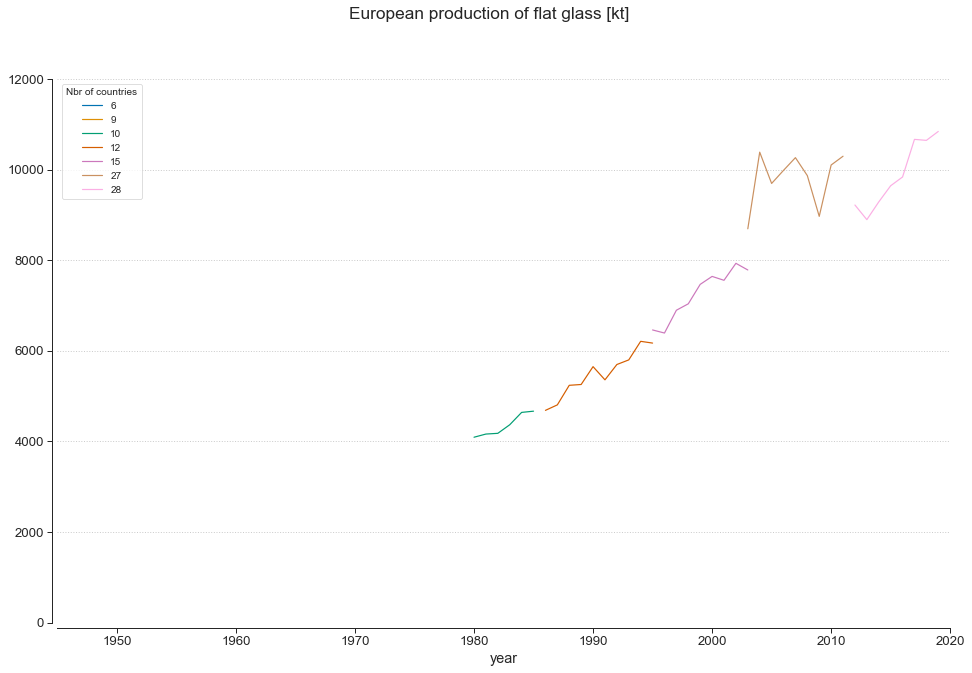

In [17]:
# Plot the European production of flat glass:
fig, ax = plt.subplots()

sns.lineplot(data=df_eu.reset_index(),
             x='year', y='Production [kt]',
             hue='Nbr of countries',
             palette='colorblind',
             ax=ax)

ax.yaxis.label.set_visible(False)
ax.set_xlim(1945, 2020)
ax.set_ylim(0, 12000)

ax.grid(which='major', axis='y', linestyle=':', linewidth=1)

fig.suptitle('European production of flat glass [kt]')
sns.despine(offset=5)
plt.show()

## Flat Glass Consumption

In [18]:
# Estimate the consumption of flat glass in EU:
df_eu['Consumption [kt]'] = (df_eu['Production [kt]']
                             + df_eu['Import [kt]']
                             - df_eu['Export [kt]'])

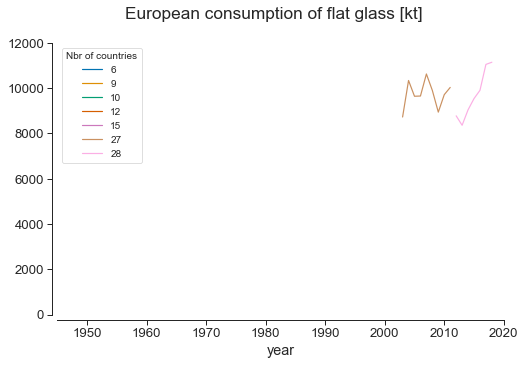

In [19]:
# Plot the European consumption of flat glass:
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(data=df_eu.reset_index(),
             x='year', y='Consumption [kt]',
             hue='Nbr of countries',
             palette='colorblind',
             ax=ax)

ax.yaxis.label.set_visible(False)
ax.set_xlim(1945, 2020)
ax.set_ylim(0, 12000)

fig.suptitle('European consumption of flat glass [kt]')
sns.despine(offset=5)
plt.show()

## Architectural Flat Glass Production

In [20]:
# Share of architectural glass in the European production of flat glass:
df_eu_bldgshare = df_eu_prod[[
    'bldg glass/flat glass, %']].dropna(inplace=False)

In [21]:
df_eu_bldgshare

bldg glass/flat glass, %
Nbr of countries year                          
9                1978                      0.57
15               1996                      0.52
28               2012                      0.80
                 2014                      0.82
                 2018                      0.80
                 2019                      0.80

In [22]:
print(f'There {df_eu_bldgshare.shape[0]} datapoints')

There 6 datapoints


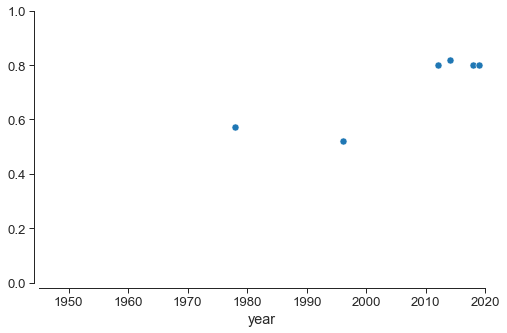

In [23]:
# Plot share of architectural glass/total flat glass:
fig, ax = plt.subplots(figsize=(8, 5))

sns.scatterplot(data=df_eu_bldgshare.reset_index(),
                x='year', y='bldg glass/flat glass, %',
                markers="o", s=50, ax=ax)

ax.yaxis.label.set_visible(False)
ax.set_xlim(1945, 2020)
ax.set_ylim(0, 1)

sns.despine(offset=5)

In [24]:
# Linear interpolation according to available data:
df_eu['bldg glass/flat glass, %'] = (df_eu_prod['bldg glass/flat glass, %']
                                     .interpolate(method="linear",
                                                  limit_area='inside'))

In [25]:
# Calculation of the European production of architectural flat glass:
df_eu['Architectural glass production [kt]'] = (df_eu['Production [kt]']
                                                * df_eu['bldg glass/flat glass, %'])

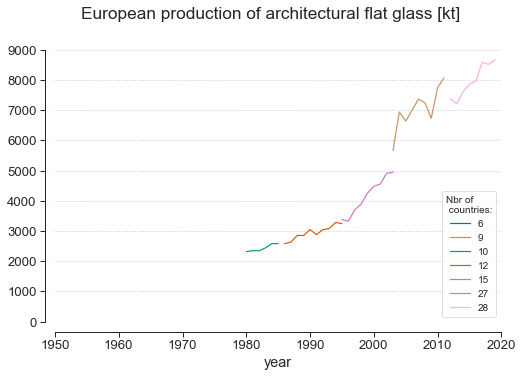

In [26]:
# Plot the European production of architectural flat glass:
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(data=df_eu.reset_index(),
             x='year', y='Architectural glass production [kt]',
             hue='Nbr of countries',
             palette='colorblind',
             ax=ax)

# Add legend:
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='lower right', ncol=1,
          title='Nbr of \n countries:', bbox_to_anchor=(1, 0))

ax.set_xlim(1950, 2020)
ax.set_ylim(0, 9000)
ax.yaxis.label.set_visible(False)
ax.grid(which='major', axis='y', linestyle=':', linewidth=1)

fig.suptitle('European production of architectural flat glass [kt]', y=1)
sns.despine(offset=10)
plt.show()

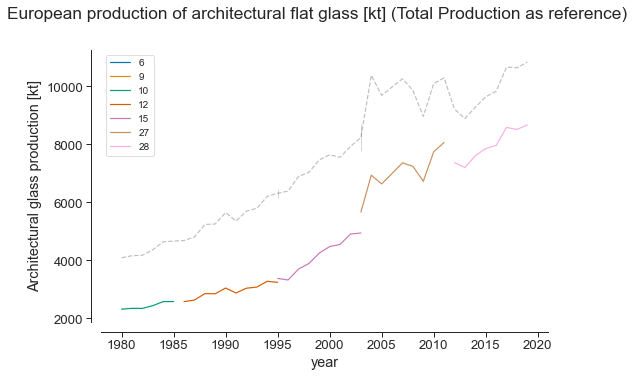

In [27]:
# Plot the European production of architectural flat glass:
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(data=df_eu.reset_index(),
             x='year', y='Architectural glass production [kt]',
             hue='Nbr of countries',
             palette='colorblind',
             ax=ax)

sns.lineplot(data=df_eu.reset_index(),
             x='year', y='Production [kt]',
             color='black', linestyle='--', alpha=0.25,
             ax=ax)

fig.suptitle(
    'European production of architectural flat glass [kt] (Total Production as reference)', y=1)
sns.despine(offset=10)
plt.show()

## Summary

In [28]:
# Assess the annual growth:
df_eu['Growth, flat glass [%]'] = df_eu['Production [kt]'].pct_change()
df_eu['Growth, arch glass [%]'] = (df_eu['Architectural glass production [kt]']
                                   .pct_change())

In [29]:
df_eu.loc[(slice(None), slice(1980, 1995)), :]

Flow                   Production [kt]  Import [kt]  Export [kt]  \
Nbr of countries year                                              
10               1980           4090.0          NaN          NaN   
                 1981           4160.0          NaN          NaN   
                 1982           4176.0          NaN          NaN   
                 1983           4365.0          NaN          NaN   
                 1984           4638.0          NaN          NaN   
                 1985           4665.0          NaN          NaN   
12               1986           4683.0          NaN          NaN   
                 1987           4804.0          NaN          NaN   
                 1988           5236.0          NaN          NaN   
                 1989           5254.0          NaN          NaN   
                 1990           5648.0          NaN          NaN   
                 1991           5357.0          NaN          NaN   
                 1992           5695.0          NaN          NaN   
                 1993           5797.0          NaN          NaN   
                 1994           6207.0          NaN          NaN   
                 1995           6168.0          NaN          NaN   
15               1995           6458.0          NaN          NaN   

Flow                   Consumption [kt]  bldg glass/flat glass, %  \
Nbr of countries year                                               
10               1980               NaN                      0.57   
                 1981               NaN                      0.56   
                 1982               NaN                      0.56   
                 1983               NaN                      0.56   
                 1984               NaN                      0.56   
                 1985               NaN                      0.55   
12               1986               NaN                      0.55   
                 1987               NaN                      0.55   
                 1988               NaN                      0.54   
                 1989               NaN                      0.54   
                 1990               NaN                      0.54   
                 1991               NaN                      0.54   
                 1992               NaN                      0.53   
                 1993               NaN                      0.53   
                 1994               NaN                      0.53   
                 1995               NaN                      0.53   
15               1995               NaN                      0.52   

Flow                   Architectural glass production [kt]  \
Nbr of countries year                                        
10               1980                              2317.09   
                 1981                              2345.36   
                 1982                              2342.96   
                 1983                              2437.05   
                 1984                              2576.78   
                 1985                              2579.01   
12               1986                              2576.14   
                 1987                              2629.56   
                 1988                              2851.69   
                 1989                              2847.11   
                 1990                              3045.16   
                 1991                              2873.61   
                 1992                              3039.33   
                 1993                              3077.90   
                 1994                              3278.60   
                 1995                              3241.12   
15               1995                              3375.83   

Flow                   Growth, flat glass [%]  Growth, arch glass [%]  
Nbr of countries year                                                  
10               1980                     NaN                     NaN  


In [30]:
n_countries = df_eu.index.get_level_values(0).unique()

for i, start_n_countries in enumerate(n_countries[:-1]):
    if start_n_countries < 10:
        continue
    end_n_countries = n_countries[i+1]
    start_year = df_eu.loc[start_n_countries].index.max()
    end_year = df_eu.loc[end_n_countries].index.max()
    a = df_eu.loc[start_n_countries:end_n_countries,
                  'Growth, flat glass [%]'].mean()*100
    b = df_eu.loc[start_n_countries:end_n_countries,
                  'Growth, arch glass [%]'].mean()*100

    print(
        f'Years {start_year}-{end_year} ({start_n_countries} to {end_n_countries} countries)')
    print(f'Flat glass production growth in EU: {a:.2f}%\n',
          f'Architectural glass production growth in EU: {b:.2f}%')
    print('')

Years 1985-1995 (10 to 12 countries)
Flat glass production growth in EU: 2.84%
 Architectural glass production growth in EU: 2.33%

Years 1995-2003 (12 to 15 countries)
Flat glass production growth in EU: 2.80%
 Architectural glass production growth in EU: 3.57%

Years 2003-2011 (15 to 27 countries)
Flat glass production growth in EU: 3.10%
 Architectural glass production growth in EU: 5.43%

Years 2011-2019 (27 to 28 countries)
Flat glass production growth in EU: 2.25%
 Architectural glass production growth in EU: 3.65%



In [31]:
n_countries

Int64Index([6, 9, 10, 12, 15, 27, 28], dtype='int64', name='Nbr of countries')

In [32]:
# Key dates for the changes in the MFA scope, i.e. EU enlargement:
EU_KDATES = {'EU10': 1981, 'EU12': 1986, 'EU15': 1995,
             'EU27': 2003, 'EU28': 2012}

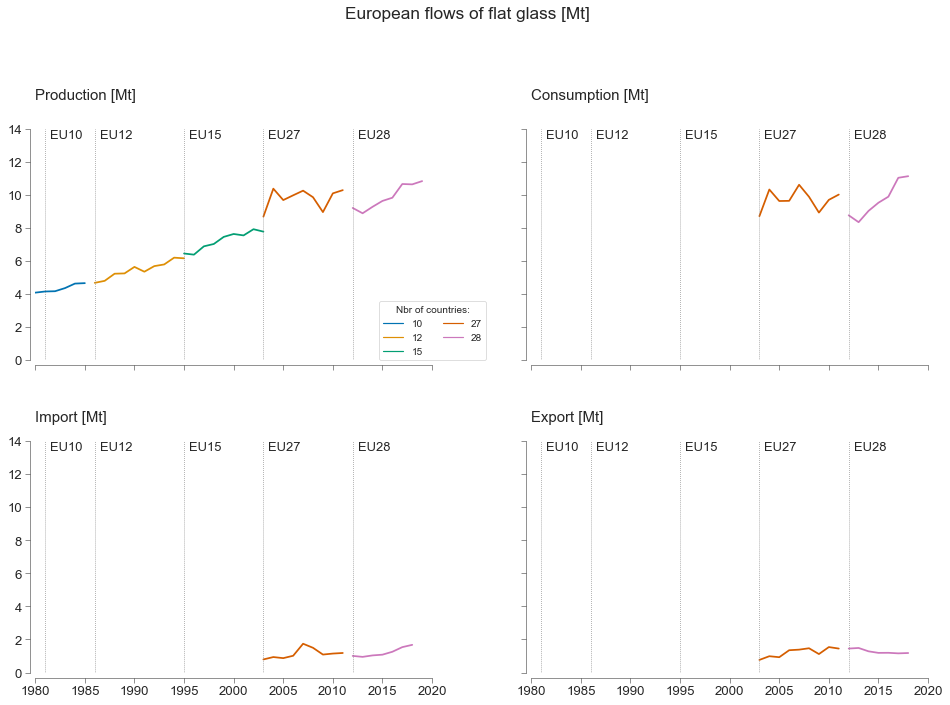

In [33]:
# Plot a synthesis of the results concerning European flat glass flows:
data1 = ['Production', 'Consumption']
data2 = ['Import', 'Export']

fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True,
                         figsize=(16, 10))

# Plot production and consumption:
for col, data in enumerate(data1):
    ax = axes[0][col]
    sns.lineplot(data=df_eu.loc[10:28].reset_index(),
                 x='year', y=f"{data} [kt]",
                 hue='Nbr of countries',
                 palette='colorblind', linewidth=1.75,
                 ax=ax)

    # Plot lines highlighting changes in the scope, i.e., EU enlargement:
    for y, x in EU_KDATES.items():
        ax.axvline(x=x, c='grey', linestyle=':', linewidth=0.75)
        ax.text(x+0.5, 14000, f"{y}", fontsize=13,
                verticalalignment='top')

    style_ax(ax)

    # Divide by 1000 the y-axis, results in Mt:
    ax.yaxis.set_major_formatter(y_1000)

    ax.set_title(f"{data} [Mt]", pad=30, loc='left')
    #ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
    ax.get_legend().remove()
    ax.yaxis.label.set_visible(False)

# Plot import and export below:
for col, data in enumerate(data2):
    ax = axes[1][col]
    sns.lineplot(data=df_eu.loc[10:28].reset_index(),
                 x='year', y=f"{data} [kt]",
                 hue='Nbr of countries',
                 palette='colorblind', linewidth=1.75,
                 ax=ax)

    # Plot lines highlighting changes in the scope, i.e., EU enlargement:
    for y, x in EU_KDATES.items():
        ax.axvline(x=x, c='grey', linestyle=':', linewidth=0.75)
        ax.text(x+0.5, 14000, f"{y}", fontsize=13,
                verticalalignment='top')

    style_ax(ax)

    # Divide by 1000 the y-axis, results in Mt:
    ax.yaxis.set_major_formatter(y_1000)

    ax.set_title(f"{data} [Mt]", pad=20, loc='left')
    #ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
    ax.get_legend().remove()
    ax.yaxis.label.set_visible(False)


# Add legend:
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center', ncol=2,
           title='Nbr of countries:',
           bbox_to_anchor=(0.47, 0.6))  # (0.83, 0.98)

ax.set_xlim(1980, 2020)
ax.set_ylim(0, 14000)

fig.suptitle("European flows of flat glass [Mt]", y=1.05)
fig.subplots_adjust(wspace=0.25, hspace=0.35)

sns.despine(offset=5)
plt.show()

if export:
    # Save image:
    fig.savefig(os.path.join(path_img, 'AppendixB_EU_FlatGlassFlows.png'),
                dpi=600, bbox_inches='tight')
    fig.savefig(os.path.join(path_img, 'AppendixB_EU_FlatGlassFlows.pdf'),
                bbox_inches='tight')

In [34]:
# Number of countries for trend curves:
EU_COUNTRIES = [(10, 15), (27, 28)]

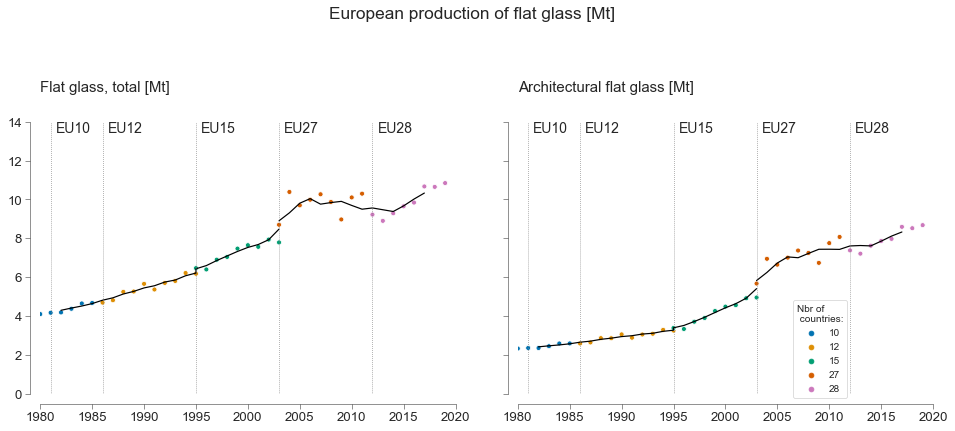

In [35]:
# Plot the European production of flat glass (total and only arch glass):
data = ['Production', 'Architectural glass production']

# Plot two figures:
fig, axes = plt.subplots(nrows=1, ncols=2,
                         sharex=True, sharey=True,
                         figsize=(16, 5))

for col, data in enumerate(data):
    for i, j in EU_COUNTRIES:
        ax = axes[col]
        # Plot the trend curve for flat glass production:
        ax.plot(df_eu.interpolate().rolling(5, center=True).mean().loc[i:j]
                .reset_index(level='Nbr of countries')
                .sort_values(by=['year'])
                [f"{data} [kt]"],
                c='black', linestyle='-')

    # Plot data gathered from literature review:
    sns.scatterplot(data=df_eu.loc[10:28].reset_index(),
                    x='year', y=f"{data} [kt]",
                    hue='Nbr of countries',
                    palette='colorblind',
                    marker='.', s=100,
                    ax=ax)
    ax.get_legend().remove()

    # Divide by 1000 the y-axis, results in Mt:
    ax.yaxis.set_major_formatter(y_1000)

    if col == 0:
        ax.set_title('Flat glass, total [Mt]', pad=30, loc='left')
        ax.yaxis.label.set_visible(False)
    else:
        ax.set_title('Architectural flat glass [Mt]', pad=30, loc='left')

    # Plot lines highlighting changes in the scope, i.e., EU enlargement:
    for y, x in EU_KDATES.items():
        ax.axvline(x=x, c='grey', linestyle=':', linewidth=0.75)
        ax.text(x+0.5, 14000, f"{y}", fontsize=14,
                verticalalignment='top')

    style_ax(ax)
    ax.set_xlim(1980, 2020)
    ax.set_ylim(0, 14000)

# Add legend:
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=1, loc='lower right',
           title='Nbr of \n countries:',
           bbox_to_anchor=(0.83, 0.1))

plt.suptitle('European production of flat glass [Mt]', weight='light', y=1.2)

fig.subplots_adjust(wspace=0.15)

sns.despine(offset=10)
plt.show()

if export:
    # Save image:
    fig.savefig(os.path.join(path_img, 'Fig2_EU_FlatGlassProd.png'),
                dpi=600, bbox_inches='tight')
    fig.savefig(os.path.join(path_img, 'Fig2_EU_FlatGlassProd.pdf'),
                bbox_inches='tight')

# Flat Glass Production in France and Belgium

## Creating a Dataframe for Flat Glass Flows

In [36]:
# Create a DataFrame from production datasets:
df_fr_prod = fr_data.parse('prod').set_index('year')
df_be_prod = be_data.parse('prod').set_index('year')

In [37]:
# Create DataFrames from import and export datasets:
df_fr_imp = fr_data.parse('import').set_index('year')
df_fr_exp = fr_data.parse('export').set_index('year')

df_be_imp = be_data.parse('import').set_index('year')
df_be_exp = be_data.parse('export').set_index('year')

In [38]:
# Create a unique DataFrame for FR and BE flat glass flows:
df_be_fr = pd.concat([df_fr_prod['flat glass, kt'],
                      df_be_prod['flat glass, kt'],
                      df_fr_imp['flat glass, kt'],
                      df_be_imp['flat glass, kt'],
                      df_fr_exp['flat glass, kt'],
                      df_be_exp['flat glass, kt']],
                     axis=1, keys=[('Production [kt]', 'France'),
                                   ('Production [kt]', 'Belgium'),
                                   ('Import [kt]', 'France'),
                                   ('Import [kt]', 'Belgium'),
                                   ('Export [kt]', 'France'),
                                   ('Export [kt]', 'Belgium')],
                     names=['Info', 'Country']).stack()

df_be_fr = df_be_fr.unstack()

In [39]:
# Overview of FR and BE dataframe, flat glass flows:
# Overview of the EU dataframe:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10):
    display(df_be_fr)

Info    Export [kt]         Import [kt]         Production [kt]         
Country     Belgium  France     Belgium  France         Belgium   France
year                                                                    
1945            NaN     NaN         NaN     NaN             NaN   108.30
1946            NaN     NaN         NaN     NaN             NaN   173.80
1947            NaN     NaN         NaN     NaN             NaN   198.30
1948            NaN     NaN         NaN     NaN             NaN   220.20
1949            NaN     NaN         NaN     NaN             NaN   191.30
1950            NaN   55.60         NaN     NaN          206.25   190.40
1951            NaN     NaN         NaN     NaN             NaN   222.70
1952            NaN   51.66         NaN    1.15             NaN   191.60
1953         215.53   55.20         NaN    1.13             NaN   212.60
1954         240.30   51.93         NaN   10.71             NaN   214.60
1955         327.26   51.90         NaN   12.10             NaN   260.60
1956         343.58     NaN         NaN     NaN             NaN   292.90
1957         290.51   48.09         NaN     NaN             NaN   329.60
1958         328.39     NaN        4.73     NaN             NaN   361.20
1959         431.70     NaN         NaN     NaN             NaN   415.50
1960         461.83     NaN       15.00     NaN          699.90   416.60
1961         395.08     NaN        5.00     NaN          582.93   402.80
1962         468.41  142.80       12.00   16.40          726.22   474.30
1963         435.26     NaN        8.00     NaN          642.12   491.20
1964         491.89     NaN       22.03     NaN          747.32   543.10
1965         419.02     NaN       24.21     NaN          606.51   563.80
1966         394.00  137.10       35.00   34.30          619.07   575.20
1967         387.00     NaN       27.00     NaN          633.10   523.00
1968         430.00  159.00       34.00   60.30          674.30   547.90
1969         451.00     NaN       36.00     NaN          729.02   586.40
1970         571.00  150.00       37.00   65.00          871.00   536.40
1971         522.00  159.85       38.00   72.00          813.50   535.40
1972         599.00  179.55       45.00   98.00          850.19   569.20
1973         602.00  208.79       59.00  108.00          929.88   672.30
1974         547.00  233.89       58.00  125.00          830.65   655.00
1975         384.00  204.02       53.00  107.00          588.41   510.60
1976         536.00  225.31       85.00  152.00          768.41   621.60
1977         575.00  248.19       98.00  156.00          838.34   600.50
1978         661.00  263.45       91.00  161.00          811.58   532.60
1979         674.00  300.63      110.00  194.00          841.47   675.40
1980         689.00  317.79      131.00  211.00          856.36   752.00
1981         620.00  333.36      128.00  201.00          706.85   713.00
1982         709.00  332.41      171.00  223.00          710.00   755.00
1983         769.00  358.47      155.00  234.00          706.00   789.00
1984         860.00  381.67      136.00  244.00          840.00   771.00
1985         841.00  395.65      151.00  258.00          802.00   725.00
1986         893.00  360.69      160.00  278.00          825.00   685.00
1987         964.00  382.94      196.00  304.00          885.95   705.00
1988         986.00     NaN      200.00     NaN          945.91   780.00
1989        1186.00  223.53      204.00     NaN          989.09   775.00
1990        1200.00  317.02      187.00     NaN         1142.00   875.00
1991        1068.00  267.31      209.00     NaN          898.00   820.00
1992        1075.00  296.17      230.00     NaN         1013.00   827.68
1993            NaN  313.43         NaN     NaN          961.00   809.00
1994            NaN  362.90         NaN     NaN         1103.00   867.42
1995            NaN  263.61         NaN     NaN         1193.00   853.00
1996        1001.98  297.09      227.75     NaN         11

In [40]:
df_first_valid_index = df_be_fr.apply(lambda col: col.first_valid_index()).T
df_first_valid_index.columns = df_be_fr.index.names
df_first_valid_index.unstack().style.set_caption('First year with data')

Country,Belgium,France
Info,,
Export [kt],1953,1950
Import [kt],1958,1952
Production [kt],1950,1945


## Production of Flat Glass

In [41]:
countries = ['Belgium', 'France']

Text(0.5, 1.0, 'Flat glass production [kt/y]')

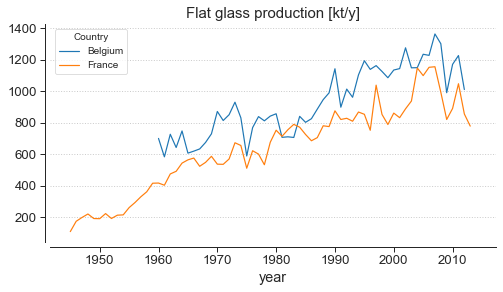

In [42]:
# Plot the BE and FR production of flat glass:
fig, ax = plt.subplots(figsize=(8, 4))

df_be_fr['Production [kt]'].plot(ax=ax)
ax.grid(which='major', axis='y', linestyle=':', linewidth=1)

sns.despine(offset=5)
ax.set_title('Flat glass production [kt/y]')

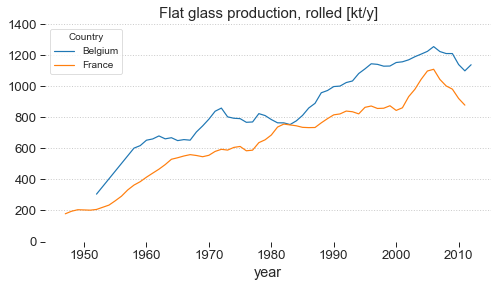

In [43]:
fig, ax = plt.subplots(figsize=(8, 4))

df_be_fr['Production [kt]'].interpolate(
    method="linear", limit_area='inside').rolling(
    5, center=True).mean().plot(ax=ax)

sns.despine(bottom=True, left=True)
ax.set_ylim(0, 1400)
ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
ax.set_title('Flat glass production, rolled [kt/y]')

plt.show()

## Consumption of Flat Glass

In [44]:
# Caculate import and export ratios relative to production:
df_be_fr = df_be_fr.stack()

df_be_fr['Import Ratio'] = df_be_fr['Import [kt]'] / \
    df_be_fr['Production [kt]']
df_be_fr['Export Ratio'] = df_be_fr['Export [kt]'] / \
    df_be_fr['Production [kt]']

df_be_fr = df_be_fr.unstack()

In [45]:
ratios = ['Export', 'Import']

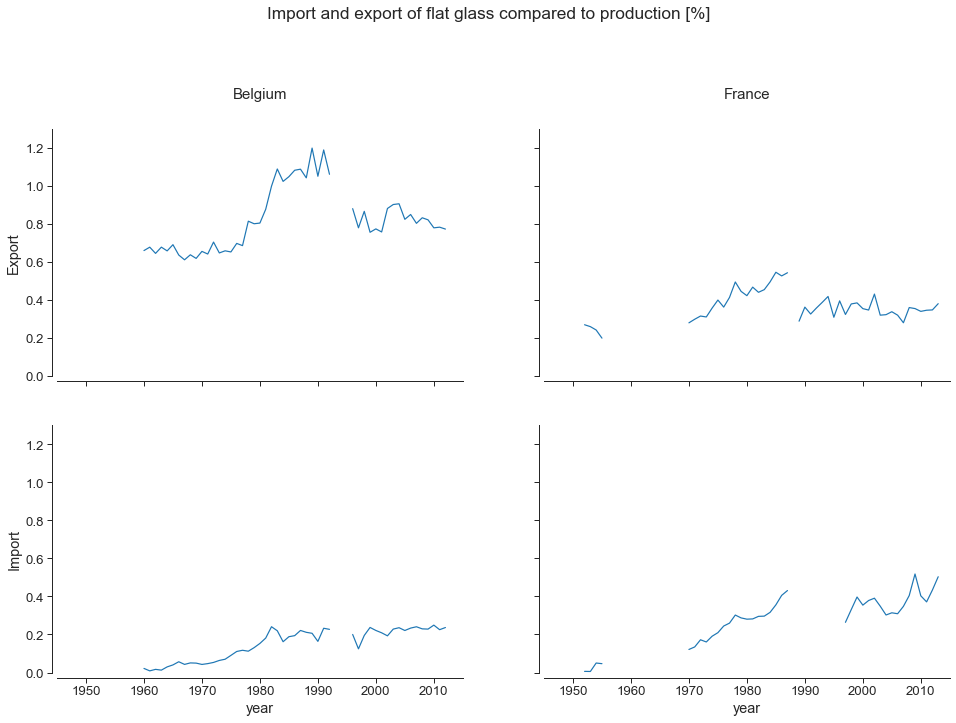

In [46]:
# Plot import and export ratios for FR and BE:
nrows = len(ratios)
ncols = len(countries)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         sharex=True, sharey=True)

for row, ratio in enumerate(ratios):
    for col, country in enumerate(countries):
        ax = axes[row][col]
        (df_be_fr[(f"{ratio} Ratio", country)].plot(ax=ax))

        if row == 0:
            ax.set_title(country, y=1.1)
        if col == 0:
            ax.set_ylabel(ratio)


ax.set_ylim(0, 1.3)
ax.set_xlim(1945, 2015)

fig.suptitle("Import and export of flat glass compared to production [%]",
             y=1.05)
sns.despine(offset=5)
plt.show()

In [47]:
# Interpolation for missing data:
cols = [x for x in df_be_fr.columns if x[0]
        in ['Import Ratio', 'Export Ratio']]

df_be_fr[cols] = (df_be_fr[cols].interpolate(method='linear'))

In [48]:
df_be_fr.loc[1950:1960, cols]

Info    Import Ratio           Export Ratio       
Country      Belgium    France      Belgium France
year                                              
1950             NaN       NaN          NaN   0.29
1951             NaN       NaN          NaN   0.28
1952             NaN  5.99e-03          NaN   0.27
1953             NaN  5.33e-03          NaN   0.26
1954             NaN  4.99e-02          NaN   0.24
1955             NaN  4.64e-02          NaN   0.20
1956             NaN  4.47e-02          NaN   0.17
1957             NaN  4.30e-02          NaN   0.15
1958             NaN  4.14e-02          NaN   0.18
1959             NaN  3.97e-02          NaN   0.21
1960            0.02  3.80e-02         0.66   0.24

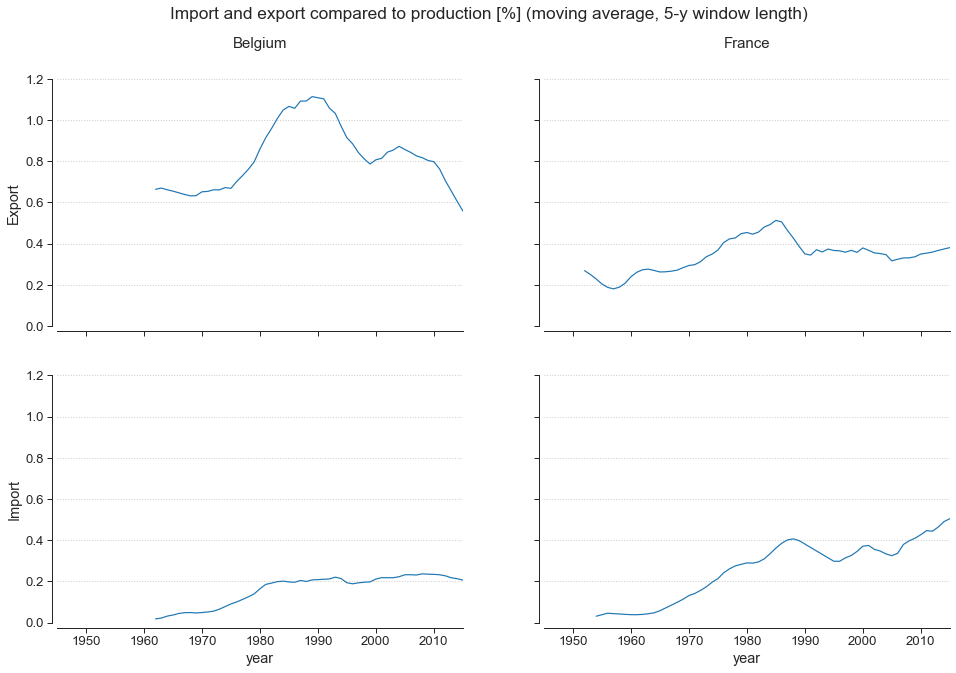

In [49]:
# Plot import and export ratios, w/ a moving average (5-y. window length):
nrows = len(ratios)
ncols = len(countries)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         sharex=True, sharey=True)

for row, ratio in enumerate(ratios):
    for col, country in enumerate(countries):
        ax = axes[row][col]
        (df_be_fr[(f"{ratio} Ratio", country)]
         .rolling(5, center=True).mean()
         .plot(ax=ax))

        ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
        if row == 0:
            ax.set_title(country, y=1.1)
        if col == 0:
            ax.set_ylabel(ratio)

ax.set_xlim(1945, 2015)
ax.set_ylim(0, 1.2)

fig.suptitle(
    "Import and export compared to production [%] (moving average, 5-y window length)")
sns.despine(offset=5)
plt.show()

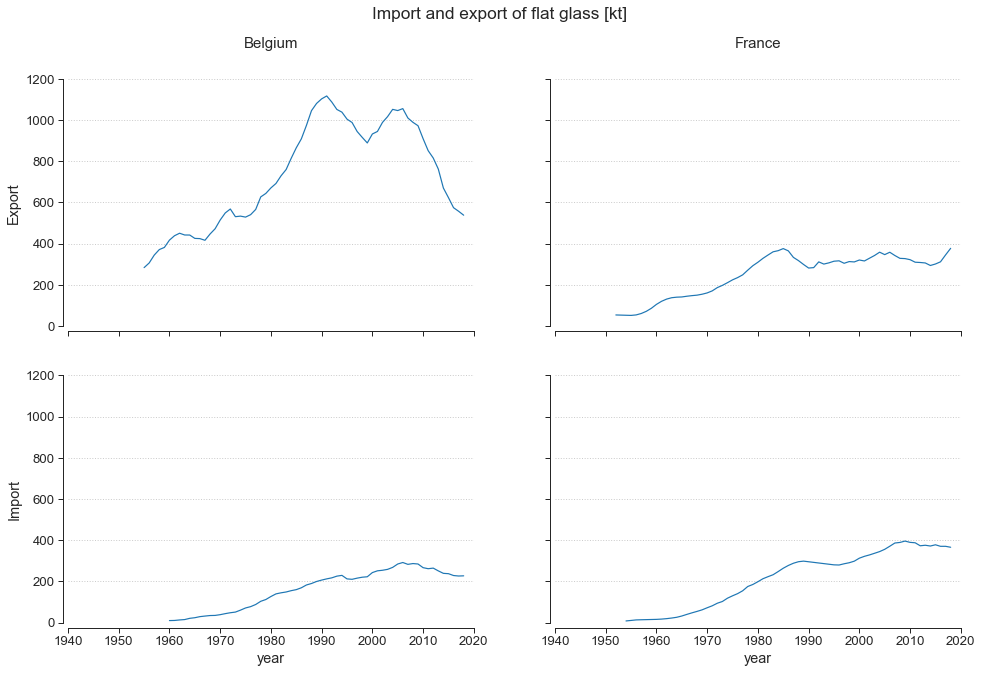

In [50]:
# Plot total import and export flows, moving average w/ a 5-y. window length:
fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         sharex=True, sharey=True,
                         figsize=(16, 10))

for row, ratio in enumerate(ratios):
    for col, country in enumerate(countries):
        ax = axes[row][col]
        (df_be_fr[(f"{ratio} [kt]", country)]
         .interpolate(method='linear')
         .rolling(5, center=True).mean()
         .plot(ax=ax))

        ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
        if row == 0:
            ax.set_title(country, y=1.1)
        if col == 0:
            ax.set_ylabel(ratio)

ax.set_xlim(1940, 2020)
ax.set_ylim(0, 1200)

fig.suptitle("Import and export of flat glass [kt]")
sns.despine(offset=5)
plt.show()

In [51]:
# Calulate the total consumption of flat glass in BE and FR:
df_be_fr = df_be_fr.stack()

df_be_fr['Consumption [kt]'] = df_be_fr['Production [kt]'] * \
    (1 + df_be_fr['Import Ratio'] - df_be_fr['Export Ratio'])

df_be_fr = df_be_fr.unstack()

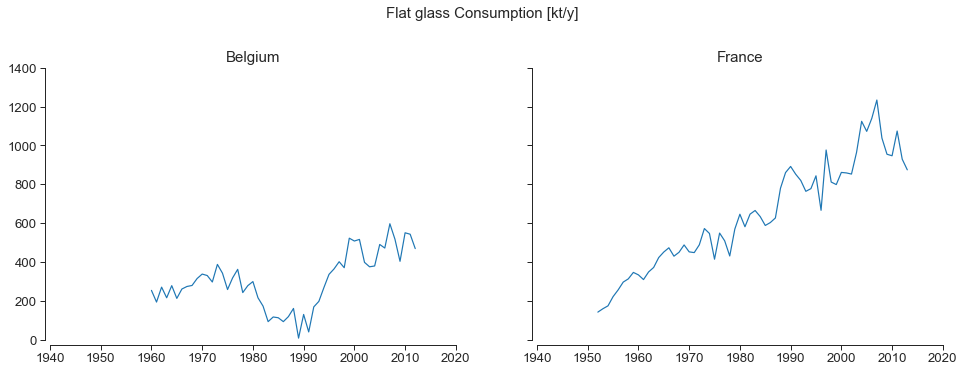

In [52]:
# Plot total consumption of flat glass:
fig, axes = plt.subplots(nrows=1, ncols=2,
                         figsize=(16, 5),
                         sharex=True, sharey=True)

for i, (ax, country) in enumerate(zip(axes.flatten(), countries)):

    ax.plot(df_be_fr.index,
            df_be_fr['Consumption [kt]'][country])
    ax.set_title(country)

ax.set_xlim(1940, 2020)
ax.set_ylim(0, 1400)

fig.suptitle('Flat glass Consumption [kt/y]', fontsize=15, y=1.05)
sns.despine(offset=5)
plt.show()

In [53]:
# Create a DataFrame for the FR and BE demography:
df_fr_pop = fr_data.parse('Population').set_index('year')
df_be_pop = be_data.parse('Population').set_index('year')

In [54]:
# Create a single DataFrame for French and Belgian population since 1945:
df_be_fr_pop = pd.concat([df_fr_pop['Population, x1000'],
                          df_be_pop['Population, x1000']],
                         axis=1, keys=[('Population [x1000]', 'France'),
                                       ('Population [x1000]', 'Belgium')],
                         names=['Info', 'Country']).stack()

df_be_fr_pop = df_be_fr_pop.unstack()

In [55]:
# Linear interpolation for a few missing data (BE, from 1947 to 1959):
df_be_fr_pop[('Population [x1000]', 'Belgium')] = (
    df_be_fr_pop[('Population [x1000]', 'Belgium')
                 ].interpolate(method='linear')
)

In [56]:
# Estimate the consumption per capita:
for country in countries:
    df_be_fr[('Consumption [kg/cap]', country)] = (
        df_be_fr[('Consumption [kt]', country)]
        / df_be_fr_pop[('Population [x1000]', country)] * 1000
    )

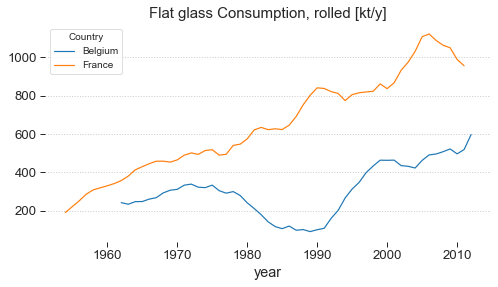

In [57]:
fig, ax = plt.subplots(figsize=(8, 4))

df_be_fr['Consumption [kt]'].interpolate(
    method="linear", limit_area='inside').rolling(5, center=True).mean().plot(ax=ax)
sns.despine(bottom=True, left=True)
ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
ax.set_title('Flat glass Consumption, rolled [kt/y]')

plt.show()

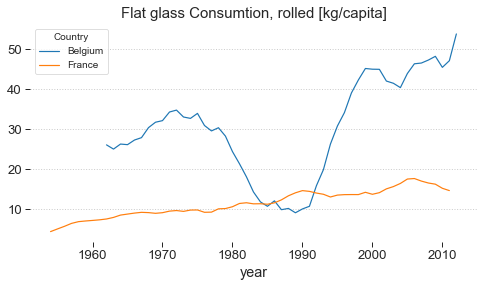

In [58]:
fig, ax = plt.subplots(figsize=(8, 4))

df_be_fr['Consumption [kg/cap]'].interpolate(
    method="linear", limit_area='inside').rolling(5, center=True).mean().plot(ax=ax)
sns.despine(bottom=True, left=True)
ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
ax.set_title('Flat glass Consumtion, rolled [kg/capita]')

plt.show()

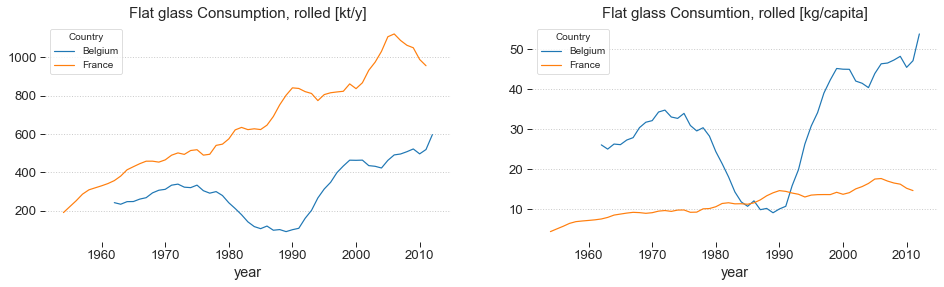

In [59]:
fig, (ax0, ax1) = plt.subplots(
    figsize=(16, 4), ncols=2, sharex=True, sharey=False)

(df_be_fr['Consumption [kt]']
 .interpolate(method="linear", limit_area='inside')
 .rolling(5, center=True).mean()
 .plot(ax=ax0)
 )
sns.despine(bottom=True, left=True)
ax0.grid(which='major', axis='y', linestyle=':', linewidth=1)
ax0.set_title('Flat glass Consumption, rolled [kt/y]')

(df_be_fr['Consumption [kg/cap]']
 .interpolate(method="linear", limit_area='inside')
 .rolling(5, center=True).mean()
 .plot(ax=ax1)
 )
sns.despine(bottom=True, left=True)
ax1.grid(which='major', axis='y', linestyle=':', linewidth=1)
ax1.set_title('Flat glass Consumtion, rolled [kg/capita]')


plt.show()

## Production of Architectural Flat Glass

In [60]:
# Share of building glass relative to the total flat glass production in FR:
df_share_fr = df_fr_prod[['bldg glass/flat glass, %']].dropna()

print(df_share_fr.isnull().value_counts())
df_share_fr

bldg glass/flat glass, %
False                       13
dtype: int64


,"bldg glass/flat glass, %"
year,
1945,0.90
1952,0.80
1962,0.68
1968,0.50
1980,0.50
1994,0.50
2002,0.52
2004,0.49
2009,0.52


In [61]:
# Calculate the main parameters of a regression curve, second order
# to interpolate "arch glass/total flat glass" ratio, with uncertainties:
df_share_fr['Trend'] = df_fr_prod[['bldg glass/flat glass, %']].copy()

df_share_fr = df_share_fr.reset_index()

X_FR = df_share_fr['year'].values
Y_FR = df_share_fr['Trend'].values

df_share_fr = df_share_fr.set_index('year')

# Order of the regression:
N = 3

# Polynomial coefficients and covariance matrix:
coeffs, cov = np.polyfit(X_FR, Y_FR, N, cov=True)

results_fr = {}
results_fr['Polynomial'] = coeffs.tolist()
results_fr['Covariance'] = cov.tolist()

# Interpolation:
T_FR = np.linspace(1945, 2020, 76)

# Matrix with rows 1, t, t**2...:
TT = np.vstack([T_FR**(N-i) for i in range(1+N)]).T

# Matrix multiplication for the polynomial values:
Z_FR = np.dot(TT, coeffs)

# Standard deviations (sqrt of diagonal):
SIG_FR = np.sqrt(
    np.diag(
        np.dot(TT, np.dot(cov, TT.T))
    ))

# r-squared
P_FR = np.poly1d(coeffs)

# fit values, and mean
YHAT_FR = P_FR(X_FR)                      # vector y = p(z) for z in x
YBAR_FR = np.sum(Y_FR)/len(Y_FR)          # mean of y data
SSRES_FR = np.sum((YHAT_FR-YBAR_FR)**2)   # residual sum of squares
SSTOT_FR = np.sum((Y_FR-YBAR_FR)**2)    # total sum squares

results_fr['Coefficient of determination'] = SSRES_FR / SSTOT_FR

results_fr

{'Polynomial': [-2.378960893414362e-06,
  0.014301359629274039,
  -28.656983590865888,
  19140.70797173813],
 'Covariance': [[2.8029866613415203e-12,
   -1.6645777335936083e-08,
   3.2948302953039774e-05,
   -0.021737417444942602],
  [-1.6645777335958778e-08,
   9.88533429177357e-05,
   -0.19567014611392025,
   129.09330281953902],
  [3.294830295312971e-05,
   -0.1956701461141876,
   387.3129582861321,
   -255532.078955934],
  [-0.021737417445031697,
   129.09330281989222,
   -255532.0789562839,
   168590499.05965033]],
 'Coefficient of determination': 0.9311453347637837}

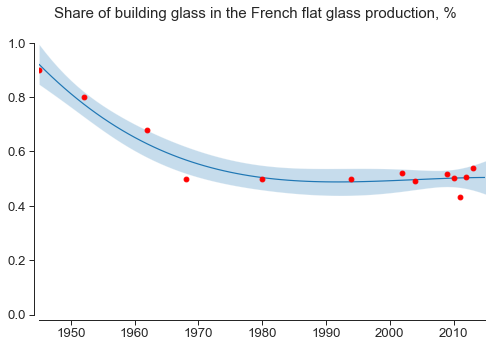

In [62]:
# Scatterplot of the ratio and plot of a regression curve, 2nd order:
fig, ax = plt.subplots(figsize=(8, 5))

ax.fill_between(T_FR, Z_FR+1.96*SIG_FR, Z_FR-1.96*SIG_FR, alpha=0.25)
ax.plot(T_FR, Z_FR, '-')
ax.plot(X_FR, Y_FR, 'ro')

ax.set_ylim(0, 1)
ax.set_xlim(1945, 2015)

fig.suptitle('Share of building glass in the French flat glass production, %',
             fontsize=15)
sns.despine(offset=5)
plt.show()

In [63]:
# Share of building glass relative to the total flat glass production in BE:
df_share_be = df_be_prod[['bldg glass/flat glass, %']].dropna()

print(df_share_be.isnull().sum())
df_share_be

bldg glass/flat glass, %    0
dtype: int64


,"bldg glass/flat glass, %"
year,
1945,0.90
1950,0.90
1960,0.88
1965,0.85
1970,0.82
1975,0.76
1980,0.66
1990,0.63
1992,0.62


In [64]:
# Calculate the main parameters of a regression curve, second order
# to interpolate "arch glass/total flat glass" ratio, with uncertainties:
df_share_be['Trend'] = df_be_prod[['bldg glass/flat glass, %']].copy()
df_share_be = df_share_be.reset_index()

X_BE = df_share_be['year'].values
Y_BE = df_share_be['Trend'].values

df_share_be = df_share_be.set_index('year')

# Order of the regression:
N = 3

# Polynomial coefficients and covariance matrix:
coeffs, cov = np.polyfit(X_BE, Y_BE, N, cov=True)

results_be = {}
results_be['Polynomial'] = coeffs.tolist()
results_be['Covariance'] = cov.tolist()

# Interpolation:
T_BE = np.linspace(1945, 2020, 76)

# Matrix with rows 1, t, t**2...:
TT = np.vstack([T_BE**(N-i) for i in range(1+N)]).T

# Matrix multiplication for the polynomial values:
Z_BE = np.dot(TT, coeffs)

# Standard deviations (sqrt of diagonal):
SIG_BE = np.sqrt(
    np.diag(
        np.dot(TT, np.dot(cov, TT.T))
    ))

# r-squared
P_BE = np.poly1d(coeffs)

# fit values, and mean
YHAT_BE = P_BE(X_BE)                      # vector y = p(z) for z in x
YBAR_BE = np.sum(Y_BE)/len(Y_BE)          # mean of y data
SSRES_BE = np.sum((YHAT_BE-YBAR_BE)**2)   # residual sum of squares
SSTOT_BE = np.sum((Y_BE-YBAR_BE)**2)    # total sum squares

results_be['Coefficient of determination'] = SSRES_BE / SSTOT_BE

results_be

{'Polynomial': [2.859475433565633e-06,
  -0.016906254874189744,
  33.31168817449135,
  -21873.506821475417],
 'Covariance': [[2.8149117618926745e-12,
   -1.6713476977631304e-08,
   3.30762700884234e-05,
   -0.021817950298552182],
  [-1.6713476977629835e-08,
   9.923683058136624e-05,
   -0.19639330103894984,
   129.54723759393755],
  [3.307627008841757e-05,
   -0.19639330103893252,
   388.67313534672996,
   -256383.50809165265],
  [-0.021817950298546426,
   129.54723759391476,
   -256383.50809163015,
   169121853.30445513]],
 'Coefficient of determination': 0.8398251999648286}

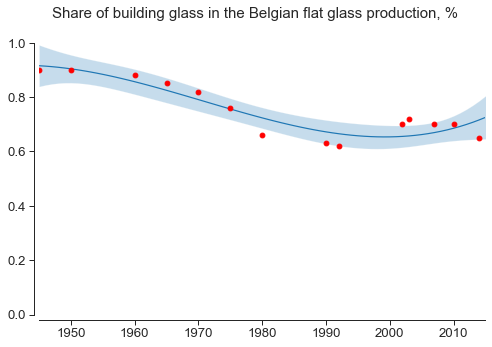

In [65]:
# Scatterplot of the ratio and plot of a regression curve, 2nd order:
fig, ax = plt.subplots(figsize=(8, 5))

ax.fill_between(T_BE, Z_BE+1.96*SIG_BE, Z_BE-1.96*SIG_BE, alpha=0.25)
ax.plot(T_BE, Z_BE, '-')
ax.plot(X_BE, Y_BE, 'ro')

ax.set_ylim(0, 1)
ax.set_xlim(1945, 2015)

fig.suptitle('Share of building glass in the Belgian flat glass production, %',
             fontsize=15)
sns.despine(offset=5)
plt.show()

In [66]:
# Create a unique DataFrame for FR and BE flat glass flows:
df_bldg_share = pd.concat([df_fr_prod['bldg glass/flat glass, %'],
                           df_be_prod['bldg glass/flat glass, %']],
                          axis=1, keys=[('bldg glass/flat glass, %', 'France'),
                                        ('bldg glass/flat glass, %', 'Belgium')],
                          names=['Info', 'Country']).stack(dropna=False)

df_bldg_share = df_bldg_share.unstack()

In [67]:
# Interpolate values according to
# nonlinear regression previously estimated
df_bldg_share[('Mean ratio arch glass/flat glass, %', 'France')
              ] = Z_FR.tolist()
df_bldg_share[('Mean ratio arch glass/flat glass, %',
               'Belgium')] = Z_BE.tolist()

In [68]:
# Integrate standard deviation in df_fr_prod
df_bldg_share[('std for ratio arch glass/flat glass', 'France')
              ] = SIG_FR.tolist()
df_bldg_share[('std for ratio arch glass/flat glass',
               'Belgium')] = SIG_BE.tolist()

df_bldg_share

Info    bldg glass/flat glass, %        Mean ratio arch glass/flat glass, %  \
Country                  Belgium France                              France   
year                                                                          
1945                         0.9    0.9                                0.92   
1946                         NaN    NaN                                0.90   
1947                         NaN    NaN                                0.87   
1948                         NaN    NaN                                0.85   
1949                         NaN    NaN                                0.83   
...                          ...    ...                                 ...   
2016                         NaN    NaN                                0.50   
2017                         NaN    NaN                                0.50   
2018                         NaN    NaN                                0.50   
2019                         NaN    NaN                                0.50   
2020                         NaN    NaN                                0.50   

Info            std for ratio arch glass/flat glass          
Country Belgium                              France Belgium  
year                                                         
1945       0.92                                0.04    0.04  
1946       0.91                                0.03    0.04  
1947       0.91                                0.03    0.03  
1948       0.91                                0.03    0.03  
1949       0.91                                0.03    0.03  
...         ...                                 ...     ...  
2016       0.74                                0.04    0.05  
2017       0.75                                0.04    0.05  
2018       0.76                                0.05    0.06  
2019       0.77                                0.05    0.06  
2020       0.78                                0.06    0.07  

[76 rows x 6 columns]

In [69]:
# Estimate architectural flat glass production in FR and BE:
for country in countries:
    df_be_fr[('Architectural glass production [kt]', country)] = (
        df_be_fr[('Production [kt]', country)]
        * df_bldg_share[('Mean ratio arch glass/flat glass, %', country)]
    )

for country in countries:
    df_be_fr[('std for arch glass production', country)] = (
        df_be_fr[('Production [kt]', country)]
        * df_bldg_share[('std for ratio arch glass/flat glass', country)]
    )

In [70]:
# Calculate data for uncertainties according to the standard deviaton, 95%:
x = np.array(df_be_fr.index)

yminFR = np.array(df_be_fr[('Architectural glass production [kt]', 'France')]
                  .interpolate(method="linear", limit_area='inside')
                  + 1.96
                  * df_be_fr[('std for arch glass production', 'France')]
                  .interpolate(method="linear", limit_area='inside'))

ymaxFR = np.array(df_be_fr[('Architectural glass production [kt]', 'France')]
                  .interpolate(method="linear", limit_area='inside')
                  - 1.96
                  * df_be_fr[('std for arch glass production', 'France')]
                  .interpolate(method="linear", limit_area='inside'))

yminBE = np.array(df_be_fr[('Architectural glass production [kt]', 'Belgium')]
                  .interpolate(method="linear", limit_area='inside')
                  + 1.96
                  * df_be_fr[('std for arch glass production', 'Belgium')]
                  .interpolate(method="linear", limit_area='inside'))

ymaxBE = np.array(df_be_fr[('Architectural glass production [kt]', 'Belgium')]
                  .interpolate(method="linear", limit_area='inside')
                  - 1.96
                  * df_be_fr[('std for arch glass production', 'Belgium')]
                  .interpolate(method="linear", limit_area='inside'))

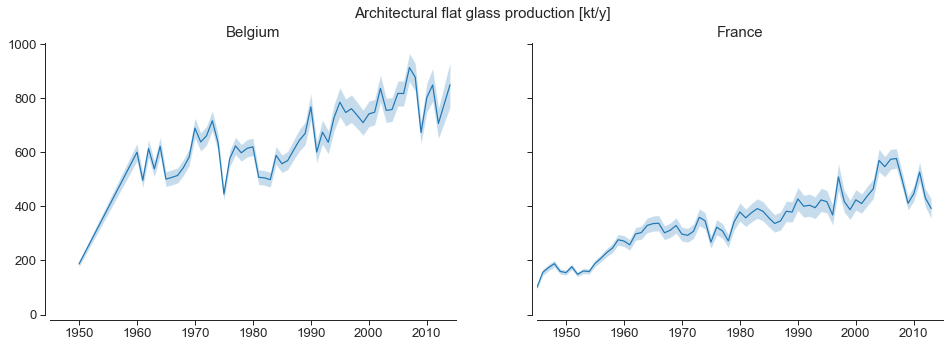

In [71]:
# Plot architectural flat glass production with uncertainties (95%):
fig, axes = plt.subplots(nrows=1, ncols=2,
                         figsize=(16, 5),
                         sharex=True, sharey=True)

for i, (ax, country) in enumerate(zip(axes.flatten(), countries)):

    ax.plot(df_be_fr.index,
            df_be_fr['Architectural glass production [kt]'][country]
            .interpolate(method="linear", limit_area='inside'))

    if country == 'France':
        ax.fill_between(x, yminFR, ymaxFR, alpha=0.25)
    elif country == 'Belgium':
        ax.fill_between(x, yminBE, ymaxBE, alpha=0.25)

    ax.set_title(country)
    ax.set_xlim(1945, 2015)
    ax.set_ylim(ymin=0)

fig.suptitle('Architectural flat glass production [kt/y]', fontsize=15)
sns.despine(offset=5)
plt.show()

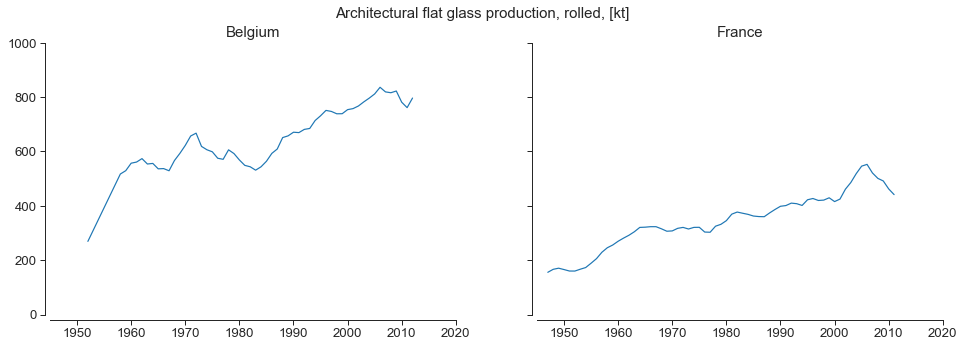

In [72]:
# Plot architectural flat glass prod, with a moving average, no uncertainty:
fig, axes = plt.subplots(nrows=1, ncols=2,
                         figsize=(16, 5),
                         sharex=True, sharey=True)

for i, (ax, country) in enumerate(zip(axes.flatten(), countries)):
    ax.plot(df_be_fr.index,
            df_be_fr['Architectural glass production [kt]'][country]
            .interpolate(method="linear", limit_area='inside')
            .rolling(5, center=True).mean())

    ax.set_title(country)
    ax.set_xlim(1945, 2020)
    ax.set_ylim(0, 1000)

fig.suptitle('Architectural flat glass production, rolled, [kt]', fontsize=15)
sns.despine(offset=5)
plt.show()

In [73]:
# Calculate data for uncertainties according to the standard deviaton, 95%,
# and undertake a moving average with a 5-y. window length:
ymin_fr = np.array((df_be_fr[('Architectural glass production [kt]', 'France')]
                   .interpolate(method="linear", limit_area='inside')
                   .rolling(5, center=True).mean())
                   + 1.96*df_be_fr[('std for arch glass production', 'France')]
                   .interpolate(method="linear", limit_area='inside')
                   )
ymax_fr = np.array((df_be_fr[('Architectural glass production [kt]', 'France')]
                   .interpolate(method="linear", limit_area='inside')
                   .rolling(5, center=True).mean())
                   - 1.96*df_be_fr[('std for arch glass production', 'France')]
                   .interpolate(method="linear", limit_area='inside')
                   )

ymin_be = np.array((df_be_fr[('Architectural glass production [kt]', 'Belgium')]
                   .interpolate(method="linear", limit_area='inside')
                   .rolling(5, center=True).mean())
                   + 1.96 *
                   df_be_fr[('std for arch glass production', 'Belgium')]
                   .interpolate(method="linear", limit_area='inside')
                   )
ymax_be = np.array((df_be_fr[('Architectural glass production [kt]', 'Belgium')]
                    .interpolate(method="linear", limit_area='inside')
                    .rolling(5, center=True).mean())
                   - 1.96 *
                   df_be_fr[('std for arch glass production', 'Belgium')]
                   .interpolate(method="linear", limit_area='inside')
                   )

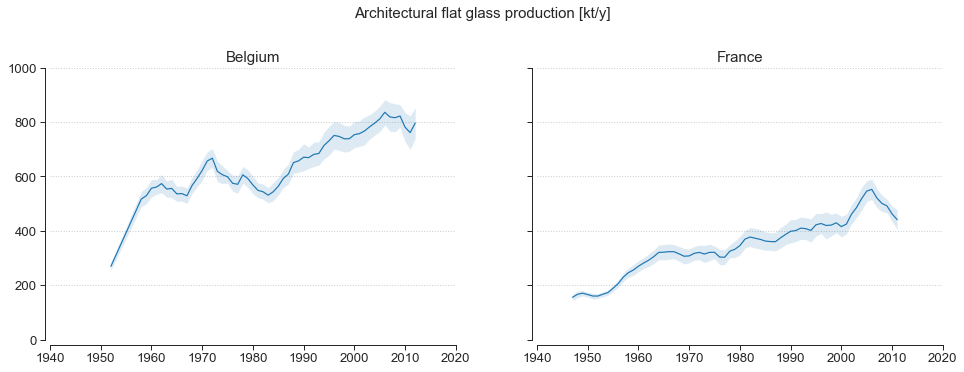

In [74]:
# Plot architectural flat glass prod, with a moving average and uncertainties:
fig, axes = plt.subplots(nrows=1, ncols=2,
                         figsize=(16, 5),
                         sharex=True, sharey=True)

for i, (ax, country) in enumerate(zip(axes.flatten(), countries)):
    ax.plot(df_be_fr.index,
            (df_be_fr[('Architectural glass production [kt]', country)]
             .interpolate(method="linear", limit_area='inside')
             .rolling(5, center=True).mean()))

    if country == 'France':
        ax.fill_between(x, ymin_fr, ymax_fr, alpha=0.15)
    elif country == 'Belgium':
        ax.fill_between(x, ymin_be, ymax_be, alpha=0.15)

    ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
    ax.set_title(country)
    ax.set_xlim(1940, 2020)
    ax.set_ylim(0, 1000)

fig.suptitle('Architectural flat glass production [kt/y]',
             fontsize=15, y=1.05)
sns.despine(offset=5)
plt.show()

## Consumption of Architectural Flat Glass

In [75]:
# Calculate Belgian and French consumption of architectural flat glass:
df_be_fr = df_be_fr.stack()

df_be_fr['Architectural glass consumption [kt]'] = (
    df_be_fr['Architectural glass production [kt]']
    + df_be_fr['Import Ratio'] *
    df_be_fr['Architectural glass production [kt]']
    - df_be_fr['Export Ratio'] *
    df_be_fr['Architectural glass production [kt]']
)

df_be_fr = df_be_fr.unstack()

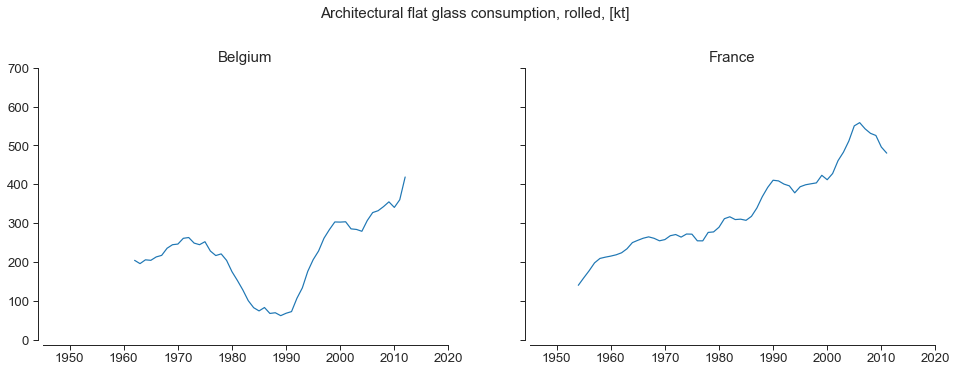

In [76]:
# Interpolate and calculate a mean average for architectural glass consumption
# and plot:
fig, axes = plt.subplots(nrows=1, ncols=2,
                         figsize=(16, 5),
                         sharex=True, sharey=True)

for i, (ax, country) in enumerate(zip(axes.flatten(), countries)):

    ax.plot(df_be_fr.index,
            df_be_fr['Architectural glass consumption [kt]'][country]
            .interpolate(method="linear", limit_area='inside')
            .rolling(5, center=True).mean())

    ax.set_title(country)
    ax.set_xlim(1945, 2020)
    ax.set_ylim(0, 700)

fig.suptitle('Architectural flat glass consumption, rolled, [kt]',
             fontsize=15, y=1.05)
sns.despine(offset=5)
plt.show()

In [77]:
# Estimate the consumption per capita:
for country in countries:
    df_be_fr[('Architectural glass consumption [kg/cap]', country)] = (
        df_be_fr[('Architectural glass consumption [kt]', country)]
        / df_be_fr_pop[('Population [x1000]', country)] * 1000
    )

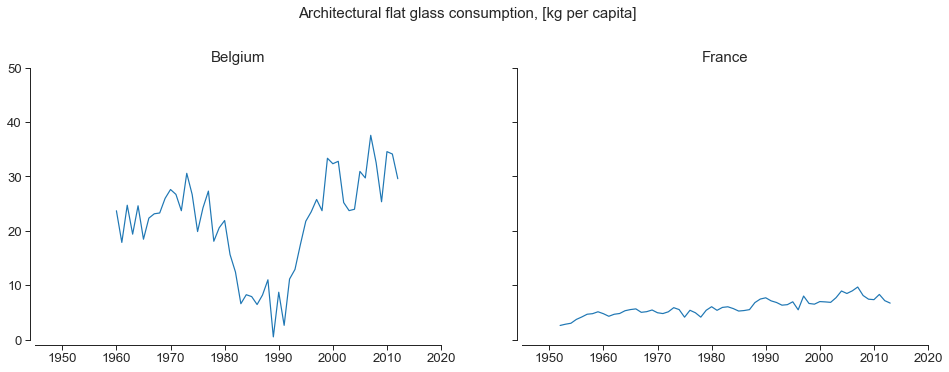

In [78]:
# Plot architectural glass consumption per capita:
fig, axes = plt.subplots(nrows=1, ncols=2,
                         figsize=(16, 5),
                         sharex=True, sharey=True)

for i, (ax, country) in enumerate(zip(axes.flatten(), countries)):
    ax.plot(df_be_fr.index,
            df_be_fr['Architectural glass consumption [kg/cap]'][country])

    ax.set_title(country)
    ax.set_xlim(1945, 2020)
    ax.set_ylim(0, 50)

fig.suptitle('Architectural flat glass consumption, [kg per capita]',
             fontsize=15, y=1.05)
sns.despine(offset=5)
plt.show()

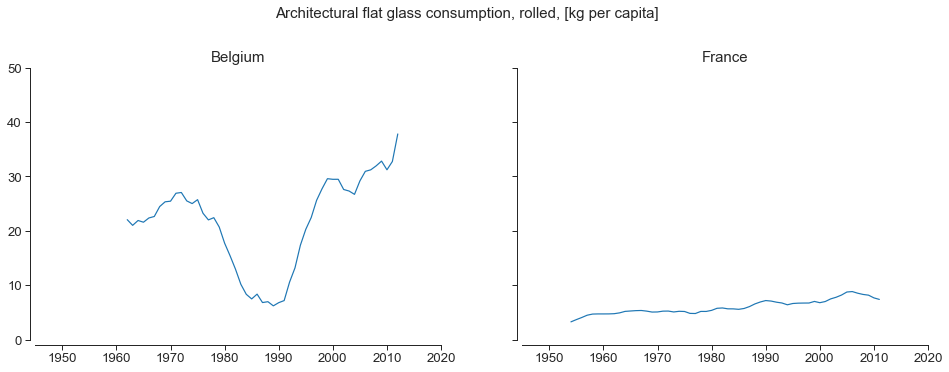

In [79]:
# Interpolation and moving average for architectural glass consuption / cap
# and plot:
fig, axes = plt.subplots(nrows=1, ncols=2,
                         figsize=(16, 5),
                         sharex=True, sharey=True)

for i, (ax, country) in enumerate(zip(axes.flatten(), countries)):
    ax.plot(df_be_fr.index,
            df_be_fr['Architectural glass consumption [kg/cap]'][country]
            .interpolate(method="linear", limit_area='inside')
            .rolling(5, center=True).mean())

    ax.set_title(country)
    ax.set_xlim(1945, 2020)
    ax.set_ylim(0, 50)

fig.suptitle('Architectural flat glass consumption, rolled, [kg per capita]',
             fontsize=15, y=1.05)
sns.despine(offset=5)
plt.show()

## Summary

In [80]:
df_be_fr['Consumption [kt]'].describe()

Country,Belgium,France
count,54.00,62.00
mean,312.35,640.08
std,154.94,273.17
min,7.09,141.09
25%,212.49,434.50
50%,297.27,614.18
75%,394.70,856.54
max,791.58,1233.49


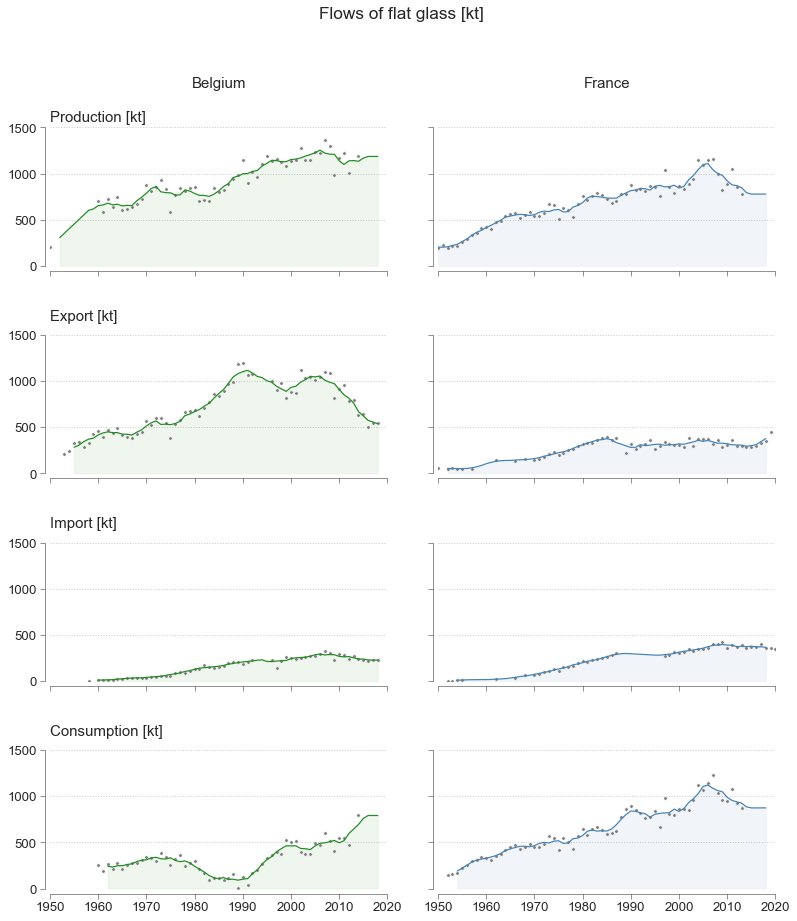

In [81]:
# Plot total import and export flows, moving average w/ a 5-y. window length:
toplot = ['Production', 'Export', 'Import', 'Consumption']
nrows = len(toplot)
ncols = len(countries)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         sharex=True, sharey=True,
                         figsize=(13, 14))

for row, data in enumerate(toplot):
    for col, country in enumerate(countries):
        ax = axes[row][col]
        # Define the color and title for the subplots:
        if country == 'Belgium':
            color = 'forestgreen'
            ax.set_title(f"{data} [kt]", loc='left', pad=15)
        else:
            color = 'steelblue'

        (df_be_fr[(f"{data} [kt]", country)]
         .interpolate(method='linear')
         .rolling(5, center=True).mean()
         .plot(ax=ax, c=color)
         )

        x = df_be_fr.index
        y = (df_be_fr[(f"{data} [kt]", country)]
             .interpolate(method='linear')
             .rolling(5, center=True).mean())
        ax.fill_between(x, y, color=color, alpha=0.075)

        sns.scatterplot(data=df_be_fr[f"{data} [kt]"][country],
                        marker='.', s=50, color='grey',
                        ax=ax)

        ax.get_legend().remove()

        ax.minorticks_off()
        ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
        style_ax(ax)
        ax.set_ylabel(None)

        if row == 0:
            ax.set_title(country, y=1.25)

ax.set_xlim(1950, 2020)
ax.set_ylim(0, 1500)
plt.xticks(np.arange(1950, 2021, 10))

fig.subplots_adjust(wspace=0.15, hspace=0.5)

fig.suptitle("Flows of flat glass [kt]", y=1)
sns.despine(offset=5)

if export:
    # Save image:
    fig.savefig(os.path.join(path_img, 'AppendixC_BEFR_FlatGlassFlows.png'),
                dpi=600, bbox_inches='tight')
    fig.savefig(os.path.join(path_img, 'AppendixC_BEFR_FlatGlassFlows.pdf'),
                bbox_inches='tight')

plt.show()

In [82]:
# Calculate annual growth:
for country in countries:
    df_be_fr[('Growth, flat glass [%]', country)] = (
        df_be_fr[('Production [kt]', country)].pct_change()
    )

    df_be_fr[('Growth, arch glass [%]', country)] = (
        df_be_fr[('Architectural glass production [kt]', country)].pct_change()
    )

    df_be_fr[('Growth, arch glass consumption [%]', country)] = (
        df_be_fr[('Architectural glass consumption [kt]', country)].pct_change()
    )

In [83]:
# Growth of the production in FR from 1950 to 1965:
A = df_be_fr[('Growth, flat glass [%]', 'France')].loc[1951:1966].mean()*100
B = df_be_fr[('Growth, arch glass [%]', 'France')].loc[1951:1966].mean()*100
print(f'Flat glass production growth in FR, 1950-1965:\n {A:.2f}%\n',
      f'Architectural glass production growth in FR, 1950-1965:\n {B:.2f}%')

# Growth of the production in FR from 1965 to 2000:
C = df_be_fr[('Growth, flat glass [%]', 'France')].loc[1965:2001].mean()*100
D = df_be_fr[('Growth, arch glass [%]', 'France')].loc[1965:2001].mean()*100
print(f'Flat glass production growth in FR, 1965-2000:\n {C:.2f}%\n ',
      f'Architectural glass production growth in FR, 1965-2000:\n {D:.2f}%')

# Growth of the consumption in FR from 1955 to 2000:
E = (df_be_fr[('Growth, arch glass consumption [%]', 'France')]
     .loc[1955:2001].mean()*100)
print(f'Architectural glass consumption growth in FR, 1955-2000:\n {E:.2f}%')

Flat glass production growth in FR, 1950-1965:
 7.53%
 Architectural glass production growth in FR, 1950-1965:
 5.36%
Flat glass production growth in FR, 1965-2000:
 1.80%
  Architectural glass production growth in FR, 1965-2000:
 1.24%
Architectural glass consumption growth in FR, 1955-2000:
 3.44%


In [84]:
# Growth of the production in BE from 1985 to 2005:
F = df_be_fr[('Growth, flat glass [%]', 'Belgium')].loc[1985:2006].mean()*100
G = df_be_fr[('Growth, arch glass [%]', 'Belgium')].loc[1985:2006].mean()*100
print(f'Flat glass production growth in BE, 1985-2005:\n {F:.2f}%\n ',
      f'Architectural glass production growth in BE, 1985-2005:\n {G:.2f}')

Flat glass production growth in BE, 1985-2005:
 2.11%
  Architectural glass production growth in BE, 1985-2005:
 1.87


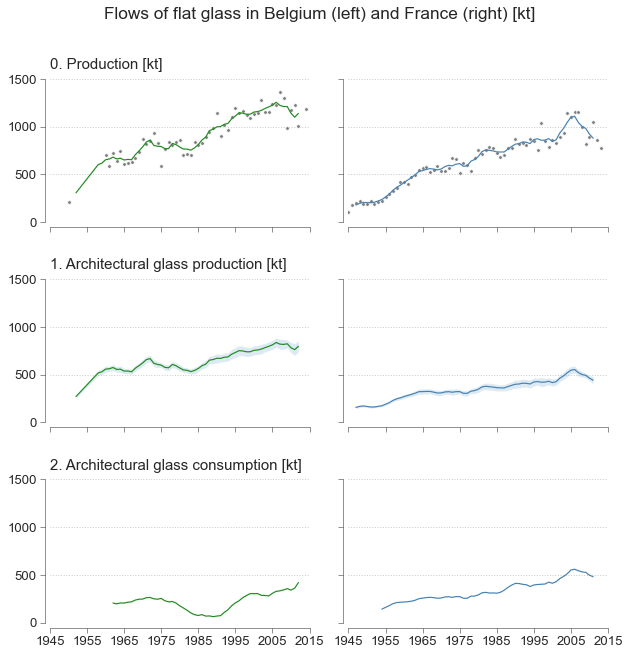

In [85]:
# Plot graphs to summarize main results:
toplot = ['Production',
          'Architectural glass production',
          'Architectural glass consumption']

nrows = len(toplot)
ncols = len(countries)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         sharex=True, sharey=True,
                         figsize=(10, 10))

for row, plot in enumerate(toplot):
    for col, country in enumerate(countries):
        ax = axes[row][col]
        # Define the color and title for the subplots:
        if country == 'Belgium':
            color = 'forestgreen'
            ax.set_title(f"{row}. {plot} [kt]", pad=10, loc='left')
            if plot == 'Architectural glass production':
                ax.fill_between(x, ymin_be, ymax_be, alpha=0.15)
        else:
            color = 'steelblue'
            if plot == 'Architectural glass production':
                ax.fill_between(x, ymin_fr, ymax_fr, alpha=0.15)

        # Plot the 5-year rolled data:
        (df_be_fr[(f"{plot} [kt]", country)]
         .interpolate(method="linear", limit_area='inside')
         .rolling(5, center=True).mean()
         .plot(ax=ax, c=color)
         )
        ax.minorticks_off()
        ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
        style_ax(ax)

        # Plot data gathered from literature review:
        if row == 0:
            sns.scatterplot(data=df_be_fr['Production [kt]'][country],
                            marker='.', s=50, color='grey',
                            ax=ax)
            ax.set_ylabel(None)
            ax.get_legend().remove()

ax.set_ylim(0, 1500)
ax.set_xlim(1945, 2015)

plt.xticks(np.arange(1945, 2016, 10))

fig.suptitle("Flows of flat glass in Belgium (left) and France (right) [kt]")
fig.subplots_adjust(wspace=0.15, hspace=0.4)

sns.despine(offset=5)
plt.show()

if export:
    # Save image:
    fig.savefig(os.path.join(path_img, 'Fig3_BE-FR_FlatGlassFlows.png'),
                dpi=600, bbox_inches='tight')
    fig.savefig(os.path.join(path_img, 'Fig3_BE-FR_FlatGlassFlows.pdf'),
                bbox_inches='tight')

# Material, Energy and Carbon Intensity in the Flat Glass Industry

## Material Intensity since 1945, France

In [86]:
# Creating a DataFrame for material intensity:
df_rawmat = fr_data.parse('RawMat_Intensity').set_index('year')

In [87]:
df_rawmat['cullet, kg/kg'] = (df_rawmat['internal cullet, kg/kg']
                              + df_rawmat['external cullet, kg/kg'])

In [88]:
materials = ['sand', 'cullet', 'sodium carbonate',
             'limestone', 'dolomite', 'feldspar']

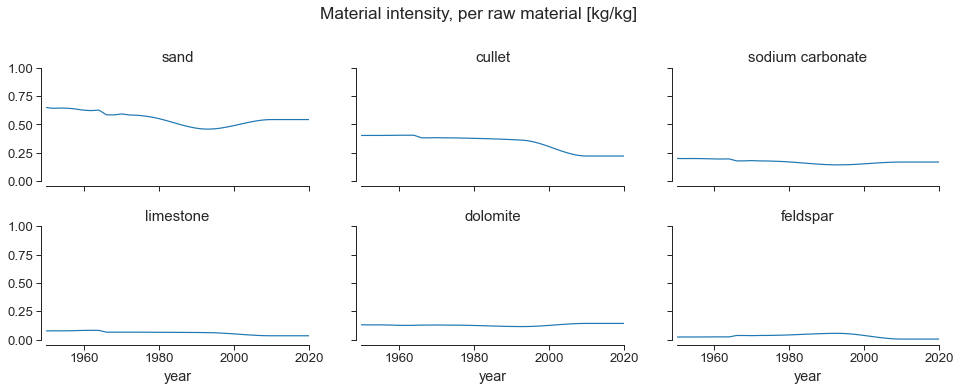

In [89]:
fig, axes = plt.subplots(nrows=2, ncols=3,
                         sharex=True, sharey=True,
                         figsize=(16, 5))

for i, (ax, mat) in enumerate(zip(axes.flatten(), materials)):
    ax.set_title(mat)
    (df_rawmat[f"{mat}, kg/kg"]
     .interpolate(method='pchip', limit_direction='forward')
     .plot(ax=ax)
     )

ax.set_xlim(1950, 2020)
ax.set_ylim(0, 1)

fig.suptitle("Material intensity, per raw material [kg/kg]", y=1.05)
fig.subplots_adjust(hspace=0.4)

sns.despine(offset=5)
plt.show()

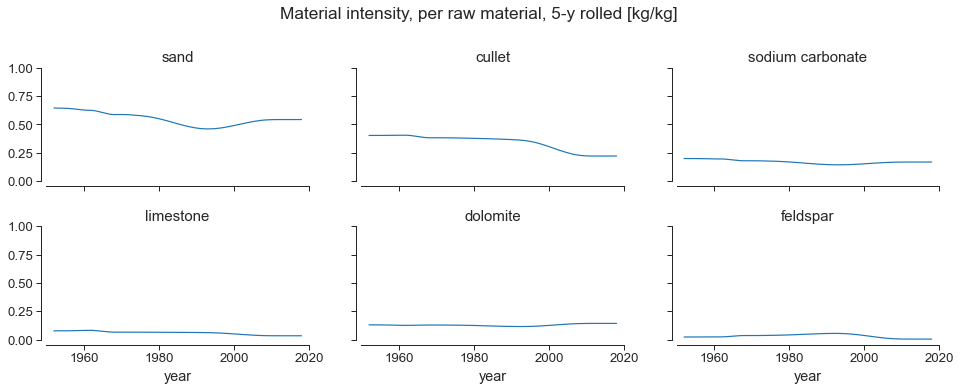

In [90]:
fig, axes = plt.subplots(nrows=2, ncols=3,
                         sharex=True, sharey=True,
                         figsize=(16, 5))

for i, (ax, mat) in enumerate(zip(axes.flatten(), materials)):
    ax.set_title(mat)
    (df_rawmat[f"{mat}, kg/kg"]
     .interpolate(method='pchip', limit_direction='forward')
     .rolling(5, center=True).mean()
     .plot(ax=ax))

ax.set_xlim(1950, 2020)
ax.set_ylim(0, 1)

fig.suptitle("Material intensity, per raw material, 5-y rolled [kg/kg]",
             y=1.05)
fig.subplots_adjust(hspace=0.4)

sns.despine(offset=5)
plt.show()

In [91]:
# Estimate the material intensity (sum of the intenisities per material):
df_rawmat['Total raw materials, kg/kg'] = 0

for mat in materials:
    df_rawmat['Total raw materials, kg/kg'] = (
        df_rawmat[f"{mat}, kg/kg"]
        + df_rawmat['Total raw materials, kg/kg']
    )

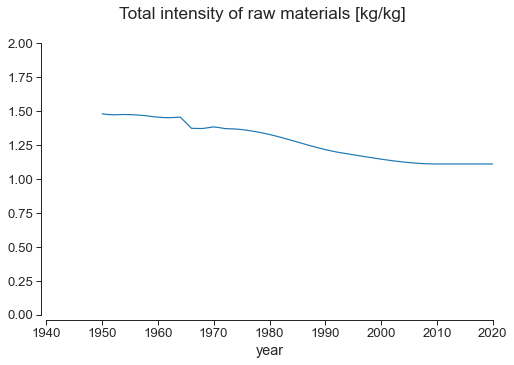

In [92]:
# Plot the material intensity:
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(data=df_rawmat,
             x=df_rawmat.index,
             y=(df_rawmat['Total raw materials, kg/kg']
                .interpolate(method='pchip', limit_direction='forward')),
             ax=ax)

ax.yaxis.label.set_visible(False)
ax.set_xlim(1940, 2020)
ax.set_ylim(0, 2)

fig.suptitle("Total intensity of raw materials [kg/kg]")

sns.despine(offset=5)
plt.show()

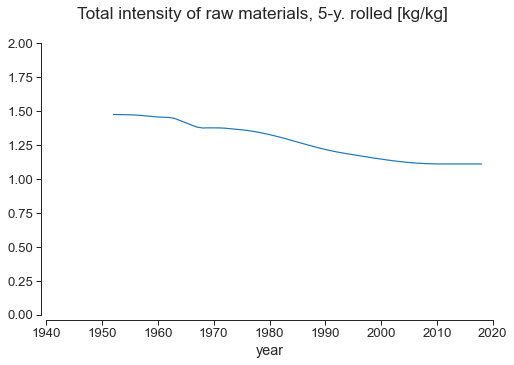

In [93]:
# Plot a 5-y rolled material intensity:
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(data=df_rawmat,
             x=df_rawmat.index,
             y=(df_rawmat['Total raw materials, kg/kg']
                .interpolate(method='pchip', limit_direction='forward')
                 .rolling(5, center=True).mean()),
             ax=ax)

ax.yaxis.label.set_visible(False)
ax.set_xlim(1940, 2020)
ax.set_ylim(0, 2)

fig.suptitle("Total intensity of raw materials, 5-y. rolled [kg/kg]")

sns.despine(offset=5)
plt.show()

In [94]:
matwocullet = ['sand', 'sodium carbonate', 'limestone',
               'dolomite', 'feldspar']

In [95]:
# Estimate the material intensity without cullet:
df_rawmat['Total raw mat w/o cullet, kg/kg'] = 0

for mat in matwocullet:
    df_rawmat['Total raw mat w/o cullet, kg/kg'] = (
        df_rawmat[f"{mat}, kg/kg"]
        + df_rawmat['Total raw mat w/o cullet, kg/kg']
    )

In [96]:
# Alternatively:
df_rawmat['Total raw mat w/o cullet, kg/kg'] = df_rawmat[[
    f"{mat}, kg/kg" for mat in matwocullet]].dropna(how='any', axis=0).sum(axis=1)

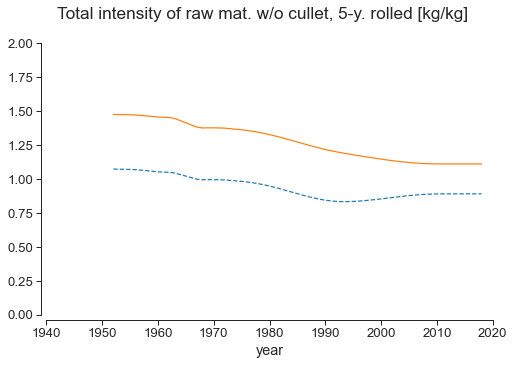

In [97]:
# Plot a 5-y rolled material intensity:
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(data=df_rawmat,
             x=df_rawmat.index,
             y=(df_rawmat['Total raw mat w/o cullet, kg/kg']
                .interpolate(method='pchip', limit_direction='forward')
                 .rolling(5, center=True).mean()),
             ax=ax, linestyle='--')

sns.lineplot(data=df_rawmat,
             x=df_rawmat.index,
             y=(df_rawmat['Total raw materials, kg/kg']
                .interpolate(method='pchip', limit_direction='forward')
                 .rolling(5, center=True).mean()),
             ax=ax)

ax.yaxis.label.set_visible(False)
ax.set_xlim(1940, 2020)
ax.set_ylim(0, 2)

fig.suptitle("Total intensity of raw mat. w/o cullet, 5-y. rolled [kg/kg]")

sns.despine(offset=5)
plt.show()

## Energy Intensity since 1945, France and Belgium

In [98]:
# Create a DataFrame for the energy intensity in France:
df_fr_energy = fr_data.parse('Energy_Intensity').set_index('year')

df_be_energy = be_data.parse('Energy_Intensity').set_index('year')

In [99]:
# Create a unique DataFrame for FR and BE flat glass flows:
df_be_fr_energy = pd.concat(
    [df_fr_energy['fuel oil, GJ/t'],
     df_be_energy['fuel oil, GJ/t'],
     df_fr_energy['natural gas, GJ/t'],
     df_be_energy['natural gas, GJ/t'],
     df_fr_energy['electricity, GJ/t'],
     df_be_energy['electricity, GJ/t']],
    axis=1, keys=[('fuel oil, GJ/t', 'France'),
                  ('fuel oil, GJ/t', 'Belgium'),
                  ('natural gas, GJ/t', 'France'),
                  ('natural gas, GJ/t', 'Belgium'),
                  ('electricity, GJ/t', 'France'),
                  ('electricity, GJ/t', 'Belgium')],
    names=['Info', 'Country']
).stack(dropna=False)

df_be_fr_energy = df_be_fr_energy.unstack()

In [100]:
energies = ['fuel oil', 'natural gas', 'electricity']

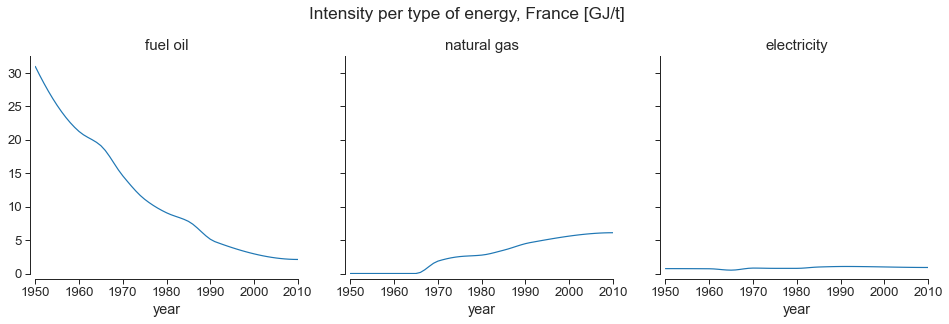

In [101]:
# Plot the intensity per type of energy, France:
fig, axes = plt.subplots(nrows=1, ncols=3,
                         sharex=True, sharey=True,
                         figsize=(16, 4))

for i, (ax, energy) in enumerate(zip(axes.flatten(), energies)):
    ax.set_title(energy)
    (df_be_fr_energy[(f"{energy}, GJ/t", "France")]  # Interpolate:
     .interpolate(method='pchip', limit_direction='forward')
     .plot(ax=ax))

ax.set_xlim(1950, 2010)
ax.set_ylim(ymin=0)

fig.suptitle("Intensity per type of energy, France [GJ/t]", y=1.05)

sns.despine(offset=5)
plt.show()

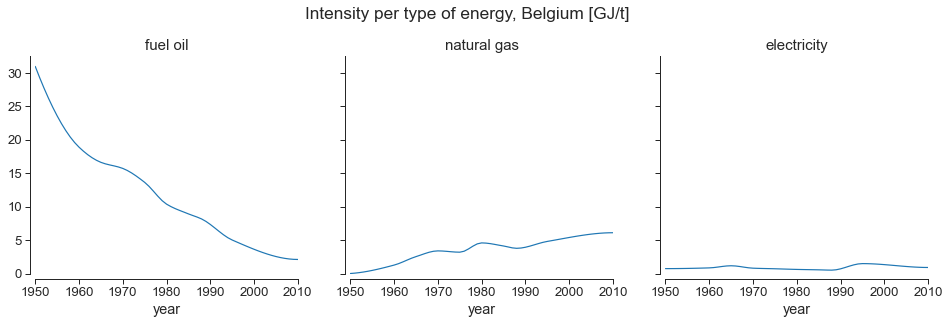

In [102]:
# Plot the intensity per type of energy, Belgium:
fig, axes = plt.subplots(nrows=1, ncols=3,
                         sharex=True, sharey=True,
                         figsize=(16, 4))

for i, (ax, energy) in enumerate(zip(axes.flatten(), energies)):
    ax.set_title(energy)
    (df_be_fr_energy[(f"{energy}, GJ/t", "Belgium")]  # Interpolate:
     .interpolate(method='pchip', limit_direction='forward')
     .plot(ax=ax))

ax.set_xlim(1950, 2010)
ax.set_ylim(ymin=0)

fig.suptitle("Intensity per type of energy, Belgium [GJ/t]", y=1.05)

sns.despine(offset=5)
plt.show()

In [103]:
# Estimate the total energy intensity
# (sum of the intensities per type of energy):
for country in countries:
    df_be_fr_energy[('Total energy, GJ/t', country)] = 0
    for energy in energies:
        df_be_fr_energy[('Total energy, GJ/t', country)] = (
            df_be_fr_energy[('Total energy, GJ/t', country)]
            + df_be_fr_energy[(f"{energy}, GJ/t", country)]
        )

In [104]:
fossilfuels = ['fuel oil', 'natural gas']

In [105]:
# Estimate the total energy intensity
# (without electricity)
for country in countries:
    df_be_fr_energy[('Total energy w/o elec., GJ/t', country)] = 0
    for energy in fossilfuels:
        df_be_fr_energy[('Total energy w/o elec., GJ/t', country)] = (
            df_be_fr_energy[(
                'Total energy w/o elec., GJ/t', country)]
            + df_be_fr_energy[(f"{energy}, GJ/t", country)]
        )

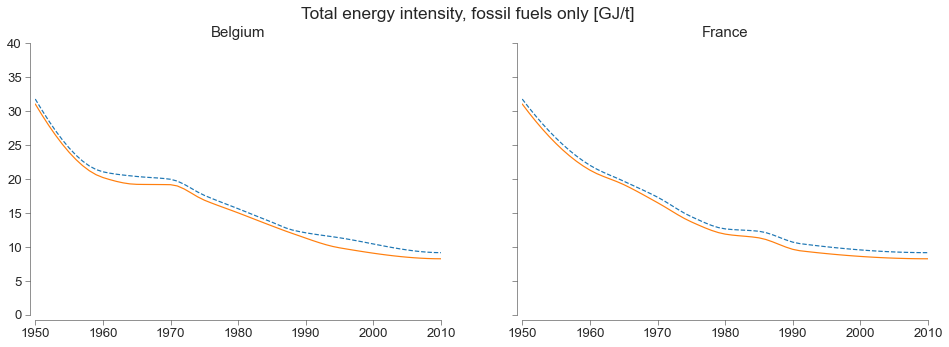

In [106]:
# Plot the total energy intensity:
fig, axes = plt.subplots(nrows=1, ncols=2,
                         sharex=True, sharey=True,
                         figsize=(16, 5))

for i, (ax, country) in enumerate(zip(axes.flatten(), countries)):
    sns.lineplot(data=df_be_fr_energy,
                 x=df_be_fr_energy.index,
                 y=(df_be_fr_energy[('Total energy, GJ/t', country)]
                    .interpolate(method='pchip', limit_direction='forward')),
                 ax=ax, linestyle='--')

    sns.lineplot(data=df_be_fr_energy,
                 x=df_be_fr_energy.index,
                 y=(df_be_fr_energy[('Total energy w/o elec., GJ/t',
                                     country)]
                    .interpolate(method='pchip', limit_direction='forward')),
                 ax=ax)

    ax.set_xlim(1950, 2010)
    ax.set_ylim(0, 40)
    ax.set_title(country)
    ax.yaxis.label.set_visible(False)
    style_ax(ax)


fig.suptitle("Total energy intensity, fossil fuels only [GJ/t]")

sns.despine(offset=5)
plt.show()

In [107]:
# Estimate energy intensity according to ratios:
for energy in energies:
    for country in countries:
        df_be_fr_energy[(f"{energy}, %", country)] = (
            (df_be_fr_energy[(f"{energy}, GJ/t", country)]
             .interpolate(method='pchip', limit_direction='forward'))
            / (df_be_fr_energy[('Total energy, GJ/t', country)]
               .interpolate(method='pchip', limit_direction='forward'))
        )

In [108]:
df_be_fr_energy

Info    electricity, GJ/t        fuel oil, GJ/t        natural gas, GJ/t  \
Country           Belgium France        Belgium France           Belgium   
year                                                                       
1945                  NaN    NaN            NaN    NaN               NaN   
1946                  NaN    NaN            NaN    NaN               NaN   
1947                  NaN    NaN            NaN    NaN               NaN   
1948                  NaN    NaN            NaN    NaN               NaN   
1949                  NaN    NaN            NaN    NaN               NaN   
...                   ...    ...            ...    ...               ...   
2016                  NaN    NaN            NaN    NaN               NaN   
2017                  NaN    NaN            NaN    NaN               NaN   
2018                  NaN    NaN            NaN    NaN               NaN   
2019                  0.9    0.9            2.1    2.1               6.1   
2020                  NaN    NaN            NaN    NaN               NaN   

Info           Total energy, GJ/t        Total energy w/o elec., GJ/t         \
Country France            Belgium France                      Belgium France   
year                                                                           
1945       NaN                NaN    NaN                          NaN    NaN   
1946       NaN                NaN    NaN                          NaN    NaN   
1947       NaN                NaN    NaN                          NaN    NaN   
1948       NaN                NaN    NaN                          NaN    NaN   
1949       NaN                NaN    NaN                          NaN    NaN   
...        ...                ...    ...                          ...    ...   
2016       NaN                NaN    NaN                          NaN    NaN   
2017       NaN                NaN    NaN                          NaN    NaN   
2018       NaN                NaN    NaN                          NaN    NaN   
2019       6.1                9.1    9.1                          8.2    8.2   
2020       NaN                NaN    NaN                          NaN    NaN   

Info    fuel oil, %        natural gas, %        electricity, %         
Country     Belgium France        Belgium France        Belgium France  
year                                                                    
1945            NaN    NaN            NaN    NaN            NaN    NaN  
1946            NaN    NaN            NaN    NaN            NaN    NaN  
1947            NaN    NaN            NaN    NaN            NaN    NaN  
1948            NaN    NaN            NaN    NaN            NaN    NaN  
1949            NaN    NaN            NaN    NaN            NaN    NaN  
...             ...    ...            ...    ...            ...    ...  
2016           0.23   0.23           0.67   0.67            0.1    0.1  
2017           0.23   0.23           0.67   0.67            0.1    0.1  
2018           0.23   0.23           0.67   0.67            0.1    0.1  
2019           0.23   0.23           0.67   0.67            0.1    0.1  
2020           0.23   0.23           0.67   0.67            0.1    0.1  

[76 rows x 16 columns]

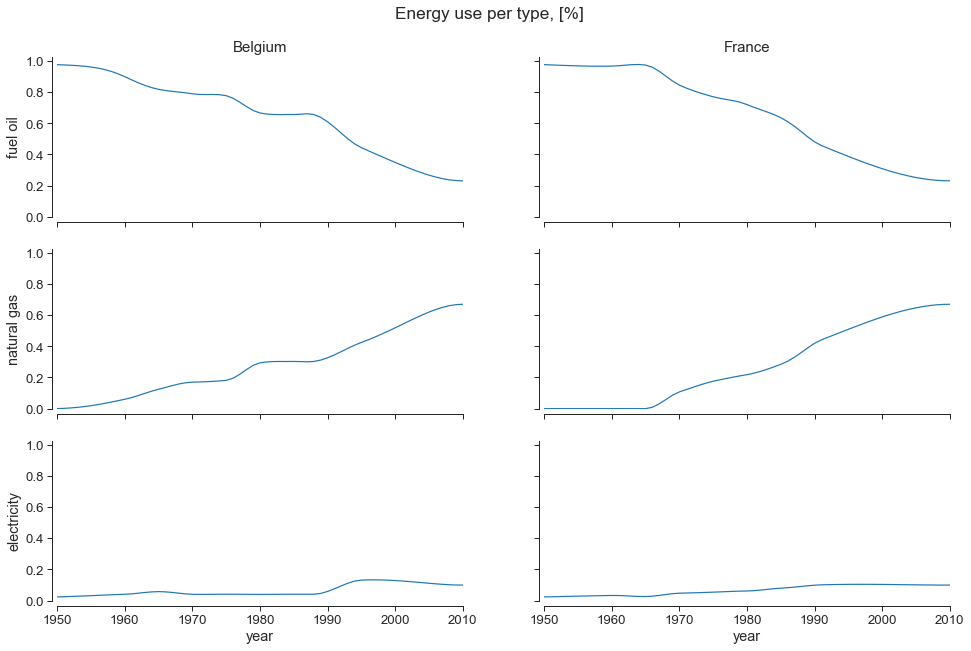

In [109]:
# Plot energy intensity per type of energy and in percent:
fig, axes = plt.subplots(nrows=3, ncols=2,
                         sharex=True, sharey=True,
                         figsize=(16, 10))

for row, energy in enumerate(energies):
    for col, country in enumerate(countries):
        ax = axes[row][col]
        df_be_fr_energy[(f"{energy}, %", country)].plot(ax=ax)

        if row == 0:
            ax.set_title(country)
        if col == 0:
            ax.set_ylabel(energy)

ax.set_xlim(1950, 2010)
ax.set_ylim(ymin=0)

fig.suptitle("Energy use per type, [%]", y=0.95)

sns.despine(offset=5)
plt.show()

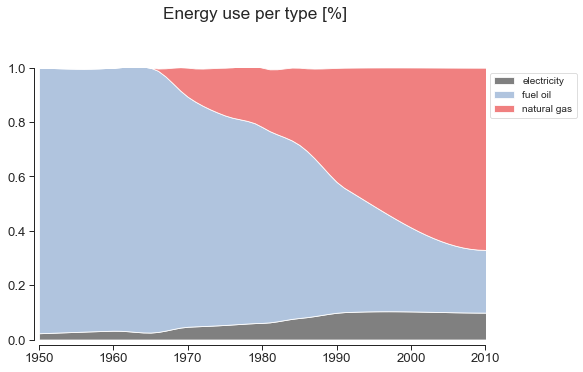

In [110]:
# Plot energy intensity per type of energy and in percent:
fig, ax = plt.subplots(figsize=(8, 5))

y = np.array([df_be_fr_energy[('electricity, %', 'France')].dropna(),
              df_be_fr_energy[('fuel oil, %', 'France')].dropna(),
              df_be_fr_energy[('natural gas, %', 'France')].dropna()])

x = range(1950, 2021)

plt.stackplot(x, y,
              labels=['electricity', 'fuel oil', 'natural gas'],
              colors=["grey", "lightsteelblue", "lightcoral"])
plt.legend(loc='upper left')

ax.set_xlim(1950, 2010)
ax.set_ylim(0, 1)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

fig.suptitle("Energy use per type [%]", y=1.05)

sns.despine(offset=5)
plt.show()

## Energy Intensity in the EU since 1970

In [111]:
# Create a DataFrame for the energy intensity in the EU:
df_eu_energy = eu_data.parse('Energy_Intensity').set_index('year')

In [112]:
energies = ['fuel oil', 'natural gas', 'electricity']

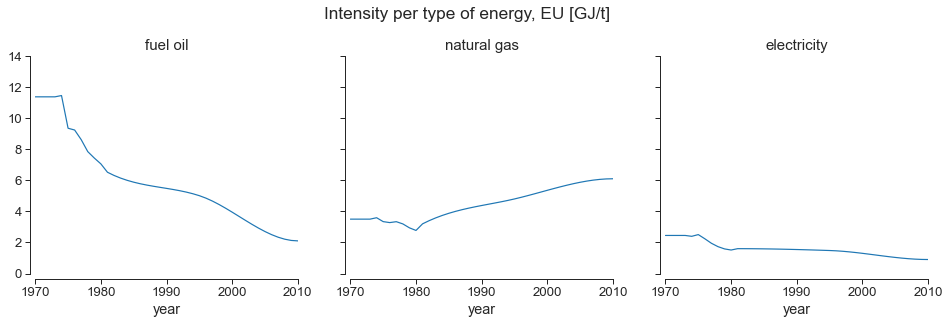

In [113]:
# Plot the intensity per type of energy:
fig, axes = plt.subplots(nrows=1, ncols=3,
                         sharex=True, sharey=True,
                         figsize=(16, 4))

for i, (ax, energy) in enumerate(zip(axes.flatten(), energies)):
    ax.set_title(energy)
    (df_eu_energy[f"{energy}, GJ/t"]  # Interpolate:
     .interpolate(method='pchip', limit_direction='forward')
     .plot(ax=ax))

ax.set_xlim(1970, 2010)
ax.set_ylim(0, 14)

fig.suptitle("Intensity per type of energy, EU [GJ/t]", y=1.05)

sns.despine(offset=5)
plt.show()

In [114]:
# Estimate the total energy intensity
# (sum of the intensities per type of energy)
# In Europe:
df_eu_energy['Total energy, GJ/t'] = 0

for energy in energies:
    df_eu_energy['Total energy, GJ/t'] = (
        df_eu_energy['Total energy, GJ/t']
        + df_eu_energy[f"{energy}, GJ/t"]
    )

In [115]:
fossilfuels = ['fuel oil', 'natural gas']

In [116]:
# Estimate the total energy intensity
# (without electricity)
df_eu_energy['Total energy w/o elec., GJ/t'] = 0

for energy in fossilfuels:
    df_eu_energy['Total energy w/o elec., GJ/t'] = (
        df_eu_energy['Total energy w/o elec., GJ/t']
        + df_eu_energy[f"{energy}, GJ/t"]
    )

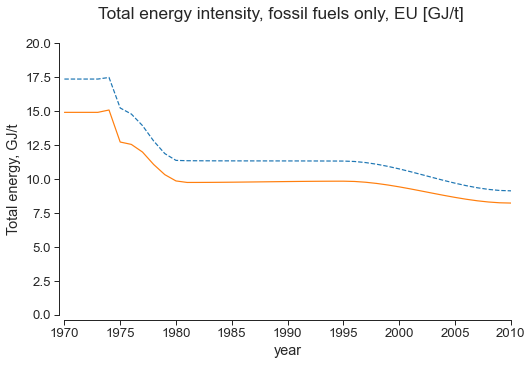

In [117]:
# Plot the total energy intensity:
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(data=df_eu_energy,
             x=df_eu_energy.index,
             y=(df_eu_energy['Total energy, GJ/t']
                .interpolate(method='pchip', limit_direction='forward')),
             ax=ax, linestyle='--')

sns.lineplot(data=df_eu_energy,
             x=df_eu_energy.index,
             y=(df_eu_energy['Total energy w/o elec., GJ/t']
                .interpolate(method='pchip', limit_direction='forward')),
             ax=ax)

ax.set_xlim(1970, 2010)
ax.set_ylim(0, 20)

fig.suptitle("Total energy intensity, fossil fuels only, EU [GJ/t]")

sns.despine(offset=5)  # , left=True, bottom=True)
plt.show()

In [118]:
# Estimate energy intensity according to ratios:
for energy in energies:
    df_eu_energy[f"{energy}, %"] = (
        (df_eu_energy[(f"{energy}, GJ/t")]
         .interpolate(method='pchip', limit_direction='forward'))
        / (df_eu_energy['Total energy, GJ/t']
           .interpolate(method='pchip', limit_direction='forward'))
    )

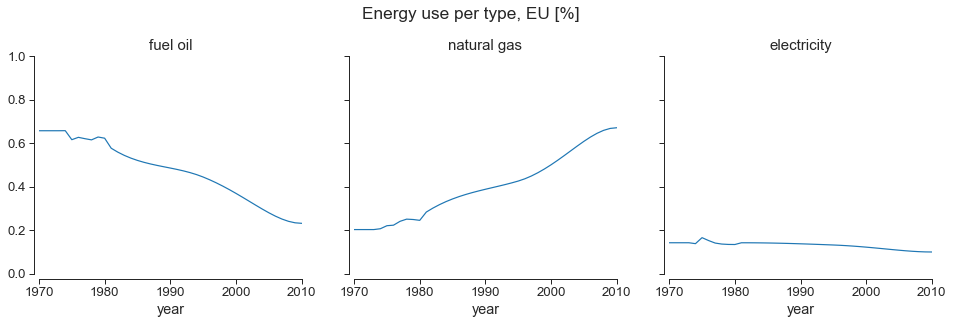

In [119]:
# Plot energy intensity per type of energy and in percent:
fig, axes = plt.subplots(nrows=1, ncols=3,
                         sharex=True, sharey=True,
                         figsize=(16, 4))

for i, (ax, energy) in enumerate(zip(axes.flatten(), energies)):
    ax.set_title(energy)
    df_eu_energy[f"{energy}, %"].plot(ax=ax)

ax.set_xlim(1970, 2010)
ax.set_ylim(0, 1)

fig.suptitle("Energy use per type, EU [%]", y=1.05)

sns.despine(offset=5)
plt.show()

## Carbon Intensity of the Flat Glass Manufacturing Process in France

In [120]:
# Create a DataFrame only with the CO2 emission data:
fr_emissions = fr_data.parse('emissions').set_index('year')

fr_co2_intensity = fr_emissions[['CO2 glass ind, kg/t']].copy()
fr_co2_intensity.rename(columns={'CO2 glass ind, kg/t': 'CO2 [kg/t]'},
                        inplace=True)

fr_co2_intensity.dropna()

,CO2 [kg/t]
year,
1947,2970.0
1950,2950.0
1960,2055.0
1965,1815.0
1970,1595.0
1975,1280.0
1980,1070.0
1985,950.0
1990,820.0


In [121]:
# Interpolate CO2 intensity accoring to a pchip method:
fr_co2_intensity['CO2 interpolated [kg/t]'] = (
    fr_co2_intensity['CO2 [kg/t]'].interpolate('pchip')
)

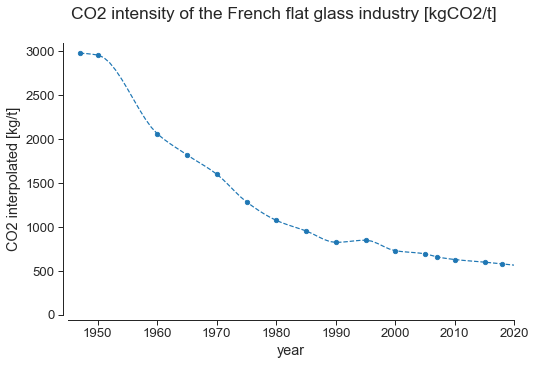

In [122]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(data=fr_co2_intensity['CO2 interpolated [kg/t]'])

ax.lines[0].set_linestyle("--")

ax.scatter(x=fr_co2_intensity.index, y=fr_co2_intensity['CO2 [kg/t]'],
           s=20)

ax.set_xlim(1945, 2020)
ax.set_ylim(ymin=0)
fig.suptitle("CO2 intensity of the French flat glass industry [kgCO2/t]")
sns.despine(offset=5)
plt.show()

## Carbon Intensity of the Flat Glass Manufacturing Process in the EU

In [123]:
# Create a DataFrame only with the CO2 emission data:
df_eu_emissions = eu_data.parse('emissions').set_index('year')

df_eu_co2 = df_eu_emissions[['CO2 glass ind, kg/t']].copy()
df_eu_co2.rename(columns={'CO2 glass ind, kg/t': 'CO2 [kg/t]'},
                 inplace=True)

df_eu_co2.dropna()

,CO2 [kg/t]
year,
1970,1605.74
1975,1364.88
1980,1204.38
1985,1083.90
1990,1043.78
1991,1012.47
1992,986.35
1993,960.22
1994,929.03


In [124]:
# Interpolate CO2 intensity accoring to a pchip method:
df_eu_co2['CO2 interpolated [kg/t]'] = (
    df_eu_co2['CO2 [kg/t]'].interpolate('pchip')
)

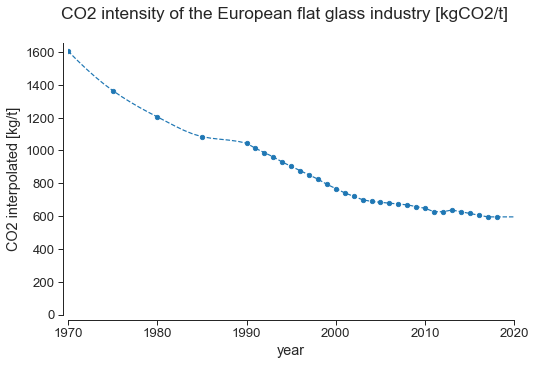

In [125]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(data=df_eu_co2['CO2 interpolated [kg/t]'])

ax.lines[0].set_linestyle("--")

ax.scatter(x=df_eu_co2.index, y=df_eu_co2['CO2 [kg/t]'],
           s=20)

ax.set_xlim(1970, 2020)
ax.set_ylim(ymin=0)
fig.suptitle("CO2 intensity of the European flat glass industry [kgCO2/t]")
sns.despine(offset=5)
plt.show()

## Summary

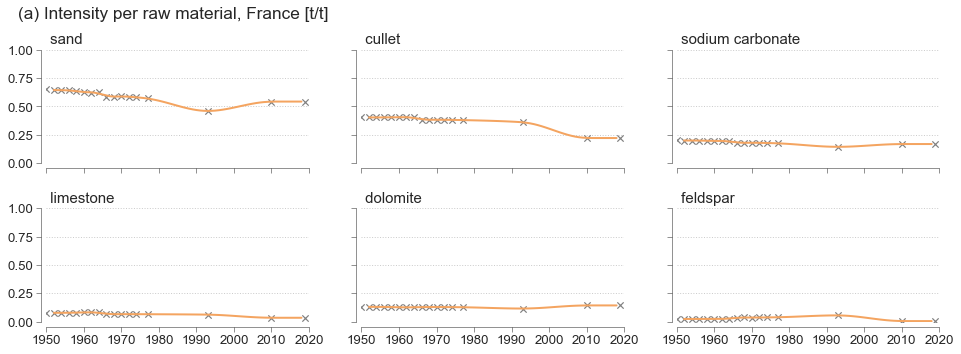

In [126]:
# Plot the material instensity per raw material:
fig, axes = plt.subplots(nrows=2, ncols=3,
                         sharex=True, sharey=True,
                         figsize=(16, 5))

for i, (ax, mat) in enumerate(zip(axes.flatten(), materials)):
    (df_rawmat[f"{mat}, kg/kg"]
     .interpolate(method='pchip', limit_direction='forward')
     .rolling(5, center=True).mean()
     .plot(ax=ax, c='sandybrown', linewidth=2))

    ax.scatter(x=df_rawmat.index, y=df_rawmat[f"{mat}, kg/kg"],
               s=40, marker='x', c='grey')
    plt.xticks(np.arange(1950, 2021, 10), rotation=45)

    ax.set_title(f" {mat}", loc='left')
    ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
    style_ax(ax)

ax.set_xlim(1950, 2020)
ax.set_ylim(0, 1)

ax.minorticks_off()
plt.xticks(np.arange(1950, 2021, 10))

fig.suptitle(
    "(a) Intensity per raw material, France [t/t]", x=0.1, y=1, ha='left')

fig.subplots_adjust(wspace=0.2, hspace=0.4)

sns.despine(offset=5)

if export:
    # Save image:
    fig.savefig(os.path.join(path_img, 'Fig4_FR_MatIntensity.png'),
                dpi=600, bbox_inches='tight')
    fig.savefig(os.path.join(path_img, 'Fig4_FR_MatIntensity.pdf'),
                bbox_inches='tight')

plt.show()

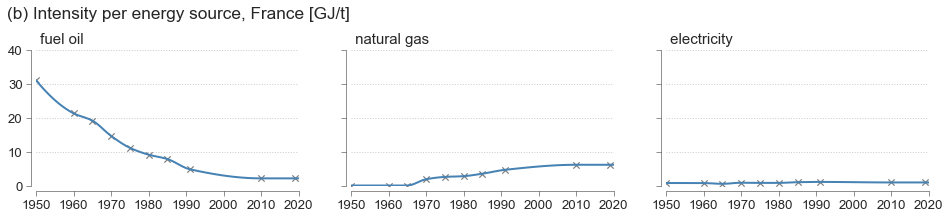

In [127]:
# Plot the energy intensity per source of energy, France:
fig, axes = plt.subplots(nrows=1, ncols=3,
                         sharex=True, sharey=True,
                         figsize=(16, 2.5)
                         )

for i, (ax, energy) in enumerate(zip(axes.flatten(), energies)):
    (df_be_fr_energy[(f"{energy}, GJ/t", "France")]
     .interpolate(method='pchip', limit_direction='forward')
     .plot(ax=ax, color='steelblue', linewidth=2))

    ax.scatter(x=df_be_fr_energy.index,
               y=df_be_fr_energy[(f"{energy}, GJ/t", "France")],
               s=40, marker='x', c='grey')

    ax.set_title(f" {energy}", loc='left')
    ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
    style_ax(ax)

ax.set_xlim(1950, 2020)
ax.set_ylim(0, 40)

fig.suptitle("(b) Intensity per energy source, France [GJ/t]",
             x=0.1, y=1.12, ha='left')
fig.subplots_adjust(wspace=0.2)

ax.minorticks_off()
plt.xticks(np.arange(1950, 2021, 10))

sns.despine(offset=5)

if export:
    # Save image:
    fig.savefig(os.path.join(path_img, 'Fig4_FR_EnergyIntensity.png'),
                dpi=600, bbox_inches='tight')
    fig.savefig(os.path.join(path_img, 'Fig4_FR_EnergyIntensity.pdf'),
                bbox_inches='tight')

plt.show()

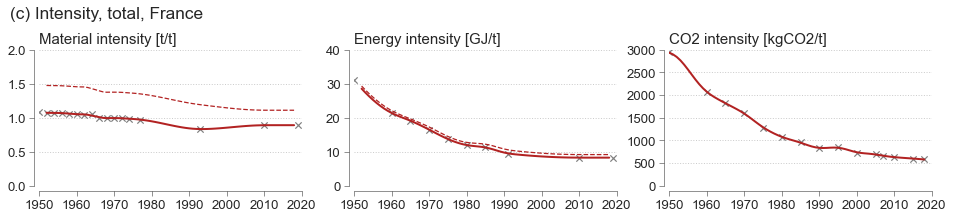

In [128]:
# Plot the intensity for energy, material and CO2 emissions:
fig, axes = plt.subplots(nrows=1, ncols=3,
                         sharex=True,
                         figsize=(16, 2.5))

# Material intensity
ax = axes[0]
(df_rawmat['Total raw materials, kg/kg']
 .interpolate(method='pchip', limit_direction='forward')
 .rolling(5, center=True).mean()
 .plot(ax=ax, c='firebrick', linestyle='--', linewidth=1.25)
 )

(df_rawmat['Total raw mat w/o cullet, kg/kg']
 .interpolate(method='pchip', limit_direction='forward')
 .rolling(5, center=True).mean()
 .plot(ax=ax, c='firebrick', linestyle='-', linewidth=2)
 )

ax.scatter(x=df_rawmat.index,
           y=df_rawmat['Total raw mat w/o cullet, kg/kg'],
           s=40, marker='x', c='grey')

ax.set_title("Material intensity [t/t]", loc='left')
ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
style_ax(ax)
ax.set_ylim(0, 2)
ax.set_xlim(1950, 2020)

# Energy intensity
ax = axes[1]
(df_be_fr_energy[('Total energy, GJ/t', 'France')]
 .interpolate(method='pchip', limit_direction='forward')
 .rolling(5, center=True).mean()
 .plot(ax=ax, c='firebrick', linestyle='--', linewidth=1.25))

(df_be_fr_energy[('Total energy w/o elec., GJ/t', 'France')]
 .interpolate(method='pchip', limit_direction='forward')
 .rolling(5, center=True).mean()
 .plot(ax=ax, c='firebrick', linewidth=2))

ax.scatter(x=df_be_fr_energy.index,
           y=df_be_fr_energy[(
               'Total energy w/o elec., GJ/t', 'France')],
           s=40, marker='x', c='grey')

ax.set_title("Energy intensity [GJ/t]", loc='left')
ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
style_ax(ax)
ax.set_ylim(0, 40)

# Carbon dioxide intensity
ax = axes[2]
(fr_co2_intensity['CO2 interpolated [kg/t]'].rolling(5, center=True).mean()
 .plot(ax=ax, c='firebrick', linewidth=2))

ax.scatter(x=fr_co2_intensity.index, y=fr_co2_intensity['CO2 [kg/t]'],
           s=40, marker='x', c='grey')

ax.set_title("CO2 intensity [kgCO2/t]", loc='left')
ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
style_ax(ax)
ax.set_ylim(0, 3000)

ax.minorticks_off()
plt.xticks(np.arange(1950, 2021, 10))
plt.yticks(np.arange(0, 3001, 500))

fig.suptitle("(c) Intensity, total, France", x=0.1, y=1.12, ha='left')
fig.subplots_adjust(wspace=0.20)

sns.despine(offset=5)

if export:
    # Save image:
    plt.savefig(os.path.join(path_img, 'Fig4_FR_TotalIntensity.png'),
                dpi=600, bbox_inches='tight')
    plt.savefig(os.path.join(path_img, 'Fig4_FR_TotalIntensity.pdf'),
                bbox_inches='tight')

plt.show()

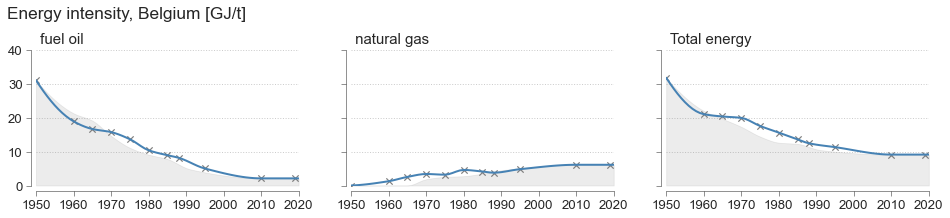

In [129]:
toplot = ['fuel oil', 'natural gas', 'Total energy']

# Plot the energy intensity for Belgium:
fig, axes = plt.subplots(nrows=1, ncols=3,
                         sharex=True, sharey=True,
                         figsize=(16, 2.5)
                         )

for i, (ax, plot) in enumerate(zip(axes.flatten(), toplot)):
    (df_be_fr_energy[(f"{plot}, GJ/t", "Belgium")]
     .interpolate(method='pchip', limit_direction='forward')
     .plot(ax=ax, color='steelblue', linewidth=2))

    ax.scatter(x=df_be_fr_energy.index,
               y=df_be_fr_energy[(f"{plot}, GJ/t", "Belgium")],
               s=40, marker='x', c='grey')

    x = (df_be_fr_energy.reset_index()['year'])
    y = (df_be_fr_energy[(f"{plot}, GJ/t", "France")]
         .interpolate(method='pchip', limit_direction='forward'))
    ax.fill_between(x, y, color="grey", alpha=0.15)

    ax.set_title(f" {plot}", loc='left')
    ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
    style_ax(ax)

ax.set_xlim(1950, 2020)
ax.set_ylim(0, 40)

fig.suptitle("Energy intensity, Belgium [GJ/t]",
             x=0.1, y=1.12, ha='left')
fig.subplots_adjust(wspace=0.2)

ax.minorticks_off()
plt.xticks(np.arange(1950, 2021, 10))

sns.despine(offset=5)

if export:
    # Save image:
    fig.savefig(os.path.join(path_img, 'Fig5_BE_EnergyIntensity.png'),
                dpi=600, bbox_inches='tight')
    fig.savefig(os.path.join(path_img, 'Fig5_BE_EnergyIntensity.pdf'),
                bbox_inches='tight')

plt.show()

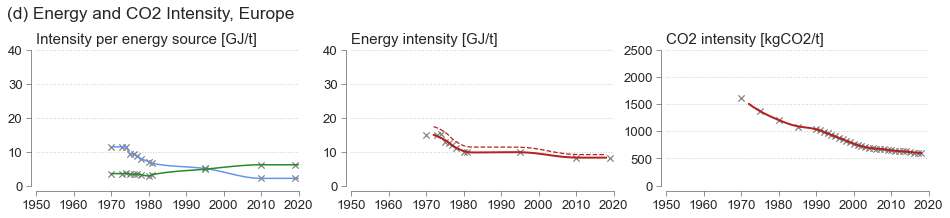

In [130]:
# Plot the intensity for energy, material and CO2 emissions:
fig, axes = plt.subplots(nrows=1, ncols=3,
                         sharex=True,
                         figsize=(16, 2.5))

# Intensity, per energy source
ax = axes[0]
(df_eu_energy["fuel oil, GJ/t"]
 .interpolate(method='pchip', limit_direction='forward')
 .plot(ax=ax, color='cornflowerblue', linestyle='-', linewidth=1.5))

ax.scatter(x=df_eu_energy.index,
           y=df_eu_energy["fuel oil, GJ/t"],
           s=40, marker='x', c='grey')

(df_eu_energy["natural gas, GJ/t"]
 .interpolate(method='pchip', limit_direction='forward')
 .plot(ax=ax, color='forestgreen', linewidth=1.5, linestyle='-'))

ax.scatter(x=df_eu_energy.index,
           y=df_eu_energy["natural gas, GJ/t"],
           s=40, marker='x', c='grey')

ax.set_title("Intensity per energy source [GJ/t]", loc='left')
ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
style_ax(ax)
ax.set_ylim(0, 40)
ax.set_xlim(1950, 2020)

# Energy intensity, total
ax = axes[1]
(df_eu_energy['Total energy, GJ/t']
 .interpolate(method='pchip', limit_direction='forward')
 .rolling(5, center=True).mean()
 .plot(ax=ax, c='firebrick', linestyle='--', linewidth=1.25))

(df_eu_energy['Total energy w/o elec., GJ/t']
 .interpolate(method='pchip', limit_direction='forward')
 .rolling(5, center=True).mean()
 .plot(ax=ax, c='firebrick', linewidth=2))

ax.scatter(x=df_eu_energy.index,
           y=df_eu_energy['Total energy w/o elec., GJ/t'],
           s=40, marker='x', c='grey')

ax.set_title("Energy intensity [GJ/t]", loc='left')
ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
style_ax(ax)
ax.set_ylim(0, 40)

# Carbon dioxide intensity
ax = axes[2]
(df_eu_co2['CO2 interpolated [kg/t]'].rolling(5, center=True).mean()
 .plot(ax=ax, c='firebrick', linewidth=2))

ax.scatter(x=df_eu_co2.index, y=df_eu_co2['CO2 [kg/t]'],
           s=40, marker='x', c='grey')

ax.set_title("CO2 intensity [kgCO2/t]", loc='left')
ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
style_ax(ax)
ax.set_ylim(0, 2500)

ax.minorticks_off()
plt.xticks(np.arange(1950, 2021, 10))

fig.suptitle("(d) Energy and CO2 Intensity, Europe", x=0.1, y=1.12, ha='left')
fig.subplots_adjust(wspace=0.20)

sns.despine(offset=5)

if export:
    # Save image:
    plt.savefig(os.path.join(path_img, 'Fig6_EU_Intensity.png'),
                dpi=600, bbox_inches='tight')
    plt.savefig(os.path.join(path_img, 'Fig6_EU_Intensity.pdf'),
                bbox_inches='tight')

plt.show()

# Raw Material and Energy Use and CO2 Emissions in the European Flat Glass Industry

## Use of Raw Materials in the Production of Flat Glass

In [131]:
# Absolute use of raw materials for fat glass production:
for mat in materials:
    df_eu[f"{mat}, flat glass [kt]"] = (
        df_eu['Production [kt]']
        * (df_rawmat[f"{mat}, kg/kg"]
           .interpolate(method='pchip', limit_direction='forward'))
    )

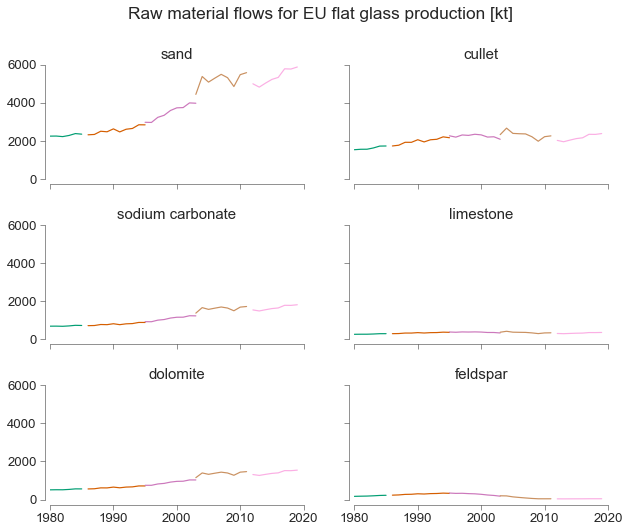

In [132]:
# Plot raw material flows for EU flat glass production
fig, axes = plt.subplots(nrows=3, ncols=2,
                         sharex=True, sharey=True,
                         figsize=(10, 8))

for i, (ax, material) in enumerate(zip(axes.flatten(), materials)):
    sns.lineplot(data=df_eu.reset_index(),
                 x='year', y=f"{material}, flat glass [kt]",
                 hue='Nbr of countries',
                 palette='colorblind',
                 ax=ax)
    ax.set_title(material)
    ax.set_ylabel(None)
    style_ax(ax)
    ax.get_legend().remove()

ax.set_xlim(1980, 2020)
ax.set_ylim(0, 6000)

fig.suptitle("Raw material flows for EU flat glass production [kt]")
fig.subplots_adjust(hspace=0.4)
sns.despine(offset=5)
plt.show()

In [133]:
# Estimate total use of raw materials (sum per material):
df_eu['Total raw materials, flat glass [Mt]'] = 0

for material in materials:
    df_eu['Total raw materials, flat glass [Mt]'] = (
        df_eu[f"{material}, flat glass [kt]"]/1000
        + df_eu['Total raw materials, flat glass [Mt]']
    )

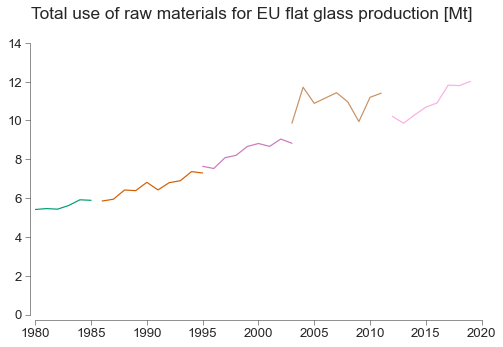

In [134]:
# Plot total material flows for EU flat glass production
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(data=df_eu.reset_index(),
             x='year', y='Total raw materials, flat glass [Mt]',
             hue='Nbr of countries',
             palette='colorblind',
             ax=ax)

ax.set_xlim(1980, 2020)
ax.set_ylabel(None)
style_ax(ax)
ax.set_ylim(0, 14)
ax.get_legend().remove()

fig.suptitle("Total use of raw materials for EU flat glass production [Mt]")
fig.subplots_adjust(hspace=0.4)
sns.despine(offset=5)
plt.show()

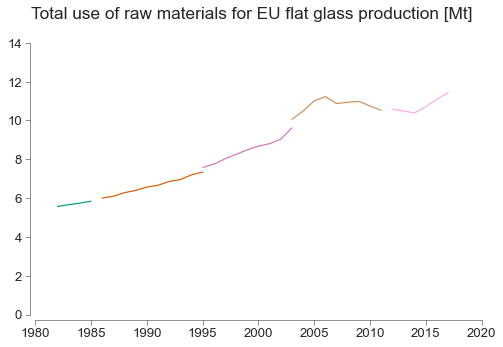

In [135]:
# Plot total material flows for EU flat glass production
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(data=df_eu.rolling(5, center=True).mean().reset_index(),
             x='year', y='Total raw materials, flat glass [Mt]',
             hue='Nbr of countries',
             palette='colorblind',
             ax=ax)

ax.set_xlim(1980, 2020)
ax.set_ylim(0, 14)
ax.get_legend().remove()
ax.set_ylabel(None)
style_ax(ax)

fig.suptitle("Total use of raw materials for EU flat glass production [Mt]")
fig.subplots_adjust(hspace=0.4)
sns.despine(offset=5)
plt.show()

## Energy Use in the Production of Flat Glass

In [136]:
# Absolute use of energy for flat glass production:
for energy in energies:
    df_eu[f"{energy}, flat glass [PJ]"] = (
        df_eu['Production [kt]']
        * (df_eu_energy[f"{energy}, GJ/t"]
           .interpolate(method='pchip', limit_direction='forward'))/1000
    )

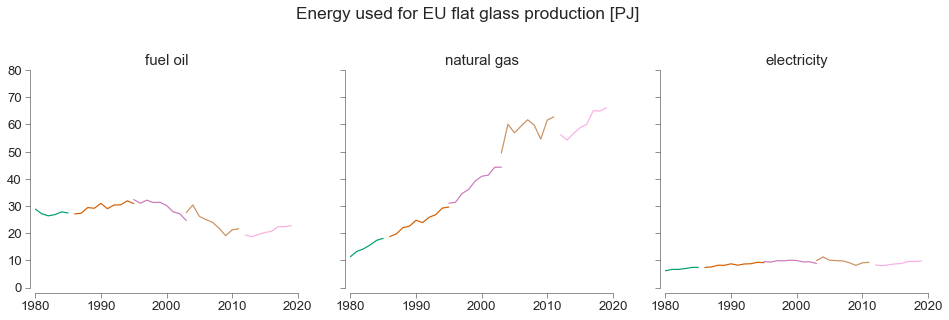

In [137]:
# Plot energy used for EU flat glass production
fig, axes = plt.subplots(nrows=1, ncols=3,
                         sharex=True, sharey=True,
                         figsize=(16, 4))

for i, (ax, energy) in enumerate(zip(axes.flatten(), energies)):
    sns.lineplot(data=df_eu.reset_index(),
                 x='year', y=f"{energy}, flat glass [PJ]",
                 hue='Nbr of countries',
                 palette='colorblind',
                 ax=ax)

    ax.set_title(energy)
    ax.get_legend().remove()
    ax.set_ylabel(None)
    style_ax(ax)

ax.set_xlim(1980, 2020)
ax.set_ylim(0, 80)

fig.suptitle("Energy used for EU flat glass production [PJ]", y=1.1)
fig.subplots_adjust(hspace=0.4)
sns.despine(offset=5)
plt.show()

In [138]:
df_eu['Total energy, flat glass [PJ]'] = 0

for energy in energies:
    df_eu['Total energy, flat glass [PJ]'] = (
        df_eu[f"{energy}, flat glass [PJ]"]
        + df_eu['Total energy, flat glass [PJ]']
    )

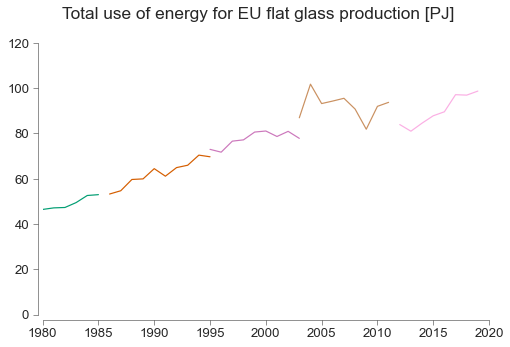

In [139]:
# Plot total energy use for EU flat glass production
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(data=df_eu.reset_index(),
             x='year', y='Total energy, flat glass [PJ]',
             hue='Nbr of countries',
             palette='colorblind',
             ax=ax)

ax.set_xlim(1980, 2020)
ax.set_ylim(0, 120)
ax.get_legend().remove()
ax.set_ylabel(None)
style_ax(ax)

fig.suptitle("Total use of energy for EU flat glass production [PJ]")
fig.subplots_adjust(hspace=0.4)
sns.despine(offset=5)
plt.show()

## Use of Raw Materials in the Production of Architectural Flat Glass

In [140]:
# Absolute use of raw materials for fat glass production:
for mat in materials:
    df_eu[f"{mat}, arch glass [kt]"] = (
        df_eu['Architectural glass production [kt]']
        * (df_rawmat[f"{mat}, kg/kg"]
           .interpolate(method='pchip', limit_direction='forward'))
    )

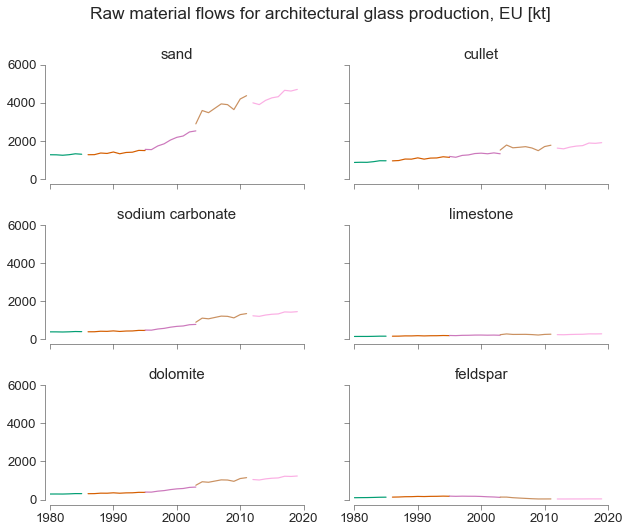

In [141]:
# Plot raw material flows for EU flat glass production
fig, axes = plt.subplots(nrows=3, ncols=2,
                         sharex=True, sharey=True,
                         figsize=(10, 8))

for i, (ax, material) in enumerate(zip(axes.flatten(), materials)):
    sns.lineplot(data=df_eu.reset_index(),
                 x='year', y=f"{material}, arch glass [kt]",
                 hue='Nbr of countries',
                 palette='colorblind',
                 ax=ax)

    ax.set_title(material)
    ax.set_xlim(1980, 2020)
    ax.set_ylim(0, 6000)
    ax.get_legend().remove()
    ax.set_ylabel(None)
    style_ax(ax)

fig.suptitle("Raw material flows for architectural glass production, EU [kt]")
fig.subplots_adjust(hspace=0.4)
sns.despine(offset=5)
plt.show()

In [142]:
df_eu['Total raw materials, arch glass [Mt]'] = 0

for material in materials:
    df_eu['Total raw materials, arch glass [Mt]'] = (
        df_eu[f"{material}, arch glass [kt]"]/1000
        + df_eu['Total raw materials, arch glass [Mt]']
    )

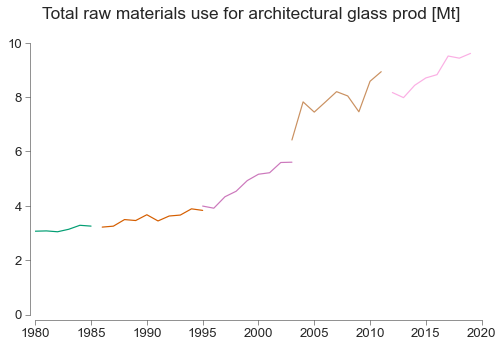

In [143]:
# Plot total material flows for EU architectural glass production
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(data=df_eu.reset_index(),
             x='year', y='Total raw materials, arch glass [Mt]',
             hue='Nbr of countries',
             palette='colorblind',
             ax=ax)

ax.set_xlim(1980, 2020)
ax.set_ylim(0, 10)
ax.get_legend().remove()
ax.set_ylabel(None)
style_ax(ax)

fig.suptitle("Total raw materials use for architectural glass prod [Mt]")
fig.subplots_adjust(hspace=0.4)
sns.despine(offset=5)
plt.show()

## Energy Use in the Production of Architectural Flat Glass

In [144]:
# Absolute use of energy for flat glass production:
for energy in energies:
    df_eu[f"{energy}, arch glass [PJ]"] = (
        df_eu['Architectural glass production [kt]']
        * (df_eu_energy[f"{energy}, GJ/t"]
           .interpolate(method='pchip', limit_direction='forward'))/1000
    )

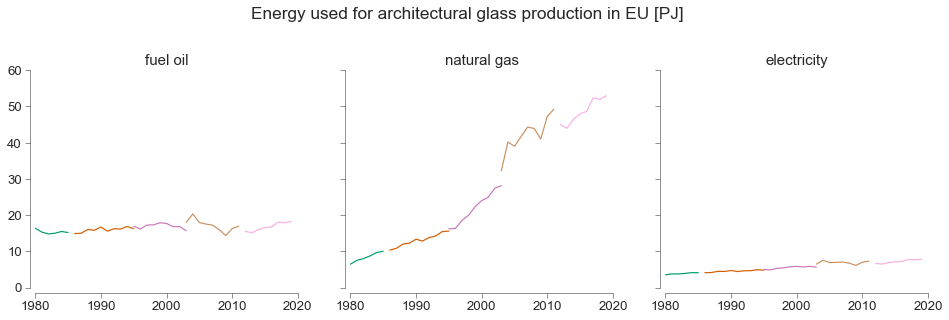

In [145]:
# Plot energy used for EU flat glass production
fig, axes = plt.subplots(nrows=1, ncols=3,
                         sharex=True, sharey=True,
                         figsize=(16, 4))

for i, (ax, energy) in enumerate(zip(axes.flatten(), energies)):
    sns.lineplot(data=df_eu.reset_index(),
                 x='year', y=f"{energy}, arch glass [PJ]",
                 hue='Nbr of countries',
                 palette='colorblind',
                 ax=ax)

    ax.set_title(energy)
    ax.set_xlim(1980, 2020)
    ax.set_ylim(0, 60)
    ax.get_legend().remove()
    ax.set_ylabel(None)
    style_ax(ax)

fig.suptitle("Energy used for architectural glass production in EU [PJ]",
             y=1.1)
fig.subplots_adjust(hspace=0.4)
sns.despine(offset=5)
plt.show()

In [146]:
df_eu['Total energy, arch glass [PJ]'] = 0

for energy in energies:
    df_eu['Total energy, arch glass [PJ]'] = (
        df_eu[f"{energy}, arch glass [PJ]"]
        + df_eu['Total energy, arch glass [PJ]']
    )

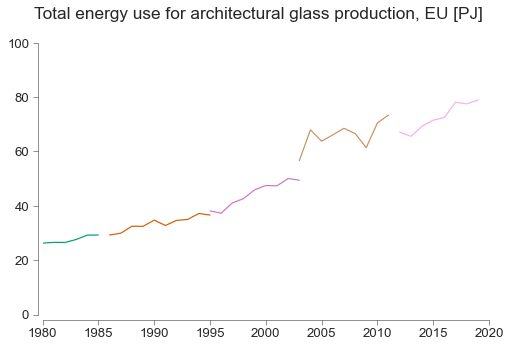

In [147]:
# Plot total energy use for EU flat glass production
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(data=df_eu.reset_index(),
             x='year', y='Total energy, arch glass [PJ]',
             hue='Nbr of countries',
             palette='colorblind',
             ax=ax)

ax.set_xlim(1980, 2020)
ax.set_ylim(0, 100)
ax.get_legend().remove()
ax.set_ylabel(None)
style_ax(ax)

fig.suptitle("Total energy use for architectural glass production, EU [PJ]")
fig.subplots_adjust(hspace=0.4)
sns.despine(offset=5)
plt.show()

## Absolute CO2 Emissions, Europe

In [148]:
# Estimate the CO2 emission related to flat glass production:
df_eu['CO2, flat glass [kt]'] = (
    df_eu['Production [kt]']
    * df_eu_co2['CO2 interpolated [kg/t]'] / 1000
)

In [149]:
# Estimate the CO2 emission related to architectural flat glass production:
df_eu['CO2, architectural glass [kt]'] = (
    df_eu['Architectural glass production [kt]']
    * df_eu_co2['CO2 interpolated [kg/t]'] / 1000
)

In [150]:
CO2_G = ['CO2, flat glass [kt]', 'CO2, architectural glass [kt]']

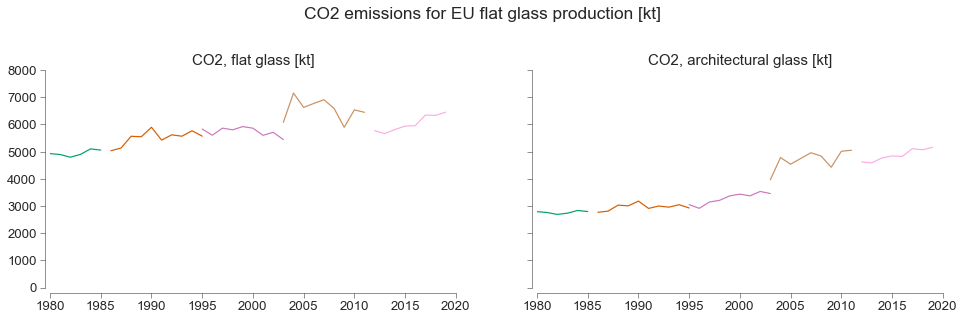

In [151]:
fig, axes = plt.subplots(nrows=1, ncols=2,
                         sharex=True, sharey=True,
                         figsize=(16, 4))

for i, (ax, CO2) in enumerate(zip(axes.flatten(), CO2_G)):
    sns.lineplot(data=df_eu.reset_index(),
                 x='year', y=f"{CO2}",
                 hue='Nbr of countries',
                 palette='colorblind',
                 ax=ax)
    ax.set_title(CO2)
    ax.set_xlim(1980, 2020)
    ax.set_ylim(0, 8000)
    ax.get_legend().remove()
    ax.set_ylabel(None)
    style_ax(ax)

fig.suptitle("CO2 emissions for EU flat glass production [kt]", y=1.1)
fig.subplots_adjust(hspace=0.4)
sns.despine(offset=5)
plt.show()

## Summary

In [152]:
# Number of countries for trend curves:
EU_COUNTRIES = [(10, 15), (27, 28)]

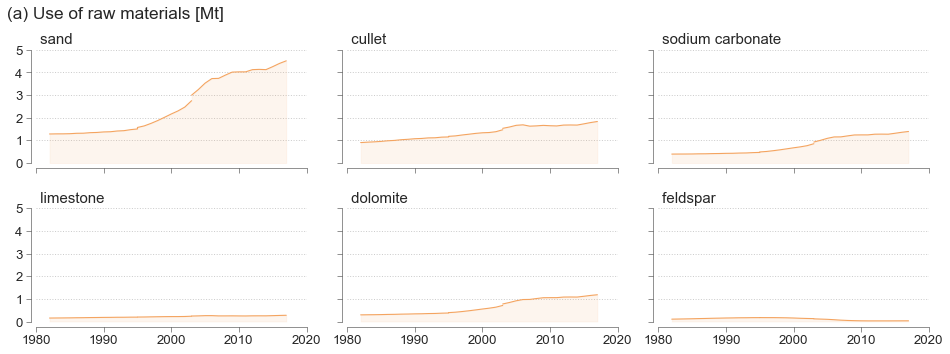

In [153]:
# Plot the absolute use of raw materials in EU for architectural glass prod:
fig, axes = plt.subplots(nrows=2, ncols=3,
                         sharex=True, sharey=True,
                         figsize=(16, 5))

for i, (ax, mat) in enumerate(zip(axes.flatten(), materials)):
    for a, b in EU_COUNTRIES:
        ax.plot(df_eu.interpolate().rolling(5, center=True).mean().loc[a:b]
                .reset_index(level='Nbr of countries')
                .sort_values(by=['year'])
                [f"{mat}, arch glass [kt]"],
                linewidth=1.1, c='sandybrown', linestyle='-')

    x = (df_eu.reset_index()['year'])
    y = (df_eu[f"{mat}, arch glass [kt]"].interpolate()
         .rolling(5, center=True).mean())

    ax.fill_between(x, y, color="sandybrown", alpha=0.1)
    ax.grid(which='major', axis='y', linestyle=':', linewidth=1)

    ax.set_title(f" {mat}", loc='left')
    style_ax(ax)

ax.set_ylim(0, 5000)
ax.set_xlim(1980, 2020)
plt.yticks(np.arange(0, 5001, 1000))

# Divide by 1000 the y-axis, results in Mt
ax.yaxis.set_major_formatter(y_1000)

fig.suptitle("(a) Use of raw materials [Mt]", x=0.1, y=1, ha='left')
fig.subplots_adjust(wspace=0.15, hspace=0.4)

sns.despine(offset=5)

if export:
    # Save image:
    fig.savefig(os.path.join(path_img, 'Fig7_EU_Use of raw materials.png'),
                dpi=600, bbox_inches='tight')
    fig.savefig(os.path.join(path_img, 'Fig7_EU_Use of raw materials.pdf'),
                bbox_inches='tight')

plt.show()

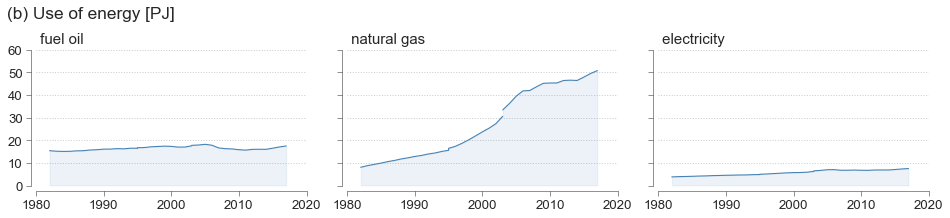

In [154]:
# Plot the absolute use of energy in the EU for architectural glass prod:
fig, axes = plt.subplots(nrows=1, ncols=3,
                         sharex=True, sharey=True,
                         figsize=(16, 2.5))

for i, (ax, energy) in enumerate(zip(axes.flatten(), energies)):
    for a, b in EU_COUNTRIES:
        ax.plot(df_eu.interpolate().rolling(5, center=True).mean().loc[a:b]
                .reset_index(level='Nbr of countries')
                .sort_values(by=['year'])
                [f"{energy}, arch glass [PJ]"],
                linewidth=1.1, c='steelblue', linestyle='-')

    x = (df_eu.reset_index()['year'])
    y = (df_eu[f"{energy}, arch glass [PJ]"].interpolate()
         .rolling(5, center=True).mean())
    ax.fill_between(x, y, color="steelblue", alpha=0.10)
    ax.grid(which='major', axis='y', linestyle=':', linewidth=1)

    ax.set_title(f" {energy}", loc='left')
    style_ax(ax)

ax.set_xlim(1980, 2020)
ax.set_ylim(0, 60)
plt.yticks(np.arange(0, 61, 10))

fig.suptitle("(b) Use of energy [PJ]", x=0.1, y=1.12, ha='left')
fig.subplots_adjust(wspace=0.15)

sns.despine(offset=5)

if export:
    # Save image:
    fig.savefig(os.path.join(path_img, 'Fig7_EU_Use of energy.png'),
                dpi=600, bbox_inches='tight')
    fig.savefig(os.path.join(path_img, 'Fig7_EU_Use of energy.pdf'),
                bbox_inches='tight')

plt.show()

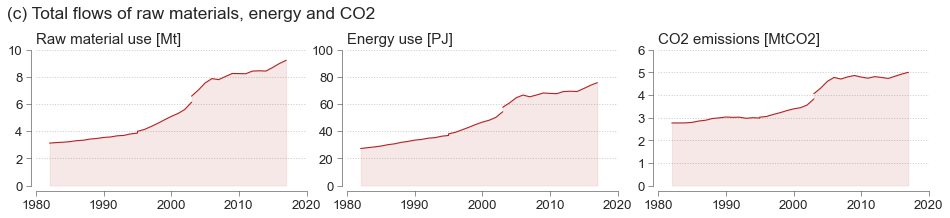

In [155]:
# Plot the total energy and material use, and total CO2 emissions:
fig, axes = plt.subplots(nrows=1, ncols=3,
                         sharex=True,
                         figsize=(16, 2.5))

# Total use of raw materials:
ax = axes[0]
for a, b in EU_COUNTRIES:
    ax.plot(df_eu.interpolate().rolling(5, center=True).mean().loc[a:b]
            .reset_index(level='Nbr of countries')
            .sort_values(by=['year'])
            ['Total raw materials, arch glass [Mt]'],
            linewidth=1.1, c='firebrick', linestyle='-')

x = (df_eu.reset_index()['year'])
y = (df_eu['Total raw materials, arch glass [Mt]'].interpolate()
     .rolling(5, center=True).mean())
ax.fill_between(x, y, color="firebrick", alpha=0.1)

ax.grid(which='major', axis='y', linestyle=':', linewidth=1)

ax.set_title("Raw material use [Mt]", loc='left')
style_ax(ax)
ax.set_ylim(0, 10)
ax.set_xlim(1980, 2020)

# Total use of energy:
ax = axes[1]
for a, b in EU_COUNTRIES:
    ax.plot(df_eu.interpolate().rolling(5, center=True).mean().loc[a:b]
            .reset_index(level='Nbr of countries')
            .sort_values(by=['year'])
            ['Total energy, arch glass [PJ]'],
            linewidth=1.1, c='firebrick', linestyle='-')

x = (df_eu.reset_index()['year'])
y = (df_eu['Total energy, arch glass [PJ]'].interpolate()
     .rolling(5, center=True).mean())
ax.fill_between(x, y, color="firebrick", alpha=0.1)

ax.grid(which='major', axis='y', linestyle=':', linewidth=1)

ax.set_title("Energy use [PJ]", loc='left')
style_ax(ax)
ax.set_ylim(0, 100)

# Total emissions of CO2:
ax = axes[2]
for a, b in EU_COUNTRIES:
    ax.plot(df_eu.interpolate().rolling(5, center=True).mean().loc[a:b]
            .reset_index(level='Nbr of countries')
            .sort_values(by=['year'])
            ['CO2, architectural glass [kt]'],
            linewidth=1.1, c='firebrick', linestyle='-')

x = (df_eu.reset_index()['year'])
y = (df_eu['CO2, architectural glass [kt]'].interpolate()
     .rolling(5, center=True).mean())
ax.fill_between(x, y, color="firebrick", alpha=0.1)

ax.grid(which='major', axis='y', linestyle=':', linewidth=1)

# Divide by 1000 the y-axis, results in Mt
ax.yaxis.set_major_formatter(y_1000)

ax.set_title("CO2 emissions [MtCO2]", loc='left')
style_ax(ax)
ax.set_ylim(0, 6000)
plt.yticks(np.arange(0, 6001, 1000))

fig.suptitle("(c) Total flows of raw materials, energy and CO2",
             x=0.1, y=1.12, ha='left')
fig.subplots_adjust(wspace=0.15)

sns.despine(offset=5)

if export:
    # Save image:
    plt.savefig(os.path.join(path_img, 'Fig7_EU_Total flows.png'),
                dpi=600, bbox_inches='tight')
    plt.savefig(os.path.join(path_img, 'Fig7_EU_Total flows.pdf'),
                bbox_inches='tight')

plt.show()

In [230]:
df_eu['CO2, architectural glass [kt]'].loc[28, 2018]

5065.359871683169

# Raw Material and Energy Use and CO2 Emissions in the Belgian and French Flat Glass Industries

## Use of Raw Materials in the Production of Flat Glass

In [156]:
# Absolute use of raw materials for fat glass production:
for mat in materials:
    for country in countries:
        df_be_fr[(f"{mat}, flat glass [kt]", country)] = (
            df_be_fr[('Production [kt]', country)]
            * (df_rawmat[f"{mat}, kg/kg"]
               .interpolate(method='pchip', limit_direction='forward'))
        )

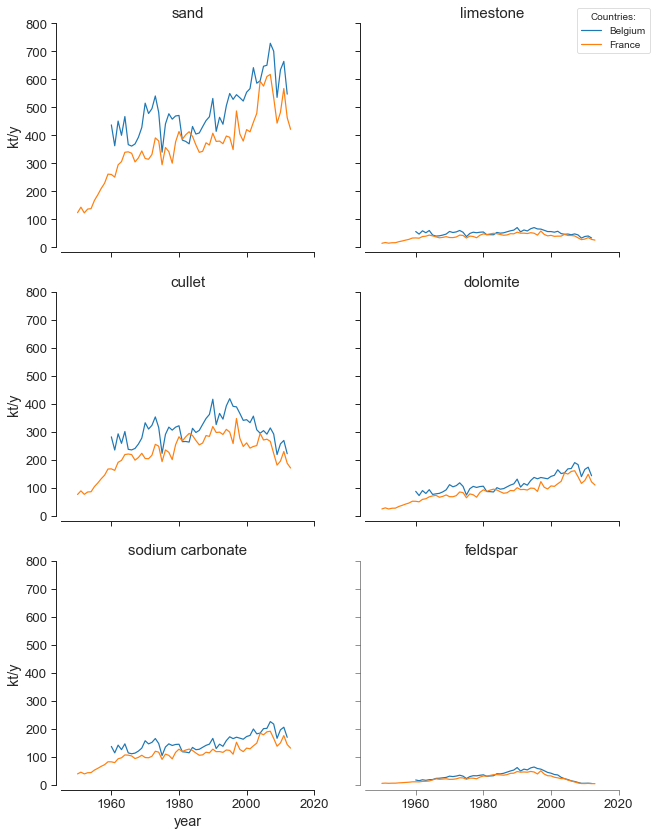

In [157]:
nrows = int(len(materials)/2)

fig, axes = plt.subplots(nrows=nrows, ncols=2,
                         sharex=True, sharey=True,
                         figsize=(10, 14))
row = 0
col = 0

for material in materials:
    ax = axes[row][col]
    ax.set_title(material)
    if col == 0:
        ax.set_ylabel("kt/y")
    if row == 2:
        row = 0
        col = 1
    else:
        row += 1
    df_be_fr[f"{material}, flat glass [kt]"].plot(ax=ax)
    ax.get_legend().remove()

ax.set_ylim(0, 800)
ax.set_xlim(1945, 2020)

# Add legend:
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=1,
           title='Countries:', bbox_to_anchor=(0.95, 0.9))

style_ax(ax)

sns.despine(offset=5)
plt.show()

In [158]:
for country in countries:
    df_be_fr[('Total raw material use, flat glass [kt]', country)] = 0

for material in materials:
    df_be_fr['Total raw material use, flat glass [kt]'] = (
        (df_be_fr[f"{material}, flat glass [kt]"])
        + df_be_fr['Total raw material use, flat glass [kt]']
    )

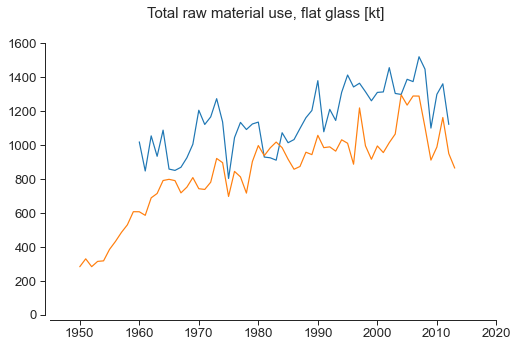

In [159]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(df_be_fr.index,
        df_be_fr['Total raw material use, flat glass [kt]'])

ax.set_xlim(1945, 2020)
ax.set_ylim(0, 1600)

fig.suptitle('Total raw material use, flat glass [kt]', fontsize=15)
sns.despine(offset=5)
plt.show()

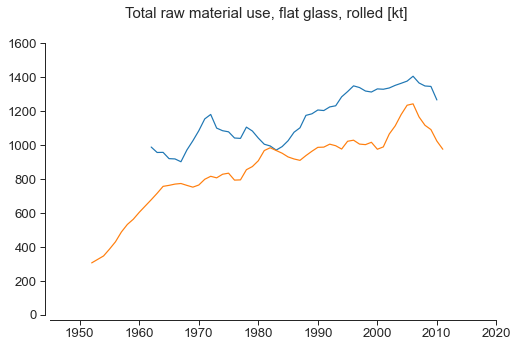

In [160]:
fig, ax = plt.subplots(figsize=(8, 5))


ax.plot(df_be_fr.index,
        df_be_fr['Total raw material use, flat glass [kt]']
        .rolling(5, center=True).mean())

ax.set_xlim(1945, 2020)
ax.set_ylim(0, 1600)

fig.suptitle('Total raw material use, flat glass, rolled [kt]', fontsize=15)
sns.despine(offset=5)
plt.show()

## Energy Use in the Production of Flat Glass

In [161]:
# Absolute use of energy for flat glass production:
for energy in energies:
    for country in countries:
        df_be_fr[(f"{energy}, flat glass [TJ]", country)] = (
            df_be_fr[('Production [kt]', country)]
            * (df_be_fr_energy[(f"{energy}, GJ/t", country)]
               .interpolate(method='pchip', limit_direction='forward'))
        )

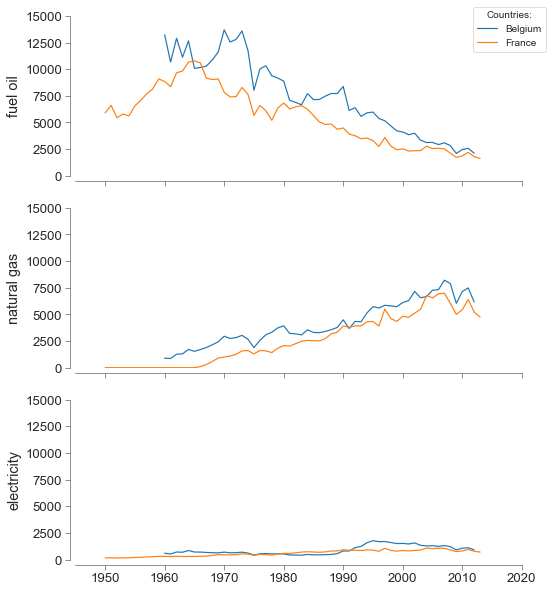

In [162]:
nrows = len(energies)

fig, axes = plt.subplots(nrows=nrows, ncols=1,
                         sharex=True, sharey=True,
                         figsize=(8, 10))

for row, energy in enumerate(energies):
    ax = axes[row]
    df_be_fr[f"{energy}, flat glass [TJ]"].plot(ax=ax)
    ax.set_ylabel(energy)

    style_ax(ax)
    ax.get_legend().remove()

# Add legend:
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=1,
           title='Countries:', bbox_to_anchor=(0.95, 0.9))

ax.set_xlim(1945, 2020)
ax.set_ylim(0, 15000)

sns.despine(offset=5)
plt.show()

In [163]:
for country in countries:
    df_be_fr[('Total energy use, flat glass [TJ]', country)] = 0

for energy in energies:
    df_be_fr['Total energy use, flat glass [TJ]'] = (
        df_be_fr[f"{energy}, flat glass [TJ]"]
        + df_be_fr['Total energy use, flat glass [TJ]']
    )

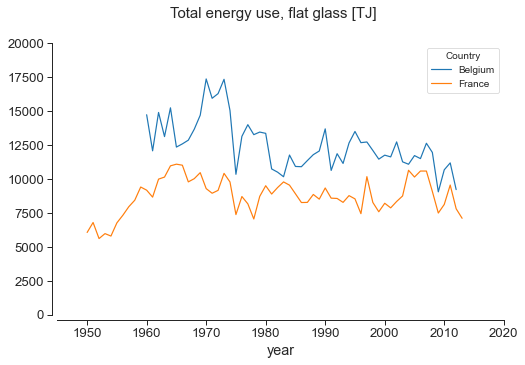

In [164]:
fig, ax = plt.subplots(figsize=(8, 5))

(df_be_fr['Total energy use, flat glass [TJ]']).plot(ax=ax)
ax.set_xlim(1945, 2020)
ax.set_ylim(0, 20000)

fig.suptitle('Total energy use, flat glass [TJ]', fontsize=15)
sns.despine(offset=5)
plt.show()

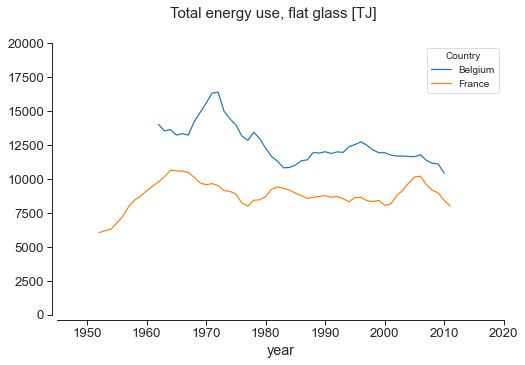

In [165]:
fig, ax = plt.subplots(figsize=(8, 5))

(df_be_fr['Total energy use, flat glass [TJ]']
 .rolling(5, center=True).mean()).plot(ax=ax)
ax.set_xlim(1945, 2020)
ax.set_ylim(0, 20000)

fig.suptitle('Total energy use, flat glass [TJ]', fontsize=15)
sns.despine(offset=5)
plt.show()

## Use of Raw Materials in the Production of Architectural Glass

In [166]:
# Absolute use of raw materials for architectural flat glass production:
for mat in materials:
    for country in countries:
        df_be_fr[(f"{mat}, architectural glass [kt]", country)] = (
            df_be_fr[('Architectural glass production [kt]', country)]
            * (df_rawmat[f"{mat}, kg/kg"]
               .interpolate(method='pchip', limit_direction='forward'))
        )

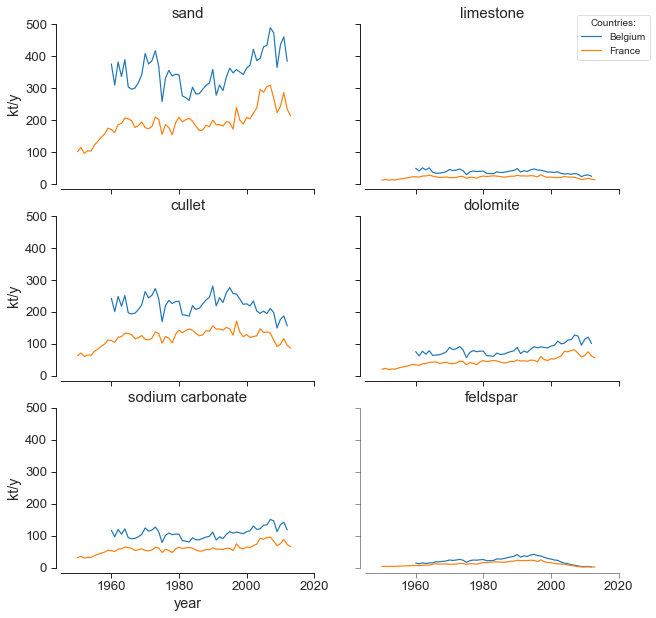

In [167]:
nrows = int(len(materials)/2)

fig, axes = plt.subplots(nrows=nrows, ncols=2,
                         sharex=True, sharey=True,
                         figsize=(10, 10))
row = 0
col = 0

for material in materials:
    ax = axes[row][col]
    ax.set_title(material)
    if col == 0:
        ax.set_ylabel("kt/y")
    if row == 2:
        row = 0
        col = 1
    else:
        row += 1
    df_be_fr[f"{material}, architectural glass [kt]"].plot(ax=ax)
    ax.get_legend().remove()

ax.set_ylim(0, 500)
ax.set_xlim(1945, 2020)

# Add legend:
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=1,
           title='Countries:', bbox_to_anchor=(0.95, 0.9))

style_ax(ax)

sns.despine(offset=5)
plt.show()

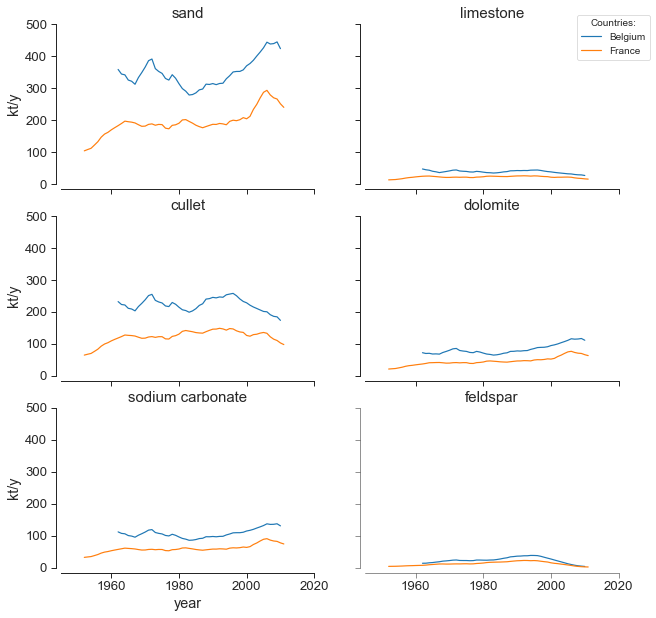

In [168]:
nrows = int(len(materials)/2)

fig, axes = plt.subplots(nrows=nrows, ncols=2,
                         sharex=True, sharey=True,
                         figsize=(10, 10))
row = 0
col = 0

for material in materials:
    ax = axes[row][col]
    ax.set_title(material)
    if col == 0:
        ax.set_ylabel("kt/y")
    if row == 2:
        row = 0
        col = 1
    else:
        row += 1
    (df_be_fr[f"{material}, architectural glass [kt]"]
     .rolling(5, center=True).mean().plot(ax=ax))
    ax.get_legend().remove()

ax.set_ylim(0, 500)
ax.set_xlim(1945, 2020)

# Add legend:
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=1,
           title='Countries:', bbox_to_anchor=(0.95, 0.9))

style_ax(ax)

sns.despine(offset=5)
plt.show()

In [169]:
for country in countries:
    df_be_fr[('Total raw material use, architectural glass [kt]', country)] = 0

for material in materials:
    df_be_fr['Total raw material use, architectural glass [kt]'] = (
        df_be_fr[f"{material}, architectural glass [kt]"]
        + df_be_fr['Total raw material use, architectural glass [kt]']
    )

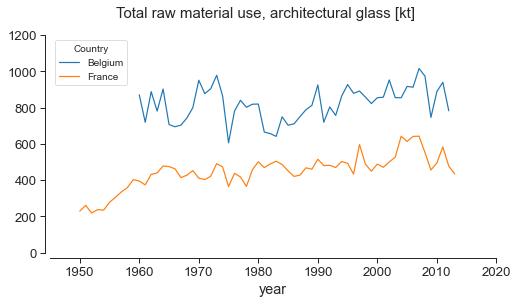

In [170]:
fig, ax = plt.subplots(figsize=(8, 4))

(df_be_fr['Total raw material use, architectural glass [kt]']).plot(ax=ax)

ax.set_xlim(1945, 2020)
ax.set_ylim(0, 1200)

fig.suptitle('Total raw material use, architectural glass [kt]', fontsize=15)
sns.despine(offset=5)
plt.show()

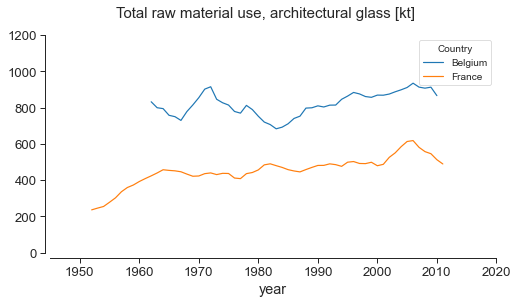

In [171]:
fig, ax = plt.subplots(figsize=(8, 4))

(df_be_fr['Total raw material use, architectural glass [kt]']
 .rolling(5, center=True).mean().plot(ax=ax))

ax.set_xlim(1945, 2020)
ax.set_ylim(0, 1200)

fig.suptitle('Total raw material use, architectural glass [kt]', fontsize=15)
sns.despine(offset=5)
plt.show()

In [172]:
(df_be_fr['Total raw material use, architectural glass [kt]']['France']
 .rolling(5, center=True).mean())[2006]

617.6551457030012

## Energy Use in the Production of Architectural Glass

In [173]:
# Absolute use of energy for flat glass production:
for energy in energies:
    for country in countries:
        df_be_fr[(f"{energy}, architectural glass [TJ]", country)] = (
            df_be_fr[('Architectural glass production [kt]', country)]
            * (df_be_fr_energy[(f"{energy}, GJ/t", country)]
               .interpolate(method='pchip', limit_direction='forward'))
        )

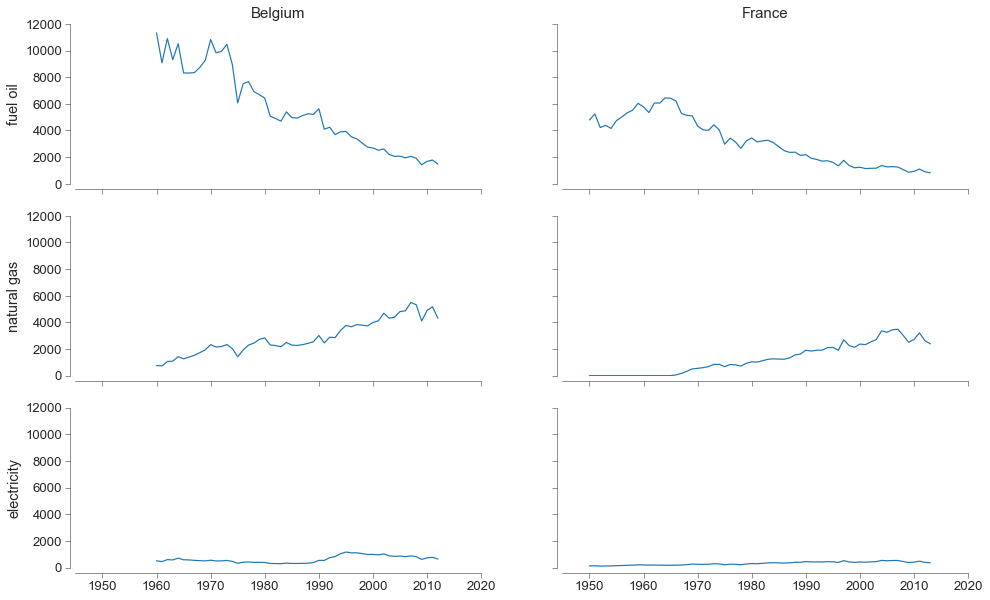

In [174]:
nrows = len(energies)
ncols = len(countries)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         sharex=True, sharey=True,
                         figsize=(16, 10))

for row, energy in enumerate(energies):
    for col, country in enumerate(countries):
        ax = axes[row][col]
        df_be_fr[(f"{energy}, architectural glass [TJ]", country)].plot(ax=ax)

        if row == 0:
            ax.set_title(country)
        if col == 0:
            ax.set_ylabel(energy)

        style_ax(ax)

ax.set_xlim(1945, 2020)
ax.set_ylim(0, 12000)

sns.despine(offset=5)
plt.show()

In [175]:
for country in countries:
    df_be_fr[('Total energy use, architectural glass [TJ]', country)] = 0

for energy in energies:
    df_be_fr['Total energy use, architectural glass [TJ]'] = (
        df_be_fr[f"{energy}, architectural glass [TJ]"]
        + df_be_fr['Total energy use, architectural glass [TJ]']
    )

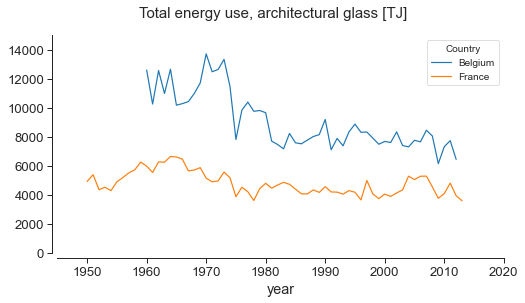

In [176]:
fig, ax = plt.subplots(figsize=(8, 4))

(df_be_fr['Total energy use, architectural glass [TJ]']).plot(ax=ax)

ax.set_xlim(1945, 2020)
ax.set_ylim(0, 15000)

fig.suptitle('Total energy use, architectural glass [TJ]', fontsize=15)
sns.despine(offset=5)
plt.show()

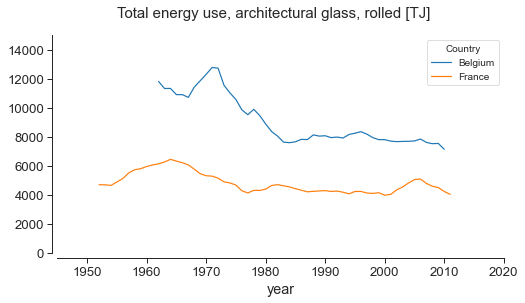

In [177]:
fig, ax = plt.subplots(figsize=(8, 4))

(df_be_fr['Total energy use, architectural glass [TJ]']
 .rolling(5, center=True).mean().plot(ax=ax))

ax.set_xlim(1945, 2020)
ax.set_ylim(0, 15000)

fig.suptitle('Total energy use, architectural glass, rolled [TJ]',
             fontsize=15)
sns.despine(offset=5)
plt.show()

## Absolute CO2 Emissions in Belgium and France since 1945


In [178]:
# Estimate the CO2 emission related to flat glass production:
for country in countries:
    df_be_fr[('CO2, flat glass [kt]', country)] = (
        df_be_fr[('Production [kt]', country)]
        * fr_co2_intensity['CO2 interpolated [kg/t]'] / 1000
    )

In [179]:
# Estimate the CO2 emission related to architectural flat glass production:
for country in countries:
    df_be_fr[('CO2, architectural glass [kt]', country)] = (
        df_be_fr[('Architectural glass production [kt]', country)]
        * fr_co2_intensity['CO2 interpolated [kg/t]'] / 1000
    )

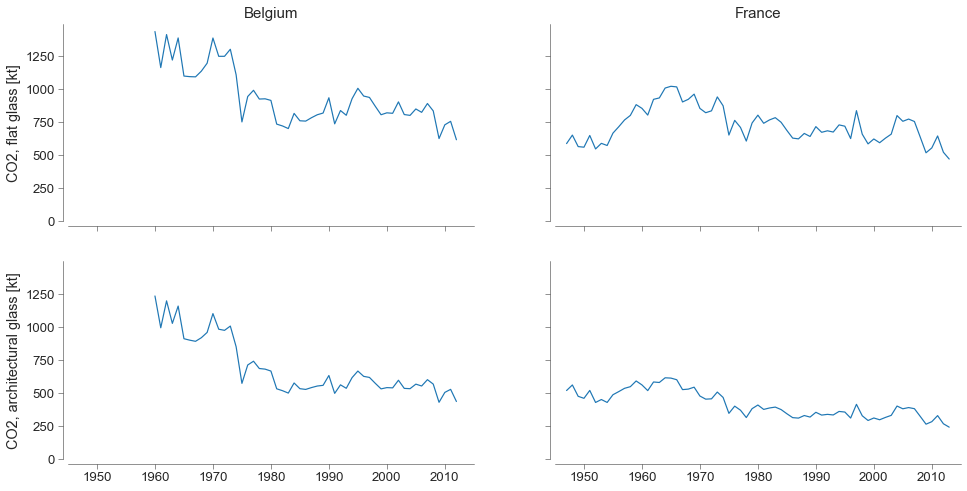

In [180]:
nrows = len(CO2_G)
ncols = len(countries)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         sharex=True, sharey=True,
                         figsize=(16, 8))

for row, CO2 in enumerate(CO2_G):
    for col, country in enumerate(countries):
        ax = axes[row][col]
        df_be_fr[(f"{CO2}", country)].plot(ax=ax)
        if row == 0:
            ax.set_title(country)
        if col == 0:
            ax.set_ylabel(CO2)

        style_ax(ax)

ax.set_xlim(1945, 2015)
ax.set_ylim(ymin=0)

sns.despine(offset=5)
plt.show()

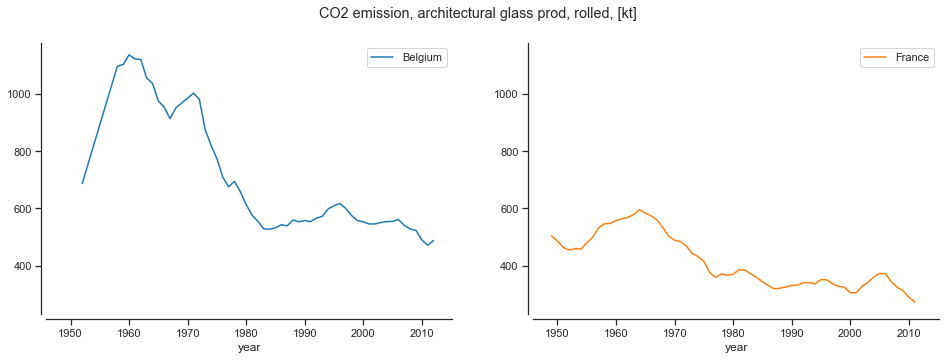

In [181]:
# 5-y. rolling of the CO2 emission related to architectural glass prod
# and plot:
with sns.plotting_context("notebook"):
    # Rolling flat glass production according to a 5-year mean
    (df_be_fr['CO2, architectural glass [kt]']
     .interpolate(method="linear", limit_area='inside')
     .rolling(5, center=True)
     .mean()).plot(subplots=True,
                   grid=False,
                   layout=(1, 2),
                   figsize=(16, 5),
                   sharex=True, sharey=True,
                   title=(
                       "CO2 emission, architectural glass prod, rolled, [kt]")
                   )

    ax.set_xlim(1945, 2015)
    ax.set_ylim(ymin=0)
    sns.despine(offset=5)
    plt.show()

## Summary

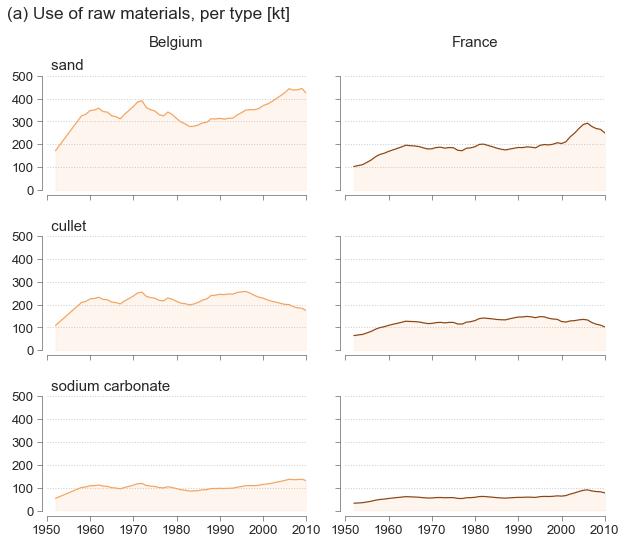

In [182]:
# Raw materials, per type:
mat_reduced = ['sand', 'cullet', 'sodium carbonate']

nrows = len(mat_reduced)
ncols = len(countries)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         sharex=True, sharey=True,
                         figsize=(10, 8))

for row, material in enumerate(mat_reduced):
    for col, country in enumerate(countries):
        ax = axes[row][col]
        if country == 'Belgium':
            color = 'sandybrown'
            ax.set_title(f" {material}", loc='left')
        else:
            color = 'saddlebrown'

        (df_be_fr[(f"{material}, architectural glass [kt]", country)]
         .interpolate(method="linear", limit_area='inside')
         .rolling(5, center=True).mean()
         .plot(ax=ax, c=color))

        x = df_be_fr.index
        y = (df_be_fr[(f"{material}, architectural glass [kt]", country)]
             .interpolate(method="linear", limit_area='inside')
             .rolling(5, center=True).mean())
        ax.fill_between(x, y, color="sandybrown", alpha=0.1)

        ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
        style_ax(ax)
        if row == 0:
            ax.set_title(country, y=1.2)

ax.set_xlim(1950, 2010)
ax.set_ylim(0, 500)
ax.set_xticks(np.arange(1950, 2011, 10))
ax.set_yticks(np.arange(0, 501, 100))

fig.suptitle("(a) Use of raw materials, per type [kt]",
             x=0.07, y=1, ha='left')
fig.subplots_adjust(wspace=0.15, hspace=0.4)

sns.despine(offset=5)
plt.show()

if export:
    # Save image:
    fig.savefig(os.path.join(path_img, 'AppendixD_BEFR_UseOfRawMaterials.png'),
                dpi=600, bbox_inches='tight')
    fig.savefig(os.path.join(path_img, 'AppendixD_BEFR_UseOfRawMaterials.pdf'),
                bbox_inches='tight')

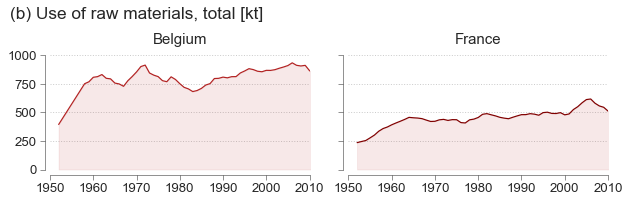

In [183]:
# Raw materials, total:
ncols = len(countries)

fig, axes = plt.subplots(nrows=1, ncols=ncols,
                         sharex=True, sharey=True,
                         figsize=(10, 2.1))

for col, country in enumerate(countries):
    ax = axes[col]
    if country == 'Belgium':
        color = 'firebrick'
    else:
        color = 'maroon'

    (df_be_fr[("Total raw material use, architectural glass [kt]", country)]
     .interpolate(method="linear", limit_area='inside')
     .rolling(5, center=True).mean()
     .plot(ax=ax, c=color))

    x = df_be_fr.index
    y = (df_be_fr[("Total raw material use, architectural glass [kt]", country)]
         .interpolate(method="linear", limit_area='inside')
         .rolling(5, center=True).mean())
    ax.fill_between(x, y, color="firebrick", alpha=0.1)

    ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
    style_ax(ax)
    ax.set_title(country, y=1.05)

ax.set_xlim(1950, 2010)
plt.xticks(np.arange(1950, 2011, 10))

ax.set_ylim(0, 1000)

fig.suptitle("(b) Use of raw materials, total [kt]",
             x=0.07, y=1.2, ha='left')
fig.subplots_adjust(wspace=0.15, hspace=0.4)

sns.despine(offset=5)
plt.show()

if export:
    # Save image:
    fig.savefig(os.path.join(path_img, 'AppendixD_BEFR_TotalRawMaterials.png'),
                dpi=600, bbox_inches='tight')
    fig.savefig(os.path.join(path_img, 'AppendixD_BEFR_TotalRawMaterials.pdf'),
                bbox_inches='tight')

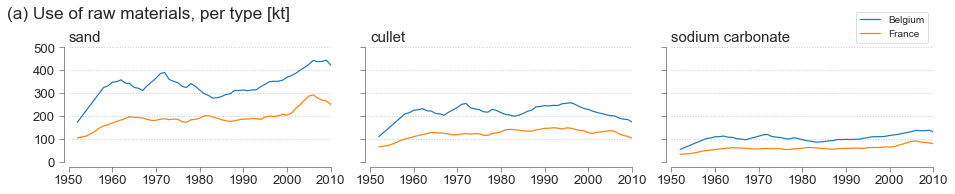

In [184]:
toplot = ['sand', 'cullet', 'sodium carbonate']

fig, axes = plt.subplots(nrows=1, ncols=3,
                         sharex=True, sharey=True,
                         figsize=(15.5, 2.1))
col = 0

for plot in toplot:
    ax = axes[col]
    ax.set_title(plot, loc='left')
    col += 1
    (df_be_fr[f"{plot}, architectural glass [kt]"]
     .interpolate(method="linear", limit_area='inside')
     .rolling(5, center=True).mean().plot(ax=ax))
    ax.get_legend().remove()
    ax.grid(which='major', axis='y', linestyle=':', linewidth=1)

    style_ax(ax)

ax.set_xlim(1950, 2010)
plt.xticks(np.arange(1950, 2011, 10))

ax.set_ylim(0, 500)
plt.yticks(np.arange(0, 501, 100))

# Add legend:
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=1, bbox_to_anchor=(0.9, 1.15))

fig.suptitle("(a) Use of raw materials, per type [kt]",
             x=0.07, y=1.15, ha='left')
fig.subplots_adjust(wspace=0.15, hspace=0.4)

sns.despine(offset=5)
plt.show()

if export:
    # Save image:
    fig.savefig(os.path.join(
        path_img, 'AppendixD_BEFR_RawMaterials_3Graphs.png'),
        dpi=600, bbox_inches='tight')
    fig.savefig(os.path.join(
        path_img, 'AppendixD_BEFR_RawMaterials_3Graphs.pdf'),
        bbox_inches='tight')

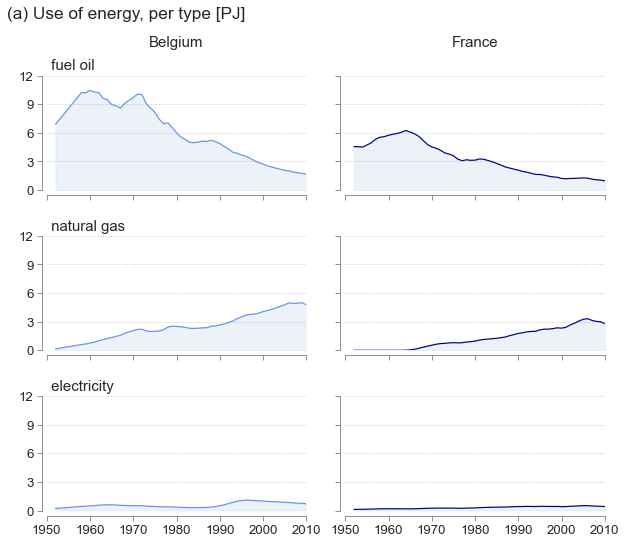

In [185]:
# Energy use, per type:
nrows = len(energies)
ncols = len(countries)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         sharex=True, sharey=True,
                         figsize=(10, 8))

for row, energy in enumerate(energies):
    for col, country in enumerate(countries):
        ax = axes[row][col]
        if country == 'Belgium':
            color = 'cornflowerblue'
            ax.set_title(f" {energy}", loc='left')
        else:
            color = 'darkblue'

        (df_be_fr[(f"{energy}, architectural glass [TJ]", country)]
         .interpolate(method="linear", limit_area='inside')
         .rolling(5, center=True).mean()
         .plot(ax=ax, c=color)
         )

        x = df_be_fr.index
        y = (df_be_fr[(f"{energy}, architectural glass [TJ]", country)]
             .interpolate(method="linear", limit_area='inside')
             .rolling(5, center=True).mean())
        ax.fill_between(x, y, color="steelblue", alpha=0.1)

        # Divide by 1000 the y-axis, results in PJ
        ax.yaxis.set_major_formatter(y_1000)

        ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
        style_ax(ax)
        if row == 0:
            ax.set_title(country, y=1.2)

ax.set_xlim(1950, 2010)
ax.set_ylim(0, 12000)
ax.minorticks_off()

plt.xticks(np.arange(1950, 2011, 10))
plt.yticks(np.arange(0, 12001, 3000))

fig.suptitle("(a) Use of energy, per type [PJ]",
             x=0.07, y=1, ha='left')
fig.subplots_adjust(wspace=0.15, hspace=0.4)

sns.despine(offset=5)
plt.show()

if export:
    # Save image:
    fig.savefig(os.path.join(path_img, 'AppendixE_BEFR_UseOfEnergy.png'),
                dpi=600, bbox_inches='tight')
    fig.savefig(os.path.join(path_img, 'AppendixE_BEFR_UseOfEnergy.pdf'),
                bbox_inches='tight')

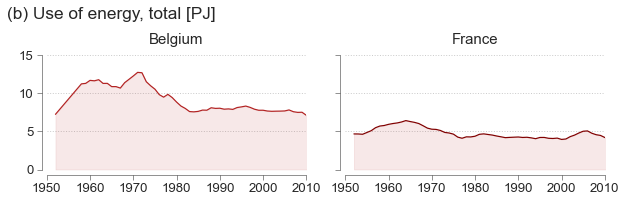

In [186]:
# Energy use, total:
ncols = len(countries)

fig, axes = plt.subplots(nrows=1, ncols=ncols,
                         sharex=True, sharey=True,
                         figsize=(10, 2.1))

for col, country in enumerate(countries):
    ax = axes[col]
    if country == 'Belgium':
        color = 'firebrick'
    else:
        color = 'maroon'

    (df_be_fr[('Total energy use, architectural glass [TJ]', country)]
     .interpolate(method="linear", limit_area='inside')
     .rolling(5, center=True).mean()
     .plot(ax=ax, c=color))

    x = df_be_fr.index
    y = (df_be_fr[('Total energy use, architectural glass [TJ]', country)]
         .interpolate(method="linear", limit_area='inside')
         .rolling(5, center=True).mean())
    ax.fill_between(x, y, color="firebrick", alpha=0.1)

    # Divide by 1000 the y-axis, results in PJ
    ax.yaxis.set_major_formatter(y_1000)

    ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
    style_ax(ax)
    ax.set_title(country, y=1.05)

ax.set_xlim(1950, 2010)
ax.set_ylim(0, 15000)

plt.xticks(np.arange(1950, 2011, 10))

fig.suptitle("(b) Use of energy, total [PJ]",
             x=0.07, y=1.2, ha='left')
fig.subplots_adjust(wspace=0.15, hspace=0.4)

sns.despine(offset=5)
plt.show()

if export:
    # Save image:
    fig.savefig(os.path.join(path_img, 'AppendixE_BEFR_TotalEnergy.png'),
                dpi=600, bbox_inches='tight')
    fig.savefig(os.path.join(path_img, 'AppendixE_BEFR_TotalEnergy.pdf'),
                bbox_inches='tight')

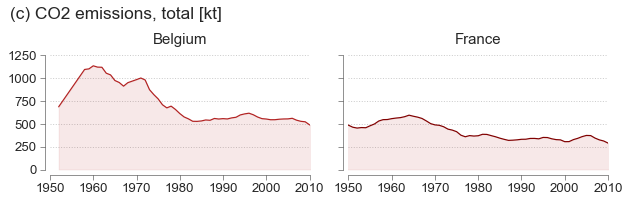

In [187]:
# CO2 emissions, total:
ncols = len(countries)

fig, axes = plt.subplots(nrows=1, ncols=ncols,
                         sharex=True, sharey=True,
                         figsize=(10, 2.1))

for col, country in enumerate(countries):
    ax = axes[col]
    ax = axes[col]
    if country == 'Belgium':
        color = 'firebrick'
    else:
        color = 'maroon'

    (df_be_fr[('CO2, architectural glass [kt]', country)]
     .interpolate(method="linear", limit_area='inside')
     .rolling(5, center=True).mean()
     .plot(ax=ax, c=color))

    x = df_be_fr.index
    y = (df_be_fr[('CO2, architectural glass [kt]', country)]
         .interpolate(method="linear", limit_area='inside')
         .rolling(5, center=True).mean())
    ax.fill_between(x, y, color="firebrick", alpha=0.1)

    ax.grid(which='major', axis='y', linestyle=':', linewidth=1)
    style_ax(ax)
    ax.set_title(country, y=1.05)

ax.set_xlim(1950, 2010)
ax.set_ylim(0, 1250)

plt.xticks(np.arange(1950, 2011, 10))
plt.yticks(np.arange(0, 1251, 250))

fig.suptitle("(c) CO2 emissions, total [kt]",
             x=0.07, y=1.2, ha='left')
fig.subplots_adjust(wspace=0.15, hspace=0.4)

sns.despine(offset=5)
plt.show()

if export:
    # Save image:
    fig.savefig(os.path.join(path_img, 'AppendixE_BEFR_TotalCO2.png'),
                dpi=600, bbox_inches='tight')
    fig.savefig(os.path.join(path_img, 'AppendixE_BEFR_TotalCO2.pdf'),
                bbox_inches='tight')

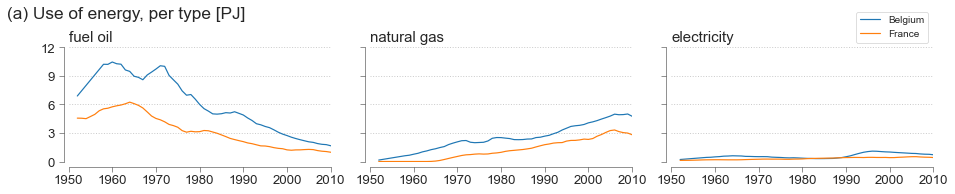

In [188]:
fig, axes = plt.subplots(nrows=1, ncols=3,
                         sharex=True, sharey=True,
                         figsize=(15.5, 2.1))
col = 0

for energy in energies:
    ax = axes[col]
    ax.set_title(energy, loc='left')
    col += 1
    (df_be_fr[f"{energy}, architectural glass [TJ]"]
     .interpolate(method="linear", limit_area='inside')
     .rolling(5, center=True).mean().plot(ax=ax))
    ax.get_legend().remove()
    ax.grid(which='major', axis='y', linestyle=':', linewidth=1)

    # Divide by 1000 the y-axis, results in PJ
    ax.yaxis.set_major_formatter(y_1000)
    ax.minorticks_off()
    style_ax(ax)

ax.set_xlim(1950, 2010)
plt.xticks(np.arange(1950, 2011, 10))

ax.set_ylim(0, 12000)
plt.yticks(np.arange(0, 12001, 3000))

# Add legend:
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=1, bbox_to_anchor=(0.9, 1.15))

fig.suptitle("(a) Use of energy, per type [PJ]",
             x=0.07, y=1.15, ha='left')
fig.subplots_adjust(wspace=0.15, hspace=0.4)

sns.despine(offset=5)
plt.show()

if export:
    # Save image:
    fig.savefig(os.path.join(
        path_img, 'AppendixE_BEFR_UseOfEnergy_3Graphs.png'),
        dpi=600, bbox_inches='tight')
    fig.savefig(os.path.join(
        path_img, 'AppendixE_BEFR_UseOfEnergy_3Graphs.pdf'),
        bbox_inches='tight')

In [189]:
(df_be_fr[('CO2, architectural glass [kt]', 'France')]
 .interpolate(method="linear", limit_area='inside')
 .rolling(5, center=True).mean())[2010]

289.40848192628147

# Relative v. Absolute Decoupling: A Base 100 Analysis

## Flat Glass Production, France and Belgium, 1960-1980

In [190]:
D1 = 1960
D2 = 1980

In [191]:
# Base 100 = 1960
FGProd_diff = (100 * df_be_fr['Production [kt]']
               / df_be_fr['Production [kt]'].loc[D1])

co2intensity_diff = 100 * fr_co2_intensity / fr_co2_intensity.loc[D1]

co2abs_diff = (100 * df_be_fr['CO2, flat glass [kt]']
               / df_be_fr['CO2, flat glass [kt]'].loc[D1])

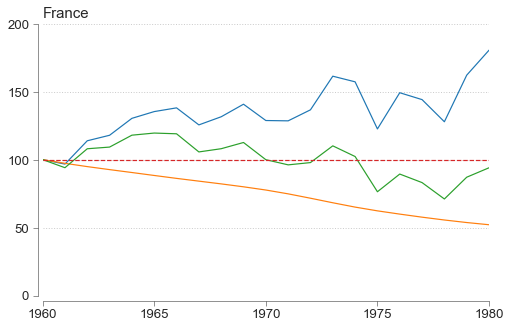

In [192]:
# Plot production, carbon intensity and CO2 absolute emissions for France:
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(data=FGProd_diff,
             x=FGProd_diff.index,
             y='France',
             ax=ax)

ax.plot(co2intensity_diff.index,
        co2intensity_diff['CO2 interpolated [kg/t]'])

ax.plot(co2abs_diff.index,
        co2abs_diff['France'])

ax.plot([D1, D2], [100, 100], '--')
ax.grid(which='major', axis='y', linestyle=':', linewidth=1)

ax.set_ylim(0, 200)
plt.yticks(np.arange(0, 201, 50))
ax.set_xlim(D1, D2)
plt.xticks(np.arange(D1, D2+1, 5))

ax.set_title("France", loc='left')
ax.set_ylabel(None)
style_ax(ax)

sns.despine(offset=5)
plt.show()

In [193]:
# Base 100 = 1960, with a 5-year moving average
fg_prod_diffroll = (100 * df_be_fr['Production [kt]']
                    .interpolate(method="linear", limit_area='inside')
                    .rolling(5, center=True).mean()
                    / df_be_fr['Production [kt]']
                    .interpolate(method="linear", limit_area='inside')
                    .rolling(5, center=True).mean().loc[D1])

co2abs_diffroll = (100 * (df_be_fr['CO2, flat glass [kt]']
                          .interpolate(method="linear", limit_area='inside')
                          .rolling(5, center=True).mean())
                   / (df_be_fr['CO2, flat glass [kt]']
                       .interpolate(method="linear", limit_area='inside')
                       .rolling(5, center=True).mean().loc[D1]))

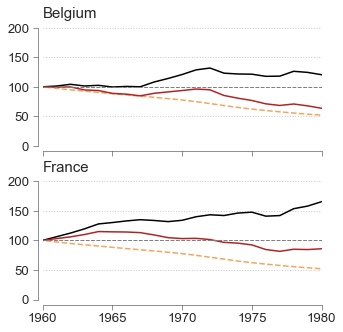

In [194]:
# Plot production, carbon intensity, CO2 absolute emissions for France:
fig, axes = plt.subplots(nrows=2, ncols=1,
                         sharex=True, sharey=True,
                         figsize=(5, 5))


for col, country in enumerate(countries):
    ax = axes[col]

    sns.lineplot(data=fg_prod_diffroll,
                 x=fg_prod_diffroll.index,
                 y=f'{country}',
                 ax=ax, color='black', linewidth=1.5)

    ax.plot(co2intensity_diff.index,
            co2intensity_diff['CO2 interpolated [kg/t]'],
            color='sandybrown', linestyle='--', linewidth=1.5)

    ax.plot(co2abs_diffroll.index,
            co2abs_diffroll[f'{country}'],
            color='firebrick', linewidth=1.5)

    ax.set_xlim(D1, D2)
    plt.xticks(np.arange(D1, D2+1, 5))
    ax.set_ylabel(None)

    ax.plot([D1, D2], [100, 100], '--', c='grey', linewidth=1)
    ax.grid(which='major', axis='y', linestyle=':', linewidth=1)

    ax.set_title(f"{country}", loc='left', pad=10)
    style_ax(ax)

ax.set_ylim(0, 200)
plt.yticks(np.arange(0, 201, 50))

fig.subplots_adjust(hspace=0.3)

sns.despine(offset=5)
plt.show()

if export:
    # Save image:
    fig.savefig(os.path.join(path_img, 'Fig8_FlatGlass_Base100_60-80.png'),
                dpi=600, bbox_inches='tight')
    fig.savefig(os.path.join(path_img, 'Fig8_FlatGlass_Base100_60-80.pdf'),
                bbox_inches='tight')

In [195]:
for country in countries:
    print(f"Flat Glass Prod in {country}:\n",
          '%.2f' % fg_prod_diffroll[f'{country}'].loc[D2])
    print(f"CO2 absolute emissions in {country}:\n",
          '%.2f' % co2abs_diffroll[f'{country}'].loc[D2])
    print("CO2 intensity:\n",
          '%.2f' % co2intensity_diff['CO2 interpolated [kg/t]'].loc[D2])

Flat Glass Prod in Belgium:
 120.41
CO2 absolute emissions in Belgium:
 63.65
CO2 intensity:
 52.07
Flat Glass Prod in France:
 165.57
CO2 absolute emissions in France:
 85.88
CO2 intensity:
 52.07


## Flat Glass Production, France and Belgium, 1985-2005

In [196]:
D3 = 1985
D4 = 2005

In [197]:
# Base 100 = 1985
FGProd_diff = (100 * df_be_fr['Production [kt]']
               / df_be_fr['Production [kt]'].loc[D3])

co2intensity_diff = 100 * fr_co2_intensity / fr_co2_intensity.loc[D3]

co2abs_diff = (100 * df_be_fr['CO2, flat glass [kt]']
               / df_be_fr['CO2, flat glass [kt]'].loc[D3])

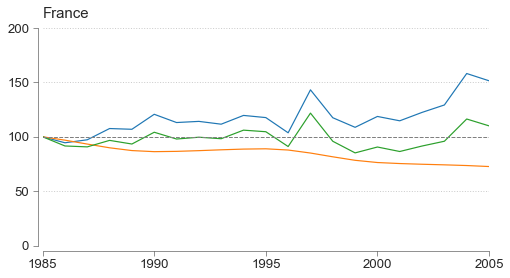

In [198]:
# Plot production, carbon intensity and CO2 absolute emissions for France:
fig, ax = plt.subplots(figsize=(8, 4))

sns.lineplot(data=FGProd_diff,
             x=FGProd_diff.index,
             y='France',
             ax=ax)

ax.plot(co2intensity_diff.index,
        co2intensity_diff['CO2 interpolated [kg/t]'])
ax.plot(co2abs_diff.index,
        co2abs_diff['France'])

ax.plot([D3, D4], [100, 100], '--', c='grey', linewidth=1)
ax.grid(which='major', axis='y', linestyle=':', linewidth=1)

ax.set_ylim(0, 200)
plt.yticks(np.arange(0, 201, 50))
ax.set_xlim(D3, D4)
plt.xticks(np.arange(D3, D4+1, 5))

ax.set_title("France", loc='left', pad=10)
ax.set_ylabel(None)
style_ax(ax)

sns.despine(offset=5)
plt.show()

In [199]:
# Base 100 = 1985, with a 5-year rolling
fg_prod_diffroll = (100 * df_be_fr['Production [kt]']
                    .rolling(5, center=True).mean()
                    / df_be_fr['Production [kt]']
                    .rolling(5, center=True).mean().loc[D3])

co2abs_diffroll = (100 * (df_be_fr['CO2, flat glass [kt]']
                          .interpolate(method="linear", limit_area='inside')
                          .rolling(5, center=True).mean())
                   / (df_be_fr['CO2, flat glass [kt]']
                       .interpolate(method="linear", limit_area='inside')
                       .rolling(5, center=True).mean().loc[D3]))

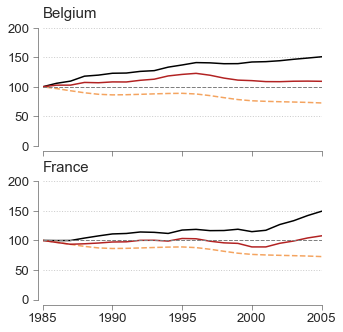

In [200]:
# Plot production, carbon intensity, CO2 absolute emissions for France:
fig, axes = plt.subplots(nrows=2, ncols=1,
                         sharex=True, sharey=True,
                         figsize=(5, 5))

for col, country in enumerate(countries):
    ax = axes[col]

    sns.lineplot(data=fg_prod_diffroll,
                 x=fg_prod_diffroll.index,
                 y=f'{country}',
                 ax=ax, color='black', linewidth=1.5)

    ax.plot(co2intensity_diff.index,
            co2intensity_diff['CO2 interpolated [kg/t]'],
            color='sandybrown', linestyle='--', linewidth=1.5)

    ax.plot(co2abs_diffroll.index,
            co2abs_diffroll[f'{country}'],
            color='firebrick', linewidth=1.5)

    ax.set_xlim(D3, D4)
    plt.xticks(np.arange(D3, D4+1, 5))
    ax.set_ylabel(None)

    ax.plot([D3, D4], [100, 100], '--', c='grey', linewidth=1)
    ax.grid(which='major', axis='y', linestyle=':', linewidth=1)

    ax.set_title(f"{country}", loc='left', pad=10)
    style_ax(ax)

ax.set_ylim(0, 200)
plt.yticks(np.arange(0, 201, 50))

fig.subplots_adjust(hspace=0.3)

sns.despine(offset=5)
plt.show()

if export:
    # Save image:
    fig.savefig(os.path.join(path_img, 'Fig8_FlatGlass_Base100_85-05.png'),
                dpi=600, bbox_inches='tight')
    fig.savefig(os.path.join(path_img, 'Fig8_FlatGlass_Base100_85-05.pdf'),
                bbox_inches='tight')

In [201]:
for country in countries:
    print(f"Flat Glass Prod in {country}:\n",
          '%.2f' % fg_prod_diffroll[f'{country}'].loc[D4])
    print(f"CO2 absolute emissions in {country}:\n",
          '%.2f' % co2abs_diffroll[f'{country}'].loc[D4])
    print("CO2 intensity:\n",
          '%.2f' % co2intensity_diff['CO2 interpolated [kg/t]'].loc[D4])

Flat Glass Prod in Belgium:
 150.80
CO2 absolute emissions in Belgium:
 109.27
CO2 intensity:
 72.63
Flat Glass Prod in France:
 149.35
CO2 absolute emissions in France:
 107.78
CO2 intensity:
 72.63


## Architectural Glass Production, France and Belgium, 1960-1980

In [202]:
# Base 100 = 1960
FGProd_diff = (100 * df_be_fr['Architectural glass production [kt]']
               / df_be_fr['Architectural glass production [kt]'].loc[D1])

co2intensity_diff = 100 * fr_co2_intensity / fr_co2_intensity.loc[D1]

co2abs_diff = (100 * df_be_fr['CO2, architectural glass [kt]']
               / df_be_fr['CO2, architectural glass [kt]'].loc[D1])

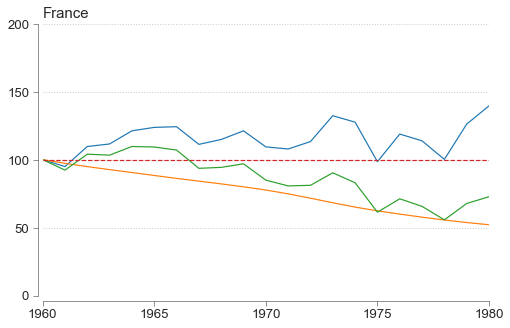

In [203]:
# Plot production, carbon intensity and CO2 absolute emissions for France:
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(data=FGProd_diff,
             x=FGProd_diff.index,
             y='France',
             ax=ax)

ax.plot(co2intensity_diff.index,
        co2intensity_diff['CO2 interpolated [kg/t]'])

ax.plot(co2abs_diff.index,
        co2abs_diff['France'])

ax.plot([D1, D2], [100, 100], '--')
ax.grid(which='major', axis='y', linestyle=':', linewidth=1)

ax.set_ylim(0, 200)
plt.yticks(np.arange(0, 201, 50))
ax.set_xlim(D1, D2)
plt.xticks(np.arange(D1, D2+1, 5))

ax.set_title("France", loc='left')
ax.set_ylabel(None)
style_ax(ax)

sns.despine(offset=5)
plt.show()

In [204]:
# Base 100 = 1960, with a 5-year moving average
fg_prod_diffroll = (100 * df_be_fr['Architectural glass production [kt]']
                    .interpolate(method="linear", limit_area='inside')
                    .rolling(5, center=True).mean()
                    / df_be_fr['Architectural glass production [kt]']
                    .interpolate(method="linear", limit_area='inside')
                    .rolling(5, center=True).mean().loc[D1])

co2abs_diffroll = (100 * (df_be_fr['CO2, architectural glass [kt]']
                          .interpolate(method="linear", limit_area='inside')
                          .rolling(5, center=True).mean())
                   / (df_be_fr['CO2, architectural glass [kt]']
                       .interpolate(method="linear", limit_area='inside')
                       .rolling(5, center=True).mean().loc[D1]))

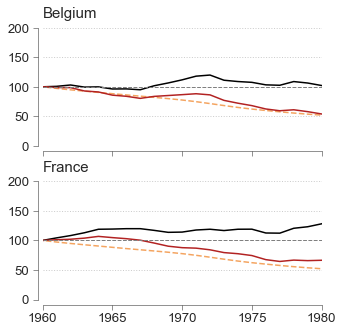

In [205]:
# Plot production, carbon intensity, CO2 absolute emissions for France:
fig, axes = plt.subplots(nrows=2, ncols=1,
                         sharex=True, sharey=True,
                         figsize=(5, 5))

for col, country in enumerate(countries):
    ax = axes[col]

    sns.lineplot(data=fg_prod_diffroll,
                 x=fg_prod_diffroll.index,
                 y=f'{country}',
                 ax=ax, color='black', linewidth=1.5)

    ax.plot(co2intensity_diff.index,
            co2intensity_diff['CO2 interpolated [kg/t]'],
            color='sandybrown', linestyle='--', linewidth=1.5)

    ax.plot(co2abs_diffroll.index,
            co2abs_diffroll[f'{country}'],
            color='firebrick', linewidth=1.5)

    ax.set_xlim(D1, D2)
    plt.xticks(np.arange(D1, D2+1, 5))
    ax.set_ylabel(None)

    ax.plot([D1, D2], [100, 100], '--', c='grey', linewidth=1)
    ax.grid(which='major', axis='y', linestyle=':', linewidth=1)

    ax.set_title(f"{country}", loc='left', pad=10)
    style_ax(ax)

ax.set_ylim(0, 200)
plt.yticks(np.arange(0, 201, 50))

fig.subplots_adjust(hspace=0.3)

sns.despine(offset=5)
plt.show()

if export:
    # Save image:
    fig.savefig(os.path.join(path_img, 'Fig9_ArchGlass_Base100_60-80.png'),
                dpi=600, bbox_inches='tight')
    fig.savefig(os.path.join(path_img, 'Fig9_ArchGlass_Base100_60-80.pdf'),
                bbox_inches='tight')

In [206]:
for country in countries:
    print(f"Architectural Glass Prod in {country}:\n",
          '%.2f' % fg_prod_diffroll[f'{country}'].loc[D2])
    print(f"CO2 absolute emissions in {country}:\n",
          '%.2f' % co2abs_diffroll[f'{country}'].loc[D2])
    print("CO2 intensity:\n",
          '%.2f' % co2intensity_diff['CO2 interpolated [kg/t]'].loc[D2])

Architectural Glass Prod in Belgium:
 102.14
CO2 absolute emissions in Belgium:
 53.98
CO2 intensity:
 52.07
Architectural Glass Prod in France:
 128.11
CO2 absolute emissions in France:
 66.39
CO2 intensity:
 52.07


## Architectural Glass Production, France and Belgium, 1985-2005

In [207]:
# Base 100 = 1985
FGProd_diff = (100 * df_be_fr['Architectural glass production [kt]']
               / df_be_fr['Architectural glass production [kt]'].loc[D3])

co2intensity_diff = 100 * fr_co2_intensity / fr_co2_intensity.loc[D3]

co2abs_diff = (100 * df_be_fr['CO2, architectural glass [kt]']
               / df_be_fr['CO2, architectural glass [kt]'].loc[D3])

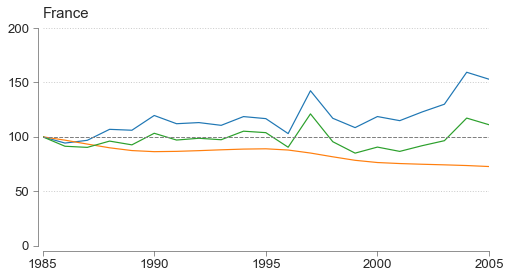

In [208]:
# Plot production, carbon intensity and CO2 absolute emissions for France:
fig, ax = plt.subplots(figsize=(8, 4))

sns.lineplot(data=FGProd_diff,
             x=FGProd_diff.index,
             y='France',
             ax=ax)

ax.plot(co2intensity_diff.index,
        co2intensity_diff['CO2 interpolated [kg/t]'])
ax.plot(co2abs_diff.index,
        co2abs_diff['France'])

ax.plot([D3, D4], [100, 100], '--', c='grey', linewidth=1)
ax.grid(which='major', axis='y', linestyle=':', linewidth=1)

ax.set_ylim(0, 200)
plt.yticks(np.arange(0, 201, 50))
ax.set_xlim(D3, D4)
plt.xticks(np.arange(D3, D4+1, 5))

ax.set_title("France", loc='left', pad=10)
ax.set_ylabel(None)
style_ax(ax)

sns.despine(offset=5)
plt.show()

In [209]:
# Base 100 = 1985, with a 5-year rolling
fg_prod_diffroll = (100 * df_be_fr['Architectural glass production [kt]']
                    .rolling(5, center=True).mean()
                    / df_be_fr['Architectural glass production [kt]']
                    .rolling(5, center=True).mean().loc[D3])

co2abs_diffroll = (100 * (df_be_fr['CO2, architectural glass [kt]']
                          .interpolate(method="linear", limit_area='inside')
                          .rolling(5, center=True).mean())
                   / (df_be_fr['CO2, architectural glass [kt]']
                       .interpolate(method="linear", limit_area='inside')
                       .rolling(5, center=True).mean().loc[D3]))

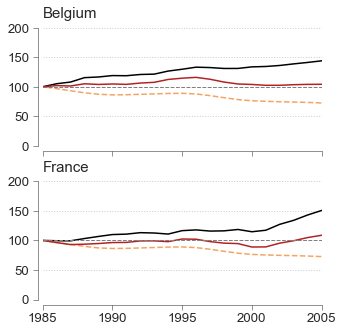

In [210]:
# Plot production, carbon intensity, CO2 absolute emissions for France:
fig, axes = plt.subplots(nrows=2, ncols=1,
                         sharex=True, sharey=True,
                         figsize=(5, 5))

for col, country in enumerate(countries):
    ax = axes[col]

    sns.lineplot(data=fg_prod_diffroll,
                 x=fg_prod_diffroll.index,
                 y=f'{country}',
                 ax=ax, color='black', linewidth=1.5)

    ax.plot(co2intensity_diff.index,
            co2intensity_diff['CO2 interpolated [kg/t]'],
            color='sandybrown', linestyle='--', linewidth=1.5)

    ax.plot(co2abs_diffroll.index,
            co2abs_diffroll[f'{country}'],
            color='firebrick', linewidth=1.5)

    ax.set_xlim(D3, D4)
    plt.xticks(np.arange(D3, D4+1, 5))
    ax.set_ylabel(None)

    ax.plot([D3, D4], [100, 100], '--', c='grey', linewidth=1)
    ax.grid(which='major', axis='y', linestyle=':', linewidth=1)

    ax.set_title(f"{country}", loc='left', pad=10)
    style_ax(ax)

ax.set_ylim(0, 200)
plt.yticks(np.arange(0, 201, 50))

fig.subplots_adjust(hspace=0.3)

sns.despine(offset=5)
plt.show()

if export:
    # Save image:
    fig.savefig(os.path.join(path_img, 'Fig9_ArchGlass_Base100_85-05.png'),
                dpi=600, bbox_inches='tight')
    fig.savefig(os.path.join(path_img, 'Fig9_ArchGlass_Base100_85-05.pdf'),
                bbox_inches='tight')

In [211]:
for country in countries:
    print(f"Architectural Glass Prod in {country}:\n",
          '%.2f' % fg_prod_diffroll[f'{country}'].loc[D4])
    print(f"CO2 absolute emissions in {country}:\n",
          '%.2f' % co2abs_diffroll[f'{country}'].loc[D4])
    print("CO2 intensity:\n",
          '%.2f' % co2intensity_diff['CO2 interpolated [kg/t]'].loc[D4])

Architectural Glass Prod in Belgium:
 143.94
CO2 absolute emissions in Belgium:
 104.24
CO2 intensity:
 72.63
Architectural Glass Prod in France:
 150.66
CO2 absolute emissions in France:
 108.70
CO2 intensity:
 72.63
